IMPORTANT : Définition des positions !
(x,y)

x : Positif -> Devant / Négatif -> Derrière

y : Positif -> Gauche / Négatif -> Droite 

In [1]:
import math,random

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
def webfrac(x=1,nb=5, k = 0.9):
    """
    Trouve une valeur Z tel que la weberFraction(x,y)=weberFraction(y,z)
    Valeur de référence : a distance de 15, il faut au moins une seconde distance de 18 pour differencier
    """
    
    
    res = [x]
    for i in range(nb-1):
        res.append(round(res[-1]*k+res[-1]))
    return res

In [3]:
dists = webfrac(5,5,k=0.7)
dists

[5, 8, 14, 24, 41]

In [4]:
def convertDistanceAngleEnPosition(angle,distance, ecartDistance = 5, logs = True, dist = dists):
    if(logs):
        r = dist[distance]
    else:
        r = distance*ecartDistance
    #Shift pour lisibilité : Pour la simulation 0° est devant 90° est a gauche
    angle = angle-90
    posX = r*math.cos(math.radians(angle))
    posY = r*math.sin(math.radians(angle))
    return (round(posX),round(posY))


In [5]:
def convertPositionEnAngleDistance(x,y):
    d = math.sqrt(x**2+y**2)
    segO = [(0,0),(50,0)]
    Xa,Ya = segO[1]
    seg1 = [(0,0),(x,y)]
    Xb,Yb = seg1[1]
    cosA = (Xa*Xb+Ya*Yb) / math.sqrt((Xa**2+Ya**2)*(Xb**2+Yb**2))
    a=math.degrees(math.acos(cosA))
    d = x/math.cos(math.radians(a))
    d2 = y/math.sin(math.radians(a))
    return round(a),round(d),round(d2)

In [6]:
convertPositionEnAngleDistance(20,36)

(61, 41, 41)

In [7]:
def calculPositionDisponibles(nombreAngle = 7,nombreDistance=4, espaceDistance = 5,dictAD = False, logs = False, dist = dists):
    """Détermine l'ensemble des positions disponibles en fonctions du nombre d'angles et de cercles de positionnement accessible"""
    position = []
    deltaAngle = 180 / (nombreAngle - 1)
    if(dictAD):
        position = dict()
        for d in range(0,len(dist)):
            position[d]=dict()
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d,logs=True,dist=dist)
                position[d][a] = (round(x),round(y))
    elif(logs):
        for d in range(0,len(dist)):
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d,logs=logs,dist=dist)
                position.append((round(x),round(y)))
    else:
        for d in range(1,nombreDistance+1):
            for a in range(0, nombreAngle):
                angle = a * deltaAngle
                x,y = convertDistanceAngleEnPosition(angle,d,logs=False)
                position.append((round(x),round(y)))
    return position

In [8]:
#Decrit les lignes de code a mettre dans le code c++ pour enregister les positions de sons de moustiques
a= calculPositionDisponibles(logs=True,dist=dists)
s=""
for i,j in a:
    s += "pathSave.push_back({ "+str(i)+","+str(j)+" });"+"\n"
print(s)

pathSave.push_back({ 0,-5 });
pathSave.push_back({ 3,-4 });
pathSave.push_back({ 4,-2 });
pathSave.push_back({ 5,0 });
pathSave.push_back({ 4,2 });
pathSave.push_back({ 3,4 });
pathSave.push_back({ 0,5 });
pathSave.push_back({ 0,-8 });
pathSave.push_back({ 4,-7 });
pathSave.push_back({ 7,-4 });
pathSave.push_back({ 8,0 });
pathSave.push_back({ 7,4 });
pathSave.push_back({ 4,7 });
pathSave.push_back({ 0,8 });
pathSave.push_back({ 0,-14 });
pathSave.push_back({ 7,-12 });
pathSave.push_back({ 12,-7 });
pathSave.push_back({ 14,0 });
pathSave.push_back({ 12,7 });
pathSave.push_back({ 7,12 });
pathSave.push_back({ 0,14 });
pathSave.push_back({ 0,-24 });
pathSave.push_back({ 12,-21 });
pathSave.push_back({ 21,-12 });
pathSave.push_back({ 24,0 });
pathSave.push_back({ 21,12 });
pathSave.push_back({ 12,21 });
pathSave.push_back({ 0,24 });
pathSave.push_back({ 0,-41 });
pathSave.push_back({ 21,-36 });
pathSave.push_back({ 36,-20 });
pathSave.push_back({ 41,0 });
pathSave.push_back({ 36,20 });
pa

In [9]:
def calculMouvements(nombreAngle = 7, nombreDistance = 4, espaceDistance = 5, logs = False, dist = dists,verbose= True):
    """
    a : approche
    e : eloignement
    g : mvm gauche
    d : mvm droite
    ag,ad,eg,ed
    """
    pos = calculPositionDisponibles(nombreAngle = 7, nombreDistance = 4, espaceDistance = 5, logs = logs, dist = dist)
    angle = round(180 / (nombreAngle-1))
    depl = dict()
    cptA = 0
    cptE = 0
    cptG = 0
    cptD = 0
    cptAG = 0
    cptAD = 0
    cptEG = 0
    cptED = 0
    #Uniquement jump d'une case et pas de deux
    cpt =0
    if(logs):
        for an in range(nombreAngle):
            for d in range(0,len(dist)):
                a = an*angle
                pos = convertDistanceAngleEnPosition(a,d,logs=True,dist=dist)
                if(verbose):
                    print("Position intiales :"+str(pos))
                    cpt+=1
                depl[pos] = dict()
                if(d != 0):
                    depl[pos]["a"] = convertDistanceAngleEnPosition(a,d-1,logs=True,dist=dist)
                    cptA+=1
                    if(a-angle >= 0):
                        depl[pos]["ad"] = convertDistanceAngleEnPosition(a-angle,d-1,logs=True,dist=dist)
                        cptAG+=1
                    if(a +angle <= 180):
                        depl[pos]["ag"] = convertDistanceAngleEnPosition(a+angle,d-1,logs=True,dist=dist)
                        cptAD+=1

                if(d >= 2):
                    depl[pos]["aa"] = convertDistanceAngleEnPosition(a,d-2,logs=True,dist=dist)
                    cptA+=1
                    if(a >= angle*2):
                        depl[pos]["aadd"] = convertDistanceAngleEnPosition(a-(angle*2),d-2,logs=True,dist=dist)
                        cptAG+=1
                    if(a +(angle*2) <= 180):
                        depl[pos]["aagg"] = convertDistanceAngleEnPosition(a+(angle*2),d-2,logs=True,dist=dist)
                        cptAD+=1

                if(d < len(dist)-1):
                    depl[pos]["e"] = convertDistanceAngleEnPosition(a,d+1,logs=True,dist=dist)
                    cptE+=1
                    if(a - angle >= 0):
                        depl[pos]["ed"] = convertDistanceAngleEnPosition(a-angle,d+1,logs=True,dist=dist)
                        cptEG+=1
                    if(a + angle <= 180):
                        depl[pos]["eg"] = convertDistanceAngleEnPosition(a+angle,d+1,logs=True,dist=dist)
                        cptED+=1
                if(d < len(dist)-2):
                    depl[pos]["ee"] = convertDistanceAngleEnPosition(a,d+2,logs=True,dist=dist)
                    cptE+=1
                    if(a >= (angle*2)):
                        depl[pos]["eedd"] = convertDistanceAngleEnPosition(a-(angle*2),d+2,logs=True,dist=dist)
                        cptEG+=1
                    if(a+(angle*2) <= 180):
                        depl[pos]["eegg"] = convertDistanceAngleEnPosition(a+(angle*2),d+2,logs=True,dist=dist)
                        cptED+=1
                if(a != 0):
                    depl[pos]["d"] = convertDistanceAngleEnPosition(a-angle,d,logs=True,dist=dist)
                    cptG+=1
                if(a >=(angle*2)):
                    depl[pos]["dd"] = convertDistanceAngleEnPosition(a-(angle*2),d,logs=True,dist=dist)
                    cptG+=1

                if(a +angle <= 180):
                    depl[pos]["g"] = convertDistanceAngleEnPosition(a+angle,d,logs=True,dist=dist)
                    cptG+=1
                if(a +angle*2 <= 180):
                    depl[pos]["gg"] = convertDistanceAngleEnPosition(a+(angle*2),d,logs=True,dist=dist)
                    cptD+=1
    else:
        for an in range(nombreAngle):
            for d in range(1,nombreDistance+1):
                a = an*angle
                pos = convertDistanceAngleEnPosition(a,d,logs=False)
                if(verbose):
                    print("Position intiales :"+str(pos))
                    cpt+=1
                depl[pos] = dict()
                if(d != 1):
                    depl[pos]["a"] = convertDistanceAngleEnPosition(a,d-1,logs=False)
                    cptA+=1
                    if(a-angle >= 0):
                        depl[pos]["ad"] = convertDistanceAngleEnPosition(a-angle,d-1,logs=False)
                        cptAG+=1
                    if(a +angle <= 180):
                        depl[pos]["ag"] = convertDistanceAngleEnPosition(a+angle,d-1,logs=False)
                        cptAD+=1

                if(d >= 2):
                    depl[pos]["aa"] = convertDistanceAngleEnPosition(a,d-2,logs=False)
                    cptA+=1
                    if(a >= angle*2):
                        depl[pos]["aadd"] = convertDistanceAngleEnPosition(a-(angle*2),d-2,logs=False)
                        cptAG+=1
                    if(a +(angle*2) <= 180):
                        depl[pos]["aagg"] = convertDistanceAngleEnPosition(a+(angle*2),d-2,logs=False)
                        cptAD+=1

                if(d != nombreDistance):
                    depl[pos]["e"] = convertDistanceAngleEnPosition(a,d+1,logs=False)
                    cptE+=1
                    if(a - angle >= 0):
                        depl[pos]["ed"] = convertDistanceAngleEnPosition(a-angle,d+1,logs=False)
                        cptEG+=1
                    if(a + angle <= 180):
                        depl[pos]["eg"] = convertDistanceAngleEnPosition(a+angle,d+1,logs=False)
                        cptED+=1
                if(d <= nombreDistance-1):
                    depl[pos]["ee"] = convertDistanceAngleEnPosition(a,d+2,logs=False)
                    cptE+=1
                    if(a >= (angle*2)):
                        depl[pos]["eedd"] = convertDistanceAngleEnPosition(a-(angle*2),d+2,logs=False)
                        cptEG+=1
                    if(a+(angle*2) <= 180):
                        depl[pos]["eegg"] = convertDistanceAngleEnPosition(a+(angle*2),d+2,logs=False)
                        cptED+=1
                if(a != 0):
                    depl[pos]["d"] = convertDistanceAngleEnPosition(a-angle,d,logs=False)
                    cptG+=1
                if(a >=(angle*2)):
                    depl[pos]["dd"] = convertDistanceAngleEnPosition(a-(angle*2),d,logs=False)
                    cptG+=1

                if(a +angle <= 180):
                    depl[pos]["g"] = convertDistanceAngleEnPosition(a+angle,d,logs=False)
                    cptG+=1
                if(a +angle*2 <= 180):
                    depl[pos]["gg"] = convertDistanceAngleEnPosition(a+(angle*2),d,logs=False)
                    cptD+=1
    if(verbose): 
        print("Nombre de pos initiales étudiées "+str(cpt))
        print("Nombre de positions initiales : "+str(len(depl.keys())))
        print(depl)
        print("A"+str(cptA))
        print("AG"+str(cptAG))
        print("AD"+str(cptAD))
        print("E"+str(cptE))
        print("EG"+str(cptEG))
        print("ED"+str(cptED))
        print("G"+str(cptG))
        print("D"+str(cptD))
        print("Nombre mouvement sans diagonales")
        print(cptA+cptE+cptG+cptD)
        print("Nombre mouvement avec diagonales")
        print(cptA+cptAG+cptAD+cptE+cptEG+cptED+cptG+cptD)
    return depl

In [10]:
l = calculMouvements(logs=True,verbose =False)
cpt = 0
for i in l.keys():
    for j in l[i].keys():
        cpt+=1
        #print(str(i[0])+","+str(i[0]))
        #print(str(l[i][j][0])+","+str(l[i][j][1]))
print(cpt)

364


In [11]:
def creationListesMouvements(diagonales = False,doubleSaut = False,nombreAngle = 7, nombreDistance = 4, verbose = True,logs= False, dist = []):
    mvm = calculMouvements(nombreAngle = nombreAngle, nombreDistance = nombreDistance, verbose=verbose, logs=logs,dist = dist)
    a = []
    ag = []
    ad = []
    e = []
    eg = []
    ed = []
    g = []
    d = []
    listeMouvements = []
    if(verbose):
        print("Nombre de positions initiales")
        print(len(mvm.keys()))
    for i in mvm.keys():
        if("a" in list(mvm[i].keys())):
            a.append((i,mvm[i]["a"],"a"))
            if(doubleSaut and "aa" in list(mvm[i].keys())):
                a.append((i,mvm[i]["a"],"a"))
        if("ag" in list(mvm[i].keys())):
            ag.append((i,mvm[i]["ag"],"ag"))
            if(doubleSaut and "aagg" in list(mvm[i].keys())):
                ag.append((i,mvm[i]["ag"],"ag"))
        if("ad" in list(mvm[i].keys())):
            ad.append((i,mvm[i]["ad"],"ad"))
            if(doubleSaut and "aadd" in list(mvm[i].keys())):
                ad.append((i,mvm[i]["ad"],"ad"))
        if("e" in list(mvm[i].keys())):
            e.append((i,mvm[i]["e"],"e"))
            if(doubleSaut and "ee" in list(mvm[i].keys())):
                e.append((i,mvm[i]["e"],"e"))
        if("eg" in list(mvm[i].keys())):
            eg.append((i,mvm[i]["eg"],"eg"))
            if(doubleSaut and "eegg" in list(mvm[i].keys())):
                eg.append((i,mvm[i]["eg"],"eg"))
        if("ed" in list(mvm[i].keys())):
            ed.append((i,mvm[i]["ed"],"ed"))
            if(doubleSaut and "eedd" in list(mvm[i].keys())):
                ed.append((i,mvm[i]["ed"],"ed"))
        if("g" in list(mvm[i].keys())):
            g.append((i,mvm[i]["g"],"g"))
            if(doubleSaut and "gg" in list(mvm[i].keys())):
                g.append((i,mvm[i]["g"],"g"))
        if("d" in list(mvm[i].keys())):
            d.append((i,mvm[i]["d"],"d"))
            if(doubleSaut and "dd" in list(mvm[i].keys())):
                d.append((i,mvm[i]["d"],"d"))
    choices = []
    choices.append(a)
    choices.append(e)
    choices.append(g)
    choices.append(d)
    if(verbose and not diagonales):
        print("Nombre de choix de mouvements")
        print(len(choices[0])+len(choices[1])+len(choices[2])+len(choices[3]))
    if( diagonales):
        choices.append(ag)
        choices.append(ad)
        choices.append(eg)
        choices.append(ed)
        
    if(verbose and diagonales):
        print("Nombre de choix de mouvements avec diagonales")
        print(len(choices[0])+len(choices[1])+len(choices[2])+len(choices[3])+len(choices[4])+len(choices[5])+len(choices[6])+len(choices[7]))
    
    previousPos=(0,0)
    previousInd = -1
    while(max(len(l) for l in choices)>0):
        #Récupère les indices dans choices correspondant aux listes de mouvements étant les plus long
        ml = list(choices.index(l) for l in choices if len(l) !=0)
        ind = previousInd
        cptBreaker = 10
        while(ind == previousInd and cptBreaker>0):
            ind = random.choice(ml)
            cptBreaker -= 1
        if(cptBreaker < 1):
            print("Failed to choose a different movement. Ending")
            return 0
        previousInd=ind
        pos = previousPos
        cptBreaker = 10
        while(pos[0] == previousPos[0] and pos[1] == previousPos[1] and cptBreaker>0):
            cptBreaker -= 1
            position = random.choice(choices[ind])
            pos = position[0]
        if(cptBreaker < 1):
            print("Failed to choose a different start location. Ending")
            return 0
        previousPos=pos
        choices[ind].remove(position)
        listeMouvements.append(position)
    return listeMouvements

In [12]:
l = creationListesMouvements(diagonales = False,doubleSaut = False,nombreAngle = 7, nombreDistance = 4, verbose = True,logs= True, dist = dists)

Position intiales :(0, -5)
Position intiales :(0, -8)
Position intiales :(0, -14)
Position intiales :(0, -24)
Position intiales :(0, -41)
Position intiales :(3, -4)
Position intiales :(4, -7)
Position intiales :(7, -12)
Position intiales :(12, -21)
Position intiales :(21, -36)
Position intiales :(4, -2)
Position intiales :(7, -4)
Position intiales :(12, -7)
Position intiales :(21, -12)
Position intiales :(36, -20)
Position intiales :(5, 0)
Position intiales :(8, 0)
Position intiales :(14, 0)
Position intiales :(24, 0)
Position intiales :(41, 0)
Position intiales :(4, 2)
Position intiales :(7, 4)
Position intiales :(12, 7)
Position intiales :(21, 12)
Position intiales :(36, 20)
Position intiales :(3, 4)
Position intiales :(4, 7)
Position intiales :(7, 12)
Position intiales :(12, 21)
Position intiales :(21, 36)
Position intiales :(0, 5)
Position intiales :(0, 8)
Position intiales :(0, 14)
Position intiales :(0, 24)
Position intiales :(0, 41)
Nombre de pos initiales étudiées 35
Nombre de 

In [13]:
l

0

In [14]:
def posMvmToPresentationTemplate(p,diagonales = False):
    ind = -1
    if(not diagonales):
        if(p[2] == 'a'):
            ind = 2
        if(p[2] == 'e'):
            ind = 8
        if(p[2] == 'g'):
            ind = 4
        if(p[2] == 'd'):
            ind = 6
    else:
        if(p[2] == 'a'):
            ind = 2
        if(p[2] == 'e'):
            ind = 8
        if(p[2] == 'g'):
            ind = 4
        if(p[2] == 'd'):
            ind = 6
        if(p[2] == 'ag'):
            ind = 1
        if(p[2] == 'ad'):
            ind = 3
        if(p[2] == 'eg'):
            ind = 7
        if(p[2] == 'ed'):
            ind = 9
    pos00=""
    if(p[0][0]<0):
        pos00="m"+str(-p[0][0])
    else:
        pos00=str(p[0][0])
    pos01=str(p[0][1])
    if(p[0][1]<0):
        pos01="m"+str(-p[0][1])
    else:
        pos01=str(p[0][1])
    pos10=""
    if(p[1][0]<0):
        pos10="m"+str(-p[1][0])
    else:
        pos10=str(p[1][0])
    pos11=""
    if(p[1][1]<0):
        pos11="m"+str(-p[1][1])
    else:
        pos11=str(p[1][1])
    st = str(ind)+" sound"+pos00+"_"+pos01+" sound"+pos10+"_"+pos11+";"
    return st

In [15]:
def printAllMovement(verbose = False,diagonales = False,doubleSaut = False,arraySound = False, nombreAngle = 7, nombreDistance = 4,logs= False, dist = []):
    sounds = ['sound0_m5','sound3_m4','sound4_m2','sound5_0','sound4_2','sound3_4','sound0_5','sound0_m10','sound5_m9','sound9_m5','sound10_0','sound9_5','sound5_9', 'sound0_10','sound0_m15','sound8_m13','sound13_m7','sound15_0', 'sound13_7','sound8_13','sound0_15','sound0_m20','sound10_m17','sound17_m10','sound20_0','sound17_10','sound10_17','sound0_20']
    listeMvm = creationListesMouvements(verbose = verbose,diagonales = diagonales,doubleSaut=doubleSaut,nombreAngle = nombreAngle, nombreDistance = nombreDistance,logs=logs,dist=dist)
    if(listeMvm == 0):
        print("Error return 0")
        return 0
    cpt = 0
    for i in listeMvm:
        cpt+=1
        if(arraySound):
            p = posMvmToPresentationTemplate(i,diagonales = diagonales).split(" ")
        print(posMvmToPresentationTemplate(i,diagonales = diagonales))
    print("Nombre de mouvement effectuable : "+str(cpt))

In [16]:
l = calculPositionDisponibles(nombreAngle = 7,logs=True,dist=dists)
sounds = []
for i,j in l:
    s = "sound"
    if(i<0):
        s+="m"+str(-i)
    else:
        s+=str(i)
    s+="_"
    if(j<0):
        s+="m"+str(-j)
    else:
        s+=str(j)
    #print(s)
    sounds.append(s)
print("Nombre de positions disponibles : "+ str(len(sounds)))
sounds


Nombre de positions disponibles : 35


['sound0_m5',
 'sound3_m4',
 'sound4_m2',
 'sound5_0',
 'sound4_2',
 'sound3_4',
 'sound0_5',
 'sound0_m8',
 'sound4_m7',
 'sound7_m4',
 'sound8_0',
 'sound7_4',
 'sound4_7',
 'sound0_8',
 'sound0_m14',
 'sound7_m12',
 'sound12_m7',
 'sound14_0',
 'sound12_7',
 'sound7_12',
 'sound0_14',
 'sound0_m24',
 'sound12_m21',
 'sound21_m12',
 'sound24_0',
 'sound21_12',
 'sound12_21',
 'sound0_24',
 'sound0_m41',
 'sound21_m36',
 'sound36_m20',
 'sound41_0',
 'sound36_20',
 'sound21_36',
 'sound0_41']

In [17]:
#Liste des fichiers sons a mettre dans la partie définition des variables dans Presentation
sounds
for i in sounds:
    s=i.split("sound")[1]
    print("sound { wavefile { filename = \"1000ms/audioMosquito"+s+".wav\";};} sound"+s+";")

sound { wavefile { filename = "1000ms/audioMosquito0_m5.wav";};} sound0_m5;
sound { wavefile { filename = "1000ms/audioMosquito3_m4.wav";};} sound3_m4;
sound { wavefile { filename = "1000ms/audioMosquito4_m2.wav";};} sound4_m2;
sound { wavefile { filename = "1000ms/audioMosquito5_0.wav";};} sound5_0;
sound { wavefile { filename = "1000ms/audioMosquito4_2.wav";};} sound4_2;
sound { wavefile { filename = "1000ms/audioMosquito3_4.wav";};} sound3_4;
sound { wavefile { filename = "1000ms/audioMosquito0_5.wav";};} sound0_5;
sound { wavefile { filename = "1000ms/audioMosquito0_m8.wav";};} sound0_m8;
sound { wavefile { filename = "1000ms/audioMosquito4_m7.wav";};} sound4_m7;
sound { wavefile { filename = "1000ms/audioMosquito7_m4.wav";};} sound7_m4;
sound { wavefile { filename = "1000ms/audioMosquito8_0.wav";};} sound8_0;
sound { wavefile { filename = "1000ms/audioMosquito7_4.wav";};} sound7_4;
sound { wavefile { filename = "1000ms/audioMosquito4_7.wav";};} sound4_7;
sound { wavefile { filenam

In [18]:
listeMvm = 0
while(listeMvm == 0):
    listeMvm = creationListesMouvements(verbose = False,diagonales = True,doubleSaut=False,logs=True,dist=dists)

ar = "";
ids = "";
cpt=0
for i in listeMvm:
    cpt+=1
    print("pathSave.push_back({ "+str(i[0][0])+","+str(i[0][1])+" });")
    print("pathSave.push_back({ "+str(i[1][0])+","+str(i[1][1])+" });")


Failed to choose a different movement. Ending
Failed to choose a different movement. Ending
pathSave.push_back({ 0,24 });
pathSave.push_back({ 0,14 });
pathSave.push_back({ 8,0 });
pathSave.push_back({ 14,0 });
pathSave.push_back({ 21,12 });
pathSave.push_back({ 12,21 });
pathSave.push_back({ 12,7 });
pathSave.push_back({ 7,4 });
pathSave.push_back({ 7,12 });
pathSave.push_back({ 21,12 });
pathSave.push_back({ 14,0 });
pathSave.push_back({ 7,4 });
pathSave.push_back({ 4,-7 });
pathSave.push_back({ 3,-4 });
pathSave.push_back({ 4,7 });
pathSave.push_back({ 0,14 });
pathSave.push_back({ 7,4 });
pathSave.push_back({ 14,0 });
pathSave.push_back({ 4,-7 });
pathSave.push_back({ 7,-4 });
pathSave.push_back({ 24,0 });
pathSave.push_back({ 12,-7 });
pathSave.push_back({ 4,7 });
pathSave.push_back({ 0,5 });
pathSave.push_back({ 8,0 });
pathSave.push_back({ 7,4 });
pathSave.push_back({ 12,21 });
pathSave.push_back({ 12,7 });
pathSave.push_back({ 36,-20 });
pathSave.push_back({ 24,0 });
pathSave.p

In [19]:
listeMvm

[((0, 24), (0, 14), 'a'),
 ((8, 0), (14, 0), 'e'),
 ((21, 12), (12, 21), 'g'),
 ((12, 7), (7, 4), 'a'),
 ((7, 12), (21, 12), 'ed'),
 ((14, 0), (7, 4), 'ag'),
 ((4, -7), (3, -4), 'a'),
 ((4, 7), (0, 14), 'eg'),
 ((7, 4), (14, 0), 'ed'),
 ((4, -7), (7, -4), 'g'),
 ((24, 0), (12, -7), 'ad'),
 ((4, 7), (0, 5), 'ag'),
 ((8, 0), (7, 4), 'g'),
 ((12, 21), (12, 7), 'ad'),
 ((36, -20), (24, 0), 'ag'),
 ((4, -7), (12, -7), 'eg'),
 ((21, -12), (24, 0), 'g'),
 ((24, 0), (36, 20), 'eg'),
 ((21, 12), (24, 0), 'd'),
 ((0, 5), (4, 7), 'ed'),
 ((7, -4), (14, 0), 'eg'),
 ((24, 0), (41, 0), 'e'),
 ((0, -24), (7, -12), 'ag'),
 ((4, 7), (7, 12), 'e'),
 ((4, -7), (4, -2), 'ag'),
 ((5, 0), (7, -4), 'ed'),
 ((0, 14), (0, 24), 'e'),
 ((21, 36), (12, 21), 'a'),
 ((36, 20), (21, 36), 'g'),
 ((0, 8), (4, 7), 'd'),
 ((36, -20), (41, 0), 'g'),
 ((0, 24), (21, 36), 'ed'),
 ((3, 4), (4, 2), 'd'),
 ((7, 4), (4, 2), 'a'),
 ((0, -14), (4, -7), 'ag'),
 ((12, 7), (21, 12), 'e'),
 ((7, -4), (4, -2), 'a'),
 ((7, -12), (0, -

In [20]:
#Pour obtenir un nouvel arrangement de mouvements
#copier les deux affichages produits et remplacer les lignes correspondantes dans Presentation
listeMvm = 0
diag = True
while(listeMvm == 0):
    listeMvm = creationListesMouvements(verbose = False,diagonales = diag,doubleSaut=False,logs=True,dist=dists)
ar = "";
ids = "";
for i in listeMvm:
    p = posMvmToPresentationTemplate(i,diagonales = diag).replace(";","").split(" ")
    ar+="{"+str(sounds.index(p[1])+1)+","+str(sounds.index(p[2])+1)+"},"
    ids+=str(p[0])+","
ar ="array <int>  mouvements["+str(len(listeMvm))+"][2] = {"+ar[:-1]+"};"
ids="array <int> idsMvm["+str(len(listeMvm))+"] = {"+ids[:-1]+"};"
print(ar)
print(ids)
st = "array <int> positions["+str(len(l))+"][2] = {"
for i,j in l :
    st+="{"+str(i)+","+str(j)+"},"
st=st[:-1]+"};"
print(st)

Failed to choose a different movement. Ending
Failed to choose a different movement. Ending
Failed to choose a different movement. Ending
Failed to choose a different movement. Ending
array <int>  mouvements[212][2] = {{29,23},{24,32},{2,8},{9,1},{10,17},{25,31},{27,34},{4,12},{23,29},{5,6},{11,18},{28,27},{10,11},{17,9},{26,19},{15,16},{6,12},{13,14},{12,11},{34,26},{32,33},{31,24},{14,6},{18,11},{12,20},{25,24},{17,10},{15,9},{4,11},{31,23},{11,5},{23,16},{11,3},{6,7},{16,8},{17,11},{32,24},{4,5},{7,13},{22,29},{19,12},{24,18},{8,1},{32,26},{11,12},{24,31},{10,9},{25,17},{16,17},{30,29},{20,26},{22,23},{13,6},{16,23},{14,7},{17,18},{10,4},{18,10},{19,20},{24,30},{18,25},{16,24},{20,14},{11,4},{34,28},{28,34},{27,19},{34,33},{18,19},{3,9},{16,10},{3,10},{1,2},{8,2},{1,8},{32,31},{26,34},{19,25},{25,18},{2,3},{4,3},{20,13},{27,33},{6,14},{12,19},{23,31},{18,12},{20,28},{21,13},{11,19},{2,1},{19,26},{33,25},{13,7},{12,5},{7,14},{13,12},{14,21},{11,10},{20,12},{8,15},{19,11},{11,17},{17,

In [21]:
def produceMovements(diagonales,doubleSaut,nombreAngle = 7, nombreDistance = 4,verbose = False,logs=False,dist=[]):
    x = 0
    while(x == 0):
        x = printAllMovement(diagonales = diagonales,verbose = verbose,nombreAngle = nombreAngle, nombreDistance = nombreDistance,doubleSaut=doubleSaut,logs=logs,dist=dist)

In [22]:
produceMovements(diagonales = False,doubleSaut = False, nombreAngle = 7,logs=True,dist=dists)

Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
Failed to choose a different start location. Ending
Error return 0
Failed to choose a different movement. Ending
Error return 0
2 sound21_m36 sound12_m21;
8 sound0_m24 sound0_m41;
4 sound12_7 sound7_12;
2 sound7_m4 sound4_m2;
4 sound0_m41 sound21_m36;
8 sound12_21 sou

# Definition trajectoire Expe EEG

In [23]:
calculPositionDisponibles(dictAD = True)

{0: {0: (0, -5),
  1: (3, -4),
  2: (4, -2),
  3: (5, 0),
  4: (4, 2),
  5: (3, 4),
  6: (0, 5)},
 1: {0: (0, -8),
  1: (4, -7),
  2: (7, -4),
  3: (8, 0),
  4: (7, 4),
  5: (4, 7),
  6: (0, 8)},
 2: {0: (0, -14),
  1: (7, -12),
  2: (12, -7),
  3: (14, 0),
  4: (12, 7),
  5: (7, 12),
  6: (0, 14)},
 3: {0: (0, -24),
  1: (12, -21),
  2: (21, -12),
  3: (24, 0),
  4: (21, 12),
  5: (12, 21),
  6: (0, 24)},
 4: {0: (0, -41),
  1: (21, -36),
  2: (36, -20),
  3: (41, 0),
  4: (36, 20),
  5: (21, 36),
  6: (0, 41)}}

In [24]:
def distance(x1,y1,x2,y2,exactPos = False):
    d = 0
    if(not exactPos):
        d1 = x1
        d2 = x2
        a1=y1
        a2=y2
        d = max(abs(d1-d2),abs(a1-a2))
    else:
        pos = calculPositionDisponibles(dictAD = True)
        p1 = 0
        p2 = 0
        for d in pos:
            for a in pos[d]:
                if(pos[d][a] == (x1,y1)):
                    p1=(d,a)
                if(pos[d][a] == (x2,y2)):
                    p2=(d,a)
        if(p1 != 0 and p2 != 0):
            d1,a1=p1
            d2,a2=p2
            d = max(abs(d1-d2),abs(a1-a2))
        else:
            d = distance(x1,y1,x2,y2,exactPos = not exactPos)
    if(d < 10 and d != -1):
        return d
    else:
        dd = distance(x1,y1,x2,y2,exactPos = not exactPos)
        if(dd < 10):
            return dd
        else:
            return -1

In [25]:
def dist(p1,p2,exactPos = False):
    d,a=p1
    d1,a1=p2
    ep=exactPos
    return distance(d,a,d1,a1,exactPos=ep)

In [26]:
dist((0,41),(12,-21),exactPos=False)

5

In [27]:
distance(1,2,2,1,exactPos = True)

1

In [28]:
mylist = [1,1,2,3,5,5,4,78,7]
list(dict.fromkeys(mylist))

[1, 2, 3, 5, 4, 78, 7]

In [29]:
def calcPosAccessibles(pos,maxDist,cible,prevM = -1,prevent =[],verbose = False):
    d,a = pos
    pAcc = []
    if(d < 4):
        pAcc.append((d+1,a,8))
        if(a > 0):
            pAcc.append((d+1,a-1,9))
        if(a < 6):
            pAcc.append((d+1,a+1,7))
    if(d > 0):
        pAcc.append((d-1,a,2))
        if(a > 0):
            pAcc.append((d-1,a-1,3))
        if(a < 6):
            pAcc.append((d-1,a+1,1))
    if(a > 0):
        pAcc.append((d,a-1,6))
    if(a < 6):
        pAcc.append((d,a+1,4))
    inds= []
    for i,j in prevent:
        for x,y,z in pAcc:
             if(i == x and j == y):
                if(verbose):
                    print("Cible inverse atteinte")
                inds.append(pAcc.index((x,y,z)))
    for i in range(0,len(inds)):
        del pAcc[inds[i]-i]
    inds = []
    dc,ac = cible
    for i in range(0,len(pAcc)):
        d1,a1,m = pAcc[i]
        if(distance(dc,ac,d1,a1) > maxDist):
            inds.append(i)
    inds = list(dict.fromkeys(inds))
    for i in range(0,len(inds)):
        del pAcc[inds[i]-i]
    #Prevent opposite mouvement
    if(prevM != -1 and len(pAcc) != 1):
        ind = -1
        for i in range(0,len(pAcc)):
            d,a,m = pAcc[i]
            if(m == prevM):
                ind = i
                break
        if(ind != -1):
            del pAcc[ind]
    return pAcc

In [30]:
calcPosAccessibles((3,0),10,(0,0),prevM = 5,prevent=[(4,0),(4,1)])

[(2, 0, 2), (2, 1, 1), (3, 1, 4)]

In [31]:
(1+1)%2

0

In [32]:
def calculTrajectoire(posInit = (3,3),positif=True, maxDist = 10,verbose=True):
    ciblePos = [(4,0),(4,1)]
    cibleNeg = [(0,5),(0,6)]
    cible = -1
    prevent = []
    v = -1
    if(positif):
        v = int(random.random()*2)
        cible = ciblePos[v]
        prevent = cibleNeg
    else:
        v = int(random.random()*2)
        cible = cibleNeg[v]
        prevent = ciblePos
    if(dist(cible,posInit) > maxDist):
        v=(v+1)%2
        if(positif):
            cible = ciblePos[v]
            prevent = cibleNeg
        else:
            cible = cibleNeg[v]
            prevent = ciblePos
    if(dist(cible,posInit) > maxDist):
        print("Position initiale trop loin de la cible")
        return -1
    traj = [posInit]
    mvm=[]
    posAct = posInit
    while(maxDist > 1 or posAct != cible):
        m=-1
        if(mvm != []):
            m=mvm[-1]
        p = calcPosAccessibles(posAct,maxDist,cible,prevM = m,prevent = prevent,verbose=verbose)
        
        if(p!=[]):
            maxDist-=1
            d,a,m=p[int(random.random()*len(p))]
            posAct=(d,a)
            mvm.append(m)
            traj.append(posAct)
        else:
            if(verbose):
                print("Erreur")
                print(posAct)
                print(maxDist)
                print(cible)
            return -1
    return traj,mvm

In [33]:
#Moitié cible + moitié -
#Moitié 70 moitié 90
p70 = [(True,70,True),(True,70,True),(True,70,True),(True,70,True),(True,70,True),(True,70,True),(True,70,True),(True,70,False),(True,70,False),(True,70,False)]
p90 = [(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,False)]
n70 = [(False,70,True),(False,70,True),(False,70,True),(False,70,True),(False,70,True),(False,70,True),(False,70,True),(False,70,False),(False,70,False),(False,70,False)]
n90 = [(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,False)]
incertitude = p70+p90+n70+n90
incertitude = incertitude+incertitude
len(incertitude)


80

In [59]:
def productionTrajectoires(nbTraj,minDist=5,maxDist=10,dists = [5,6,7,9,10,11],verbose = False):
    arTr = []
    mvms = []
    valence = []
    valence = [True,False]*int(nbTraj/2)
    pourcent = []
    indicateur = []
    random.shuffle(valence)
    p70 = [(True,70,True),(True,70,True),(True,70,True),(True,70,True),(True,70,True),(True,70,True),(True,70,True),(True,70,False),(True,70,False),(True,70,False)]
    p90 = [(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,True),(True,90,False)]
    n70 = [(False,70,True),(False,70,True),(False,70,True),(False,70,True),(False,70,True),(False,70,True),(False,70,True),(False,70,False),(False,70,False),(False,70,False)]
    n90 = [(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,True),(False,90,False)]
    incertitude = p70+p90+n70+n90
    incertitude = incertitude+incertitude
    while(len(incertitude) < nbTraj):
        incertitude.append(incertitude[int(random.random()*len(incertitude))])
    random.shuffle(incertitude)
    distances = dists*int(nbTraj/len(dists))
    while(len(distances) != nbTraj):
        distances.append(dists[int(random.random()*len(dists))])
    random.shuffle(distances)
    l = dict()
    for i in dists:
        l[i]=0
    vals = dict()
    vals[True]=0
    vals[False]=0
    for i in range(0,nbTraj):
        d = distances[i]
        l[d]+=1
        val = incertitude[i][0]
        vals[val]+=1
        traj,mvm=calculTrajectoire(maxDist = d,positif=val,verbose=verbose)
        arTr.append(traj)
        mvms.append(mvm)
        pourcent.append(incertitude[i][1])
        indicateur.append((val,incertitude[i][2]))
    if(verbose):
        print("Longueurs :" + str(l))
        print("Valence :" + str(vals))
    return arTr,mvms,pourcent,indicateur

In [60]:
arrayTrajectoires,mvms,pourc,ind = productionTrajectoires(100,verbose=False)

In [37]:
def formatTrajPresentation(arrayTrajectoires,mvms,pourcent,indicateur,verbose=False):
    positionspcl = [(0,-5),(3,-4),(4,-2),(5,0),(4,2),(3,4),(0,5),(0,-8),(4,-7),(7,-4),(8,0),(7,4),(4,7),(0,8),(0,-14),(7,-12),(12,-7),(14,0),(12,7),(7,12),(0,14),(0,-24),(12,-21),(21,-12),(24,0),(21,12),(12,21),(0,24),(0,-41),(21,-36),(36,-20),(41,0),(36,20),(21,36),(0,41)]
    arrayTraj = []#Contient les indices correspondants au positions du tableaux positionspcl
    arrayTrajInv = []#Contient les indices correspondants au positions du tableaux positionspcl
    dictP=calculPositionDisponibles(dictAD = True)
    for traj in arrayTrajectoires:
        arr = []
        arrInv = []
        if(verbose):
            print(traj)
        for d,a in traj:
            x,y = dictP[d][a]
            arr.append(positionspcl.index((x,y))+1)
            arrInv.append(positionspcl.index((x,-y))+1)
        arrayTraj.append(arr)
        arrayTrajInv.append(arrInv)
    
    stAr = "array <int> trajectoiresN["+str(len(arrayTrajectoires))+"][12] ={"
    stArInv = "array <int> trajectoiresInv["+str(len(arrayTrajectoires))+"][12] ={"
    stMvms = "array <int> mouvementsN["+str(len(arrayTrajectoires))+"][11] ={"
    stMvmsInv = "array <int> mouvementsInv["+str(len(arrayTrajectoires))+"][11] ={"
    mvmConv=[0,3,2,1,6,5,4,9,8,7]
    for tr in range(0,len(arrayTraj)):
        stTr="{"
        stTrInv="{"
        stMvm="{"
        stMvmInv="{"
        for i in range(0,12):
            if(i<len(arrayTraj[tr])):
                if(i ==11):
                    stTr+=str(arrayTraj[tr][i])+"}"
                    stTrInv+=str(arrayTrajInv[tr][i])+"}"
                else:
                    stTr+=str(arrayTraj[tr][i])+","
                    stTrInv+=str(arrayTrajInv[tr][i])+","
            else:
                if(i ==11):
                    stTr+=str(-1)+"}"
                    stTrInv+=str(-1)+"}"
                else:
                    stTr+=str(-1)+","
                    stTrInv+=str(-1)+","
        for i in range(0,11):
            if(i<len(mvms[tr])):
                if(i ==10):
                    stMvm+=str(mvms[tr][i])+"}"
                    stMvmInv+=str(mvmConv[mvms[tr][i]])+"}"
                else:
                    stMvm+=str(mvms[tr][i])+","
                    stMvmInv+=str(mvmConv[mvms[tr][i]])+","
            else:
                if(i ==10):
                    stMvm+=str(-1)+"}"
                    stMvmInv+=str(-1)+"}"
                else:
                    stMvm+=str(-1)+","
                    stMvmInv+=str(-1)+","
        if(tr == len(arrayTraj)-1):
            stAr+=stTr+"};"
            stArInv+=stTrInv+"};"
        else:
            stAr+=stTr+","
            stArInv+=stTrInv+","
            
        if(tr == len(mvms)-1):
            stMvms+=stMvm+"};"
            stMvmsInv+=stMvmInv+"};"
        else:
            stMvms+=stMvm+","
            stMvmsInv+=stMvmInv+","
    strPourcent = "array <int> pourcent["+str(len(indicateur))+"]={"
    for i in range(0,len(pourcent)):
        strPourcent+=str(pourcent[i])
        if(i < len(pourcent) -1):
            strPourcent+=","
        else:
            strPourcent+="};"
    strIndic = "array <bool> indic["+str(len(indicateur))+"][2] ={"
    for i in range(0,len(indicateur)):
        val,cor = indicateur[i]
        strIndic+="{"
        if(val):
            strIndic+="true"
        else:
            strIndic+="false"

        if(cor):
            strIndic+=",true}"
        else:
            strIndic+=",false}"
        if(i < len(indicateur) -1):
            strIndic+=","
        else:
            strIndic+="};"
    return stAr,stArInv,stMvms,stMvmsInv,strPourcent,strIndic

In [61]:
arT, arMvm, pourcent, indicateur = productionTrajectoires(40*2,verbose=False)
t,tinv,m,minv,pourc,ind = formatTrajPresentation(arT,arMvm,pourcent,indicateur)
print(t)
print(tinv)
print(m)
print(minv)
print(pourc)
print(ind)

array <int> trajectoiresN[80][12] ={{25,18,25,26,19,27,34,26,32,24,30,29},{25,33,26,34,27,34,35,28,20,14,7,-1},{25,17,25,26,34,27,35,28,20,13,6,-1},{25,33,26,32,31,23,29,-1,-1,-1,-1,-1},{25,32,24,23,30,31,25,26,32,24,23,29},{25,18,17,23,22,29,30,-1,-1,-1,-1,-1},{25,18,12,18,17,23,30,-1,-1,-1,-1,-1},{25,17,18,11,17,11,12,6,-1,-1,-1,-1},{25,31,24,16,23,15,22,16,24,18,19,13},{25,19,25,18,17,23,31,32,26,19,13,7},{25,17,18,12,19,27,26,18,11,19,12,6},{25,26,32,24,18,19,12,6,-1,-1,-1,-1},{25,18,19,25,24,32,24,32,26,19,13,7},{25,32,26,27,19,20,13,7,-1,-1,-1,-1},{25,31,32,31,32,24,25,31,32,24,23,29},{25,33,34,33,26,27,33,34,28,21,20,12},{25,17,24,32,26,33,25,24,18,12,6,-1},{25,26,34,28,27,20,14,13,19,18,24,30},{25,26,32,33,27,28,20,13,7,-1,-1,-1},{25,32,25,31,25,19,13,7,-1,-1,-1,-1},{25,31,32,31,25,26,20,13,19,12,13,6},{25,18,19,18,24,23,29,-1,-1,-1,-1,-1},{25,18,19,25,26,18,12,6,-1,-1,-1,-1},{25,18,10,17,23,31,30,-1,-1,-1,-1,-1},{25,18,10,18,10,16,23,22,29,-1,-1,-1},{25,33,26,33,25,33,25,31,24

Analyse de la distribution de mouvement pour les trajectoires

In [39]:
def distanceComp(p1,p2):
    d = 0
    d1 = p1[0]
    d2 = p2[0]
    a1=p1[1]
    a2=p2[1]
    d = abs(d1-d2)+abs(a1-a2)
    return d

In [40]:
arrayTrajectoires,mvms,pourc,ind = productionTrajectoires(80,verbose=False)

In [41]:
def analyseDistrib(arrayTrajectoires,dc=False,unique=False):
    ciblePos = [(4,0),(4,1)]
    cibleNeg = [(0,5),(0,6)]
    lLong = dict()
    lCourt = dict()
    valD = [-2,-1,0,1,2] 
    if(dc):
        valD = [-2,-1,0,1,2]
    else:
        valD = [-1,0,1]
        
    for i in valD:
        for j in valD:
            lLong[(i,j)]=0
            lCourt[(i,j)]=0
            
    for traj in arrayTrajectoires:
        longueur = ""
        if(len(traj) < 10):
            longueur = "Court"
        else:
            longueur = "Long"
            
        cible = traj[-1]
        cibleInv = (0,0)
        if(cible in cibleNeg):
            cibleInv = (4,0)
        elif(cible in ciblePos):
            cibleInv = (0,6)
        else:
            print("Erreur cible")
            return -1
        
        d = dict()
        for i in valD:
            for j in valD:
                d[(i,j)]=0
                
        for ind in range(0,len(traj)-1):
            p1 = traj[ind]
            p2 = traj[ind+1]
            if(dc):
                d1c = distanceComp(p1,cible)
                d2c = distanceComp(p2,cible)
                d1cI = distanceComp(p1,cibleInv)
                d2cI = distanceComp(p2,cibleInv)
            else:
                d1c = dist(p1,cible)
                d2c = dist(p2,cible)
                d1cI = dist(p1,cibleInv)
                d2cI = dist(p2,cibleInv)
            val = (d1c-d2c,d1cI-d2cI)
            #if(val == (0,0)):
            #    print(p1,p2,cible,cibleInv)
            d[val]+=1
        
        for i in valD:
            for j in valD:
                if(not unique):
                    if(longueur == "Court"):
                        lCourt[(i,j)]+=d[(i,j)]
                    else:
                        lLong[(i,j)]+=d[(i,j)]
                else:
                    lCourt[(i,j)]+=d[(i,j)]
    countC = 0
    countL = 0
    for i in valD:
        for j in valD:
            countC+=lCourt[(i,j)]
            countL+=lLong[(i,j)]
    
    if(not unique):
        for i in valD:
            for j in valD:
                if(countC != 0):
                    lCourt[(i,j)]=round(round(lCourt[(i,j)]/countC,2)*100)
                else:
                    lCourt[(i,j)]=0
                if(countL != 0):
                    lLong[(i,j)]=round(round(lLong[(i,j)]/countL,2)*100)
                else:
                    lLong[(i,j)]=0
        return lCourt,lLong
    else:
        for i in valD:
            for j in valD:
                if(countC != 0):
                    lCourt[(i,j)]=round(round(lCourt[(i,j)]/countC,2)*100)
                else:
                    lCourt[(i,j)]=0
        return lCourt,0
        

In [42]:
arrayTrajectoires,mvms,pourc,ind = productionTrajectoires(80,verbose=False,dists=[4,5,6,9,10,11])

Type de mouvement
Positif : s'approche de la cible
Négatif : s'approche de la cible inverse
Neutre : S'approche des deux/s'éloigne des deux

In [43]:
dc = False
vs = [0]
if(dc):
    vs = [-2,-1,0,1,2]
else:
    vs = [-1,0,1]
    
arrayTrajectoires,mvms,pourc,ind = productionTrajectoires(40,verbose=False,dists=[4,5,6,19,20,21])
lC,lL = analyseDistrib(arrayTrajectoires,dc=dc)
print("Court : "+str(lC))
for i in vs:
    for j in vs:
        if(lC[(i,j)] != 0):
            print(str((i,j))+ " : "+str(lC[(i,j)]))
mP = lC[(1,0)]+lC[(1,-1)]+lC[(0,-1)]
mN = lC[(0,1)]+lC[(-1,1)]+lC[(-1,0)]
m = lC[(0,0)]+lC[(-1,-1)]+lC[(1,1)]
print("Pourcentage de mouvement inverse :" + str(mN))
print("Pourcentage de mouvement neutre :" + str(m))
print("Pourcentage de mouvement positif :" + str(mP))

print("Long : "+str(lL))
for i in vs:
    for j in vs:
        if(lL[(i,j)] != 0):
            print(str((i,j))+ " : "+str(lL[(i,j)]))
mP = lL[(1,0)]+lL[(1,-1)]+lL[(0,-1)]
mN = lL[(0,1)]+lL[(-1,1)]+lL[(-1,0)]
m = lL[(0,0)]+lL[(-1,-1)]+lL[(1,1)]
print("Pourcentage de mouvement inverse :" + str(mN))
print("Pourcentage de mouvement neutre :" + str(m))
print("Pourcentage de mouvement positif :" + str(mP))

Court : {(-1, -1): 3, (-1, 0): 3, (-1, 1): 8, (0, -1): 6, (0, 0): 9, (0, 1): 7, (1, -1): 51, (1, 0): 10, (1, 1): 2}
(-1, -1) : 3
(-1, 0) : 3
(-1, 1) : 8
(0, -1) : 6
(0, 0) : 9
(0, 1) : 7
(1, -1) : 51
(1, 0) : 10
(1, 1) : 2
Pourcentage de mouvement inverse :18
Pourcentage de mouvement neutre :20
Pourcentage de mouvement positif :61
Long : {(-1, -1): 7, (-1, 0): 11, (-1, 1): 11, (0, -1): 11, (0, 0): 8, (0, 1): 10, (1, -1): 24, (1, 0): 12, (1, 1): 7}
(-1, -1) : 7
(-1, 0) : 11
(-1, 1) : 11
(0, -1) : 11
(0, 0) : 8
(0, 1) : 10
(1, -1) : 24
(1, 0) : 12
(1, 1) : 7
Pourcentage de mouvement inverse :32
Pourcentage de mouvement neutre :33
Pourcentage de mouvement positif :36


In [52]:
def etudeVarLongueurs(minV,maxV):
    for v in range(minV,maxV+1):
        arrayTrajectoires,mvms,pourc,ind = productionTrajectoires(40,verbose=False,dists=[v])
        lC,lL = analyseDistrib(arrayTrajectoires,unique=True)
        mP = lC[(1,0)]+lC[(0,-1)]
        mtp = lC[(1,-1)]
        mN = lC[(0,1)]+lC[(-1,0)]
        mtn= lC[(-1,1)]
        m = lC[(0,0)]+lC[(-1,-1)]+lC[(1,1)]
        d = dict()
        d['TInverse'] = mtn
        d['Inverse'] = mN
        d['Neutre'] = m
        d['Direct'] = mP
        d['TDirect'] = mtp
        print("Longueur "+ str(v) + " : "+str(d))

In [53]:
etudeVarLongueurs(3,15)

Longueur 3 : {'TInverse': 1, 'Inverse': 7, 'Neutre': 11, 'Direct': 20, 'TDirect': 59}
Longueur 4 : {'TInverse': 5, 'Inverse': 9, 'Neutre': 14, 'Direct': 22, 'TDirect': 51}
Longueur 5 : {'TInverse': 8, 'Inverse': 7, 'Neutre': 15, 'Direct': 24, 'TDirect': 45}
Longueur 6 : {'TInverse': 12, 'Inverse': 11, 'Neutre': 12, 'Direct': 18, 'TDirect': 47}
Longueur 7 : {'TInverse': 11, 'Inverse': 13, 'Neutre': 15, 'Direct': 22, 'TDirect': 39}
Longueur 8 : {'TInverse': 8, 'Inverse': 16, 'Neutre': 20, 'Direct': 21, 'TDirect': 35}
Longueur 9 : {'TInverse': 11, 'Inverse': 16, 'Neutre': 18, 'Direct': 19, 'TDirect': 36}
Longueur 10 : {'TInverse': 11, 'Inverse': 14, 'Neutre': 20, 'Direct': 23, 'TDirect': 31}
Longueur 11 : {'TInverse': 9, 'Inverse': 19, 'Neutre': 20, 'Direct': 23, 'TDirect': 29}
Longueur 12 : {'TInverse': 13, 'Inverse': 16, 'Neutre': 19, 'Direct': 22, 'TDirect': 31}
Longueur 13 : {'TInverse': 11, 'Inverse': 19, 'Neutre': 17, 'Direct': 27, 'TDirect': 27}
Longueur 14 : {'TInverse': 10, 'Inve

In [46]:
def drawArrow(A, B):
    plt.arrow(A[1], A[0], B[1] - A[1], B[0] - A[0],
              head_width=10, length_includes_head=True,zorder=100)

In [47]:
def plotTrajectoire(traj):
    img = mpimg.imread("Graphe.png")
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca()
    ciblePos = [(4,0),(4,1)]
    cibleNeg = [(0,5),(0,6)]
    dictPD=calculPositionDisponibles(dictAD = True)
    if(traj[-1] in ciblePos):
        valence = True
    else:
        valence = False
    for d in dictPD:
        for a in dictPD[d]:
            x,y = dictPD[d][a]
            y=-y
            col = [1,0,0]
            if(d==3 and a == 3):
                c1 = plt.Circle(((y*10), (x*10)), 10, color='b')
            elif((d,a) in traj):
                ind = min(1,traj.index((d,a))/len(traj)+0.15)
                if(valence):
                    col=[0,ind,0]
                else:
                    col=[ind,0,0]
                c1 = plt.Circle(((y*10), (x*10)), 10, color=col,zorder=traj.index((d,a)))
            else:
                if((d,a) in cibleNeg):
                    c1 = plt.Circle(((y*10), (x*10)), 10, color='r')
                elif((d,a) in ciblePos):
                    c1 = plt.Circle(((y*10), (x*10)), 10, color=[0.5,1,0.5])
                else:
                    c1 = plt.Circle(((y*10), (x*10)), 10, color=[0.1,0.1,0.1],zorder=0)
            ax.add_patch(c1)
    for i in range(0,len(traj)-1):
        x1,y1 = traj[i]
        x1,y1=dictPD[x1][y1]
        y1=-y1
        p1 = (x1*10,y1*10)
        x2,y2 = traj[i+1]
        x2,y2=dictPD[x2][y2]
        y2=-y2
        p2 = (x2*10,y2*10)
        #plt.arrow(x1*10,y1*10,x2*10-x1*10,y2*10-y1*10)
        drawArrow(p1,p2)
    plt.plot()


D:\Dev\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


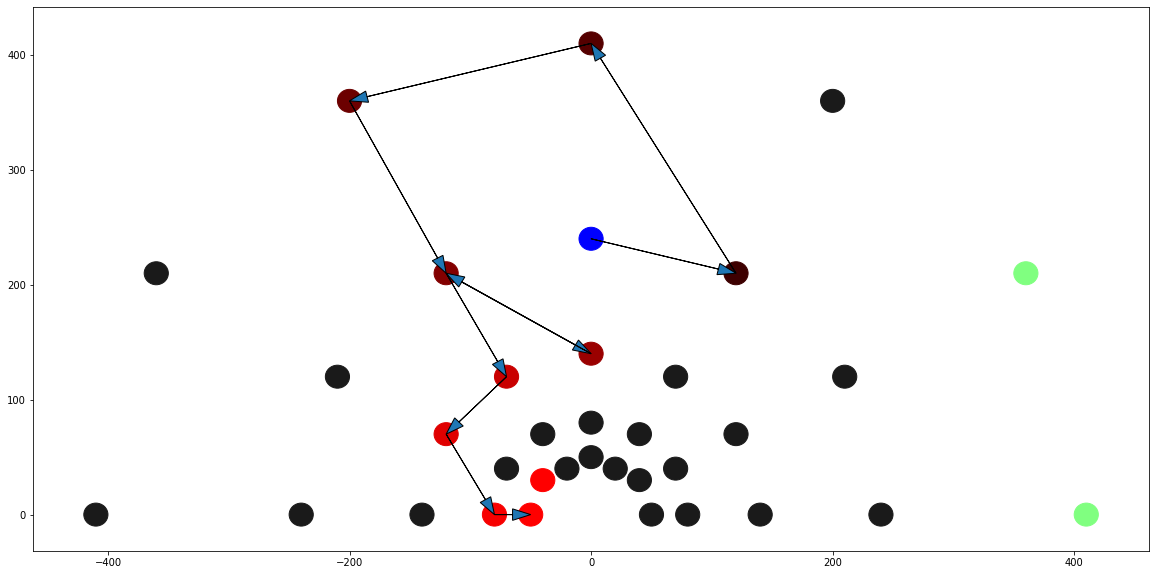

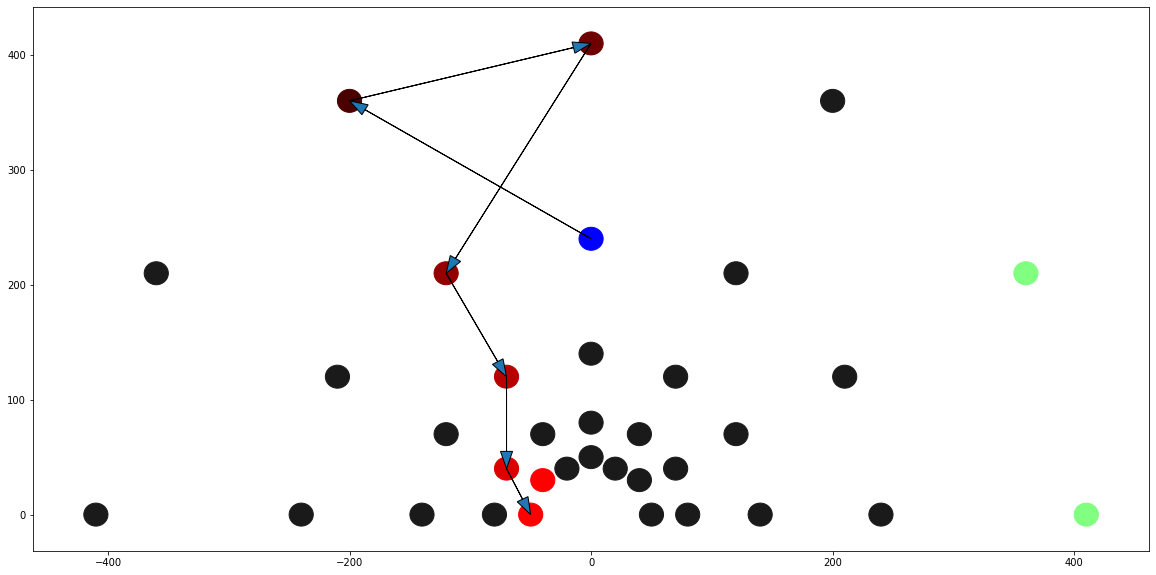

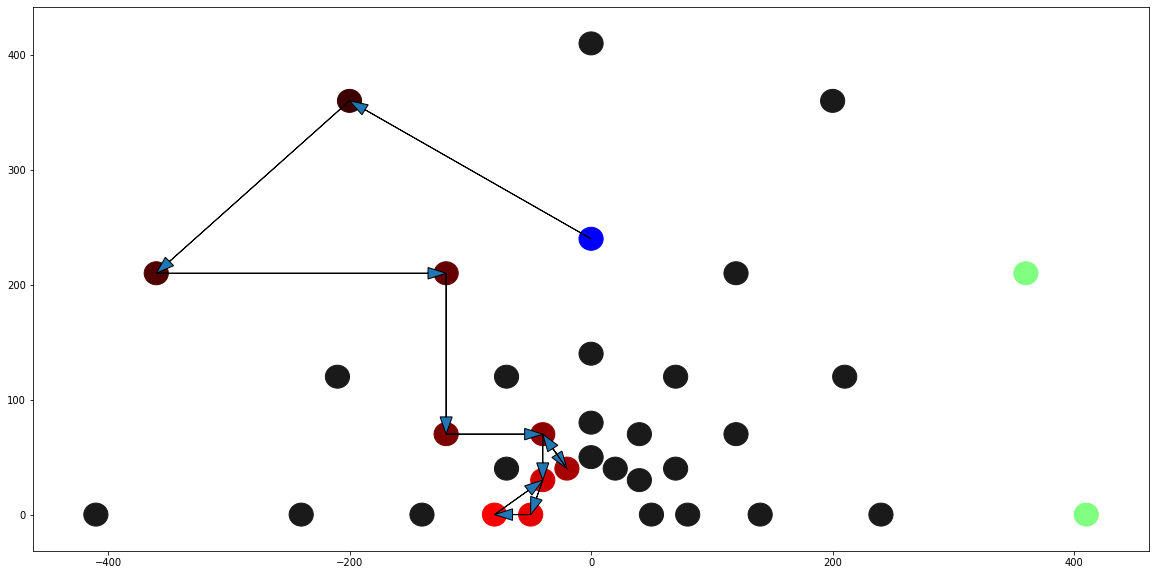

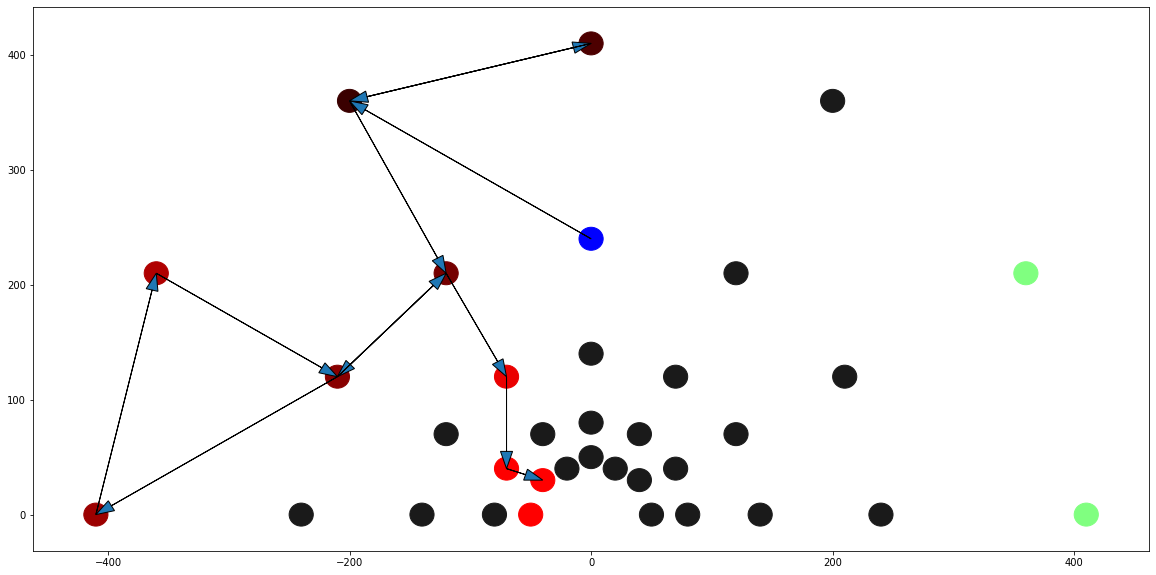

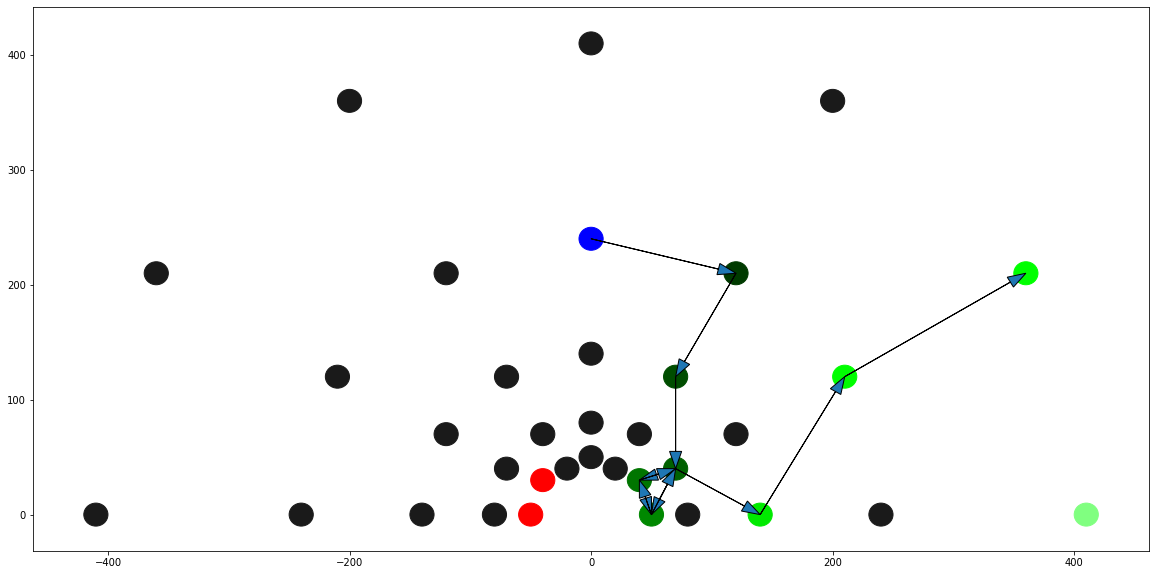

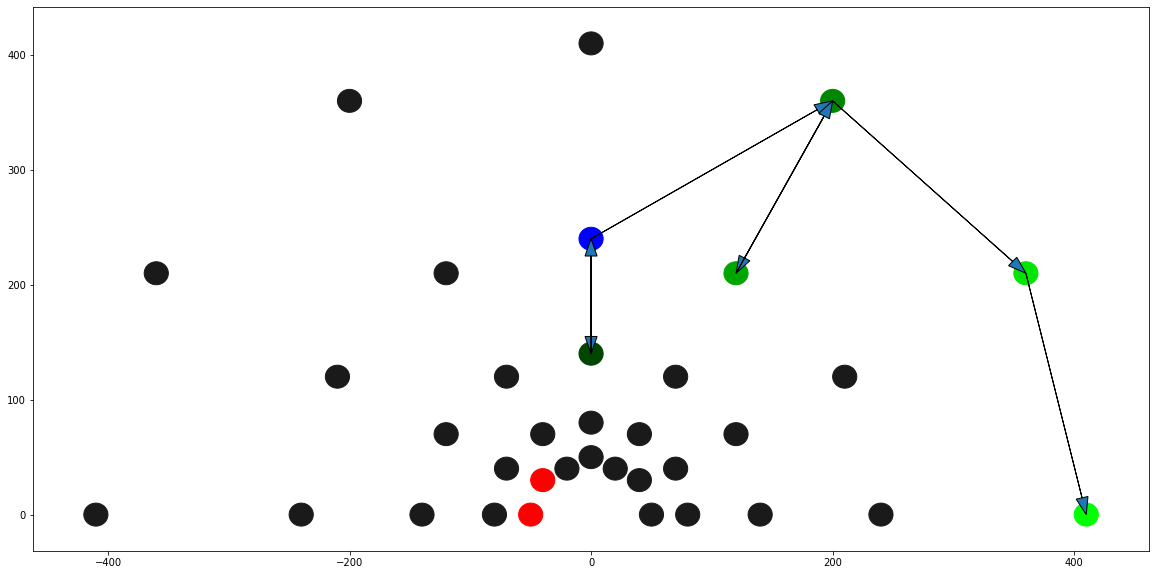

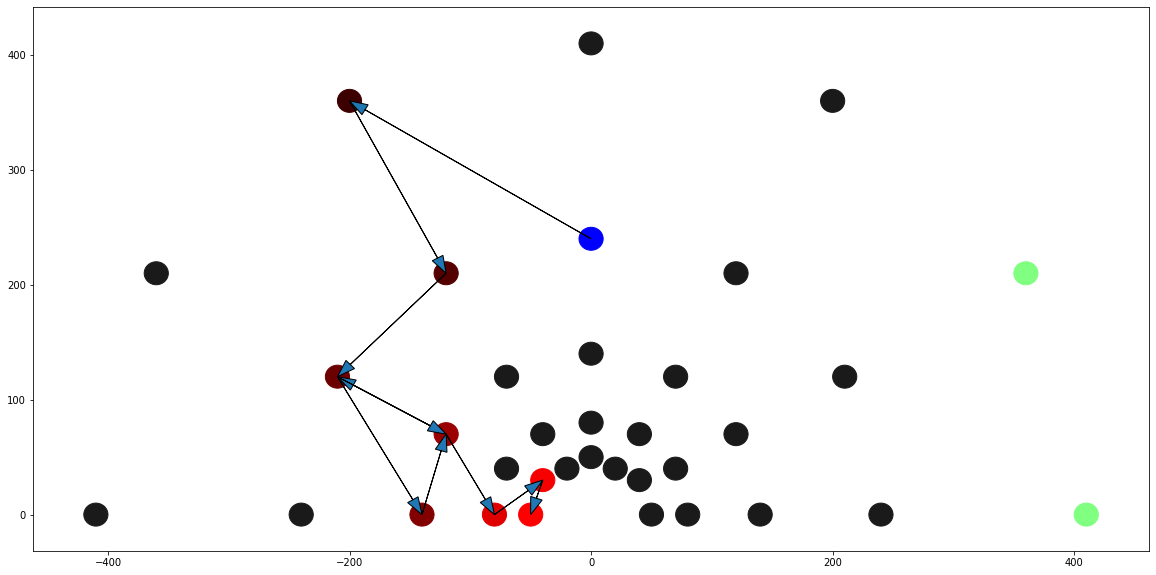

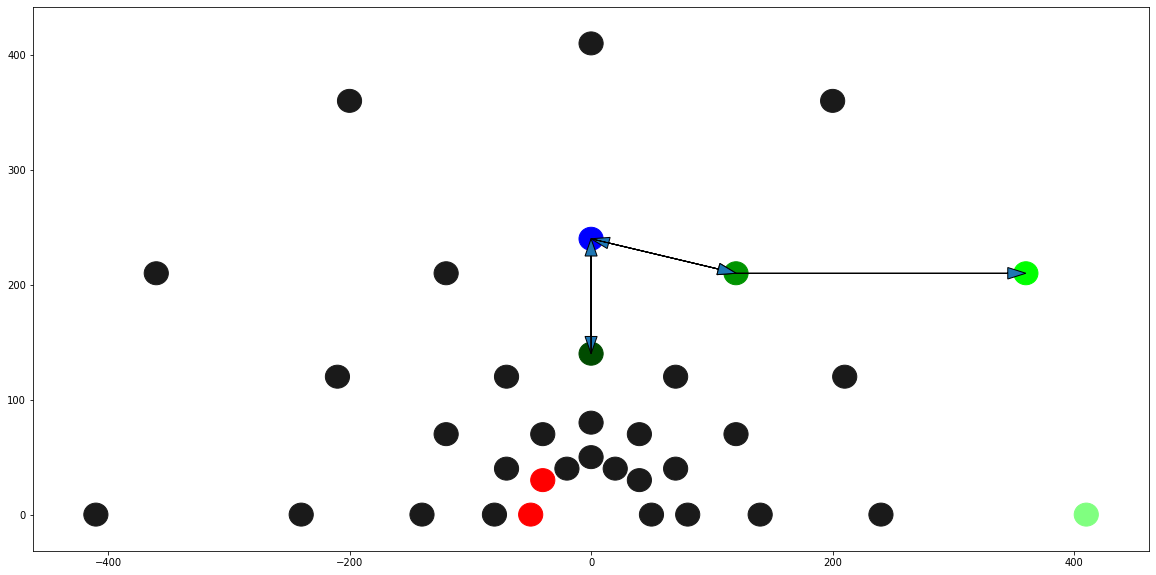

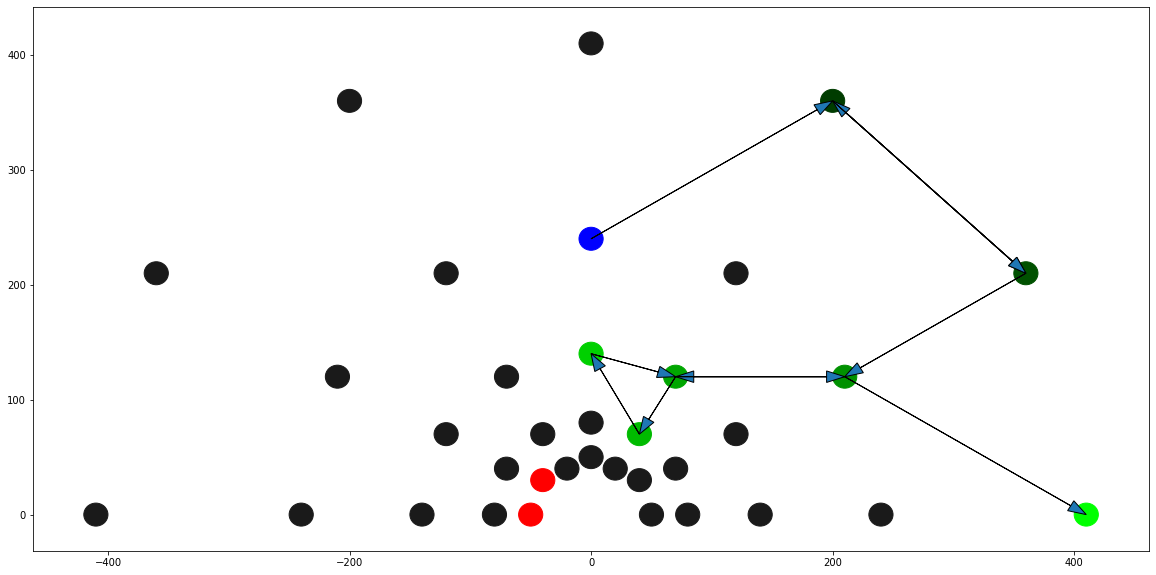

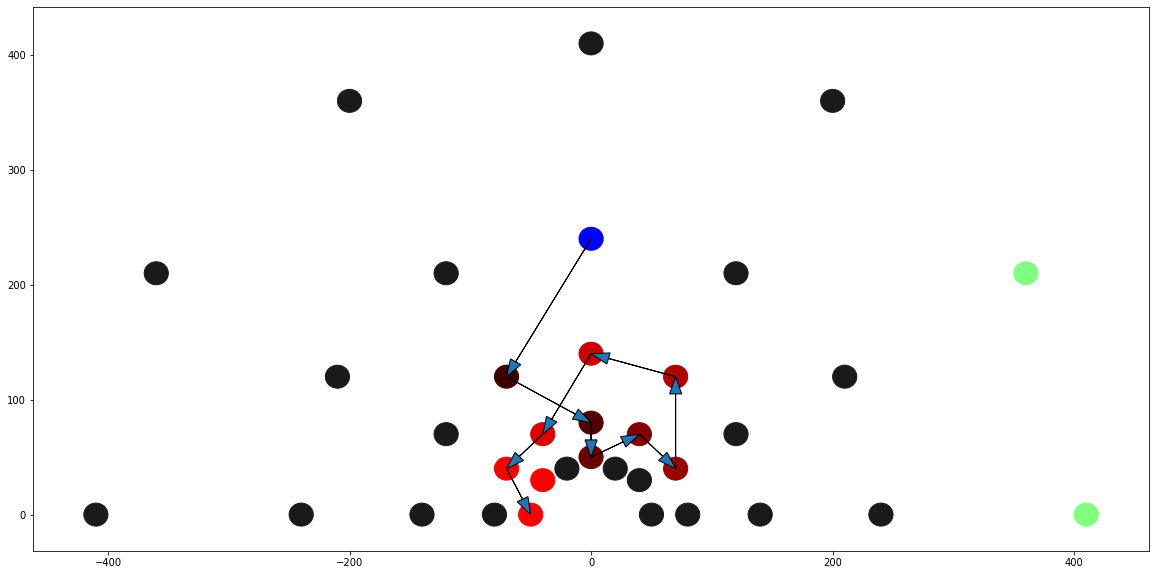

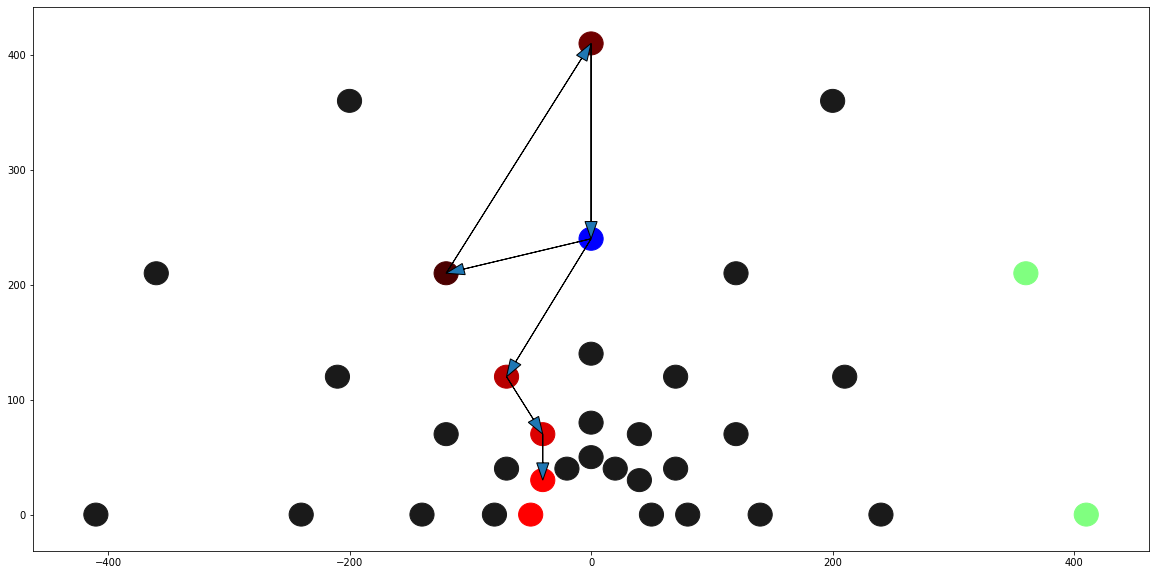

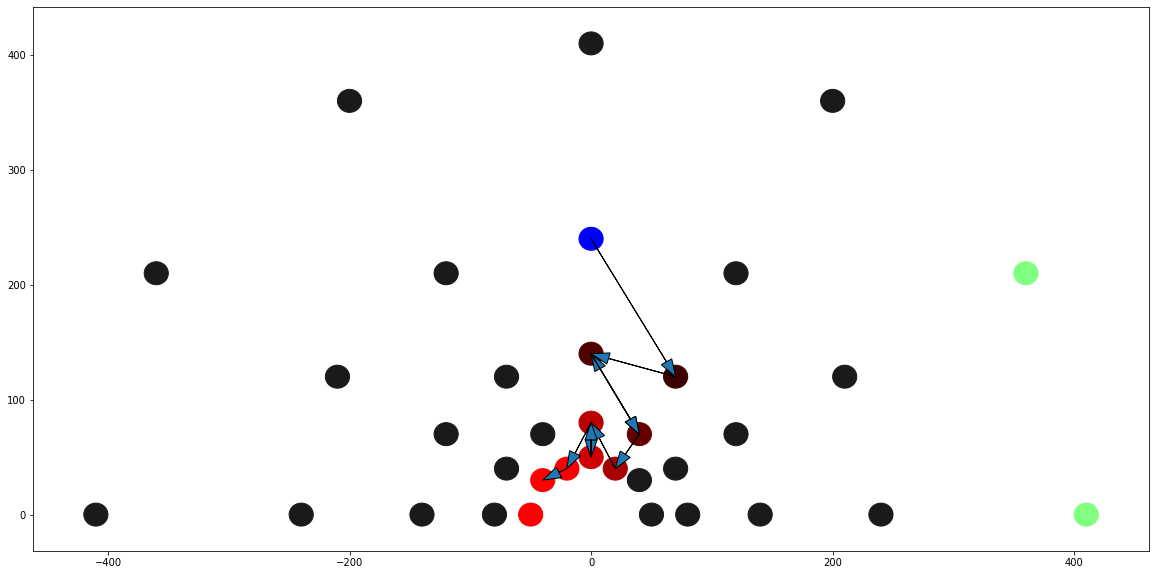

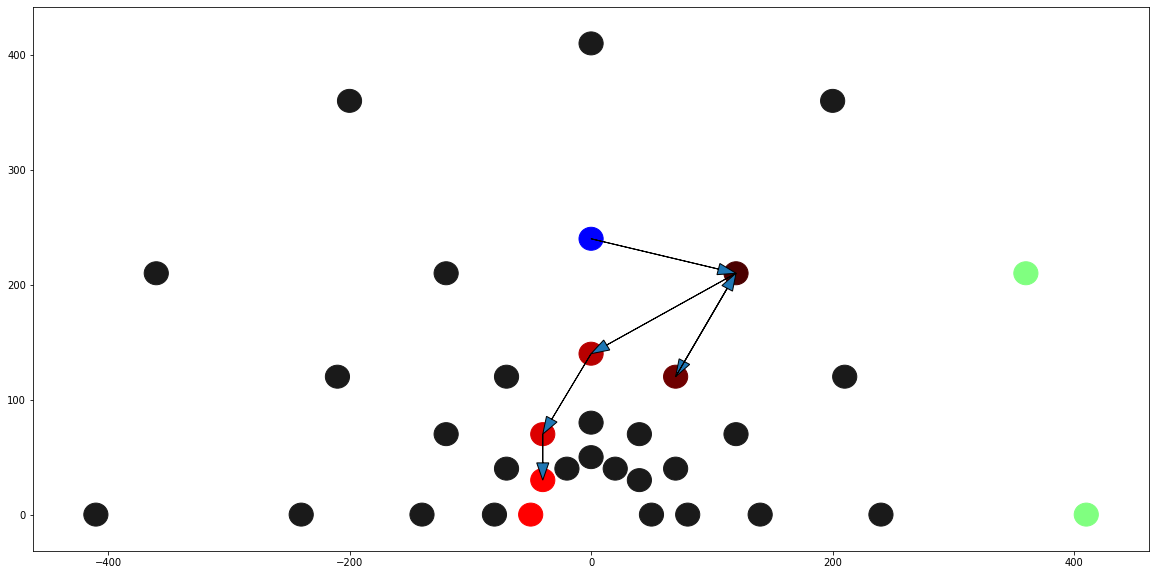

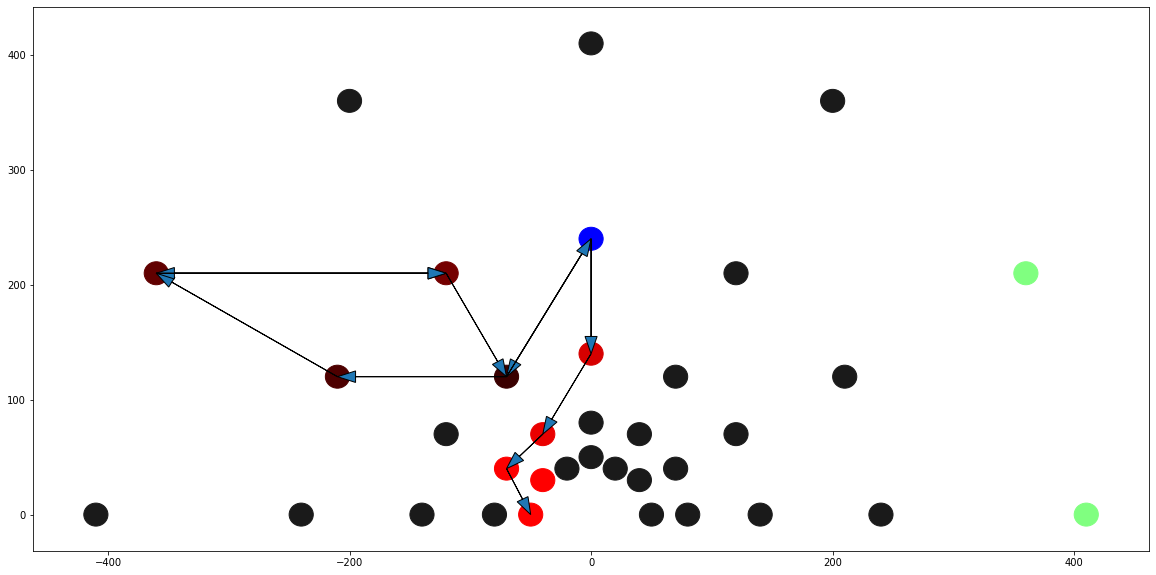

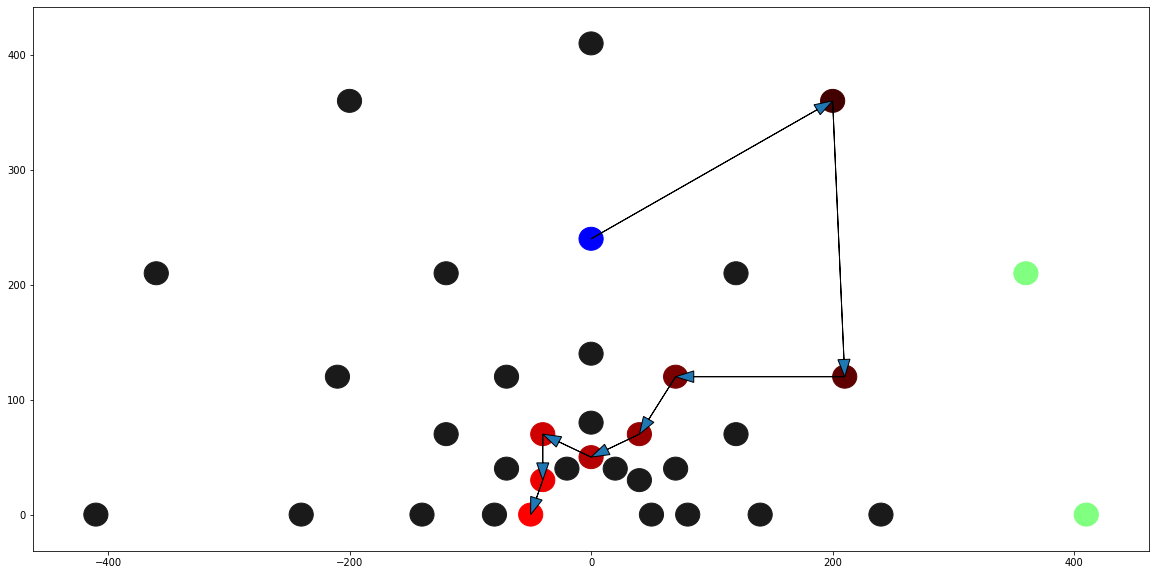

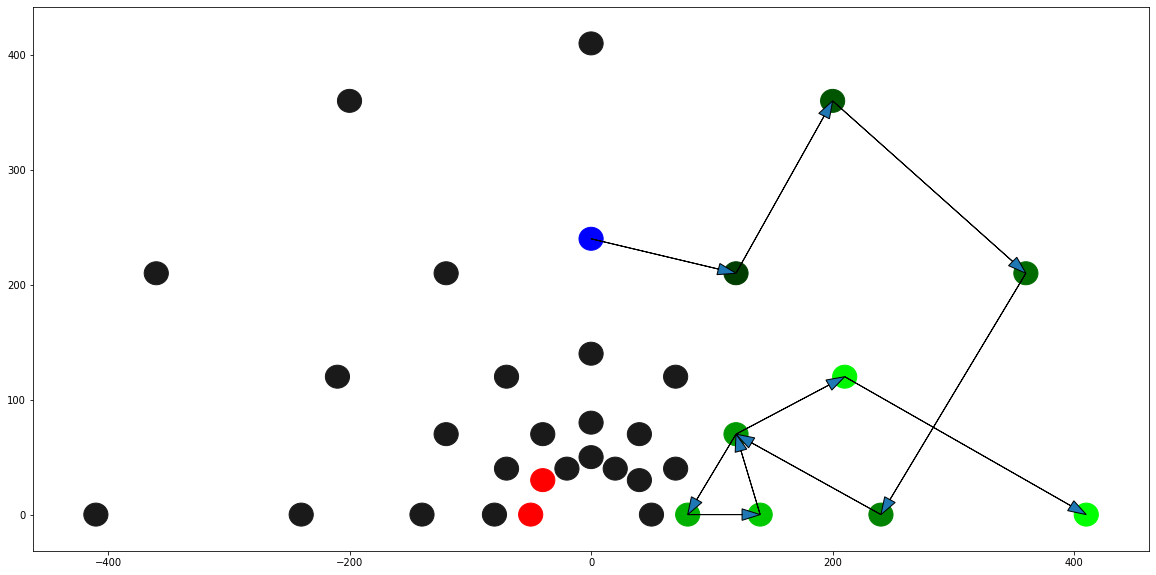

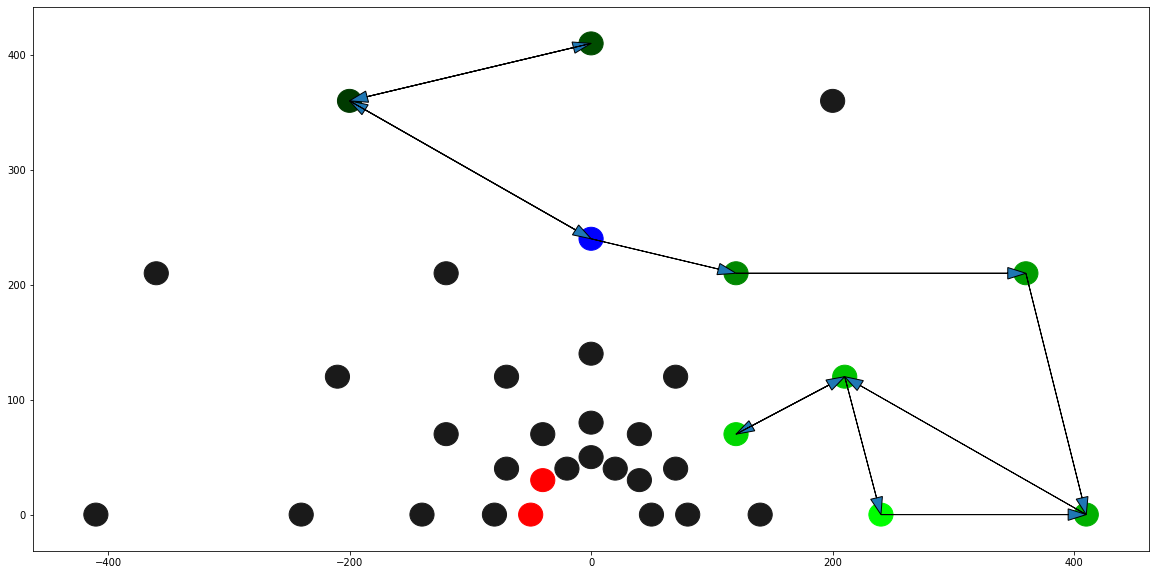

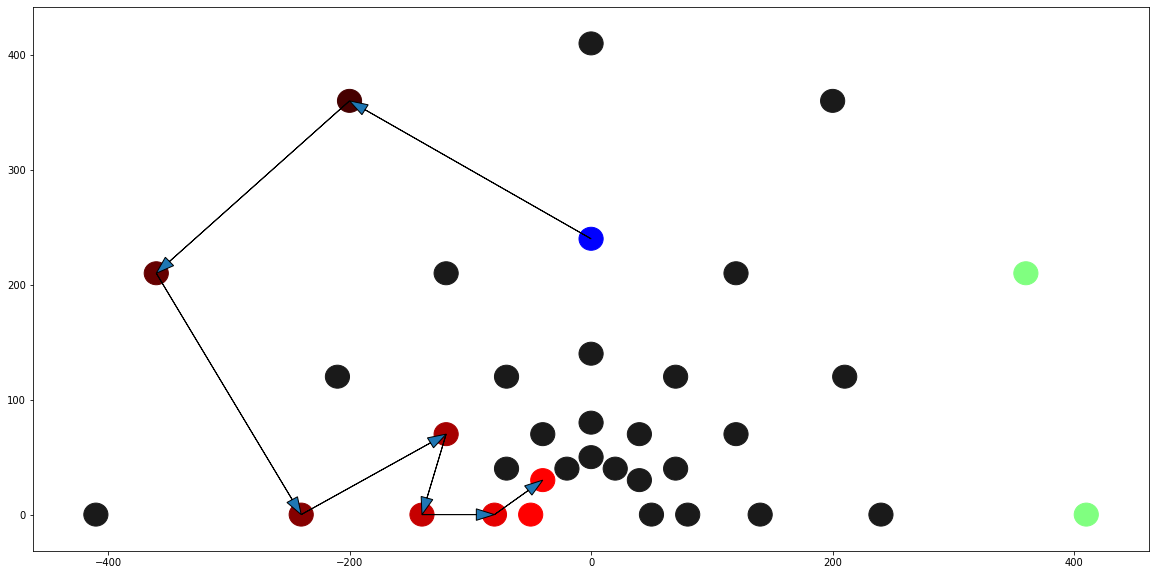

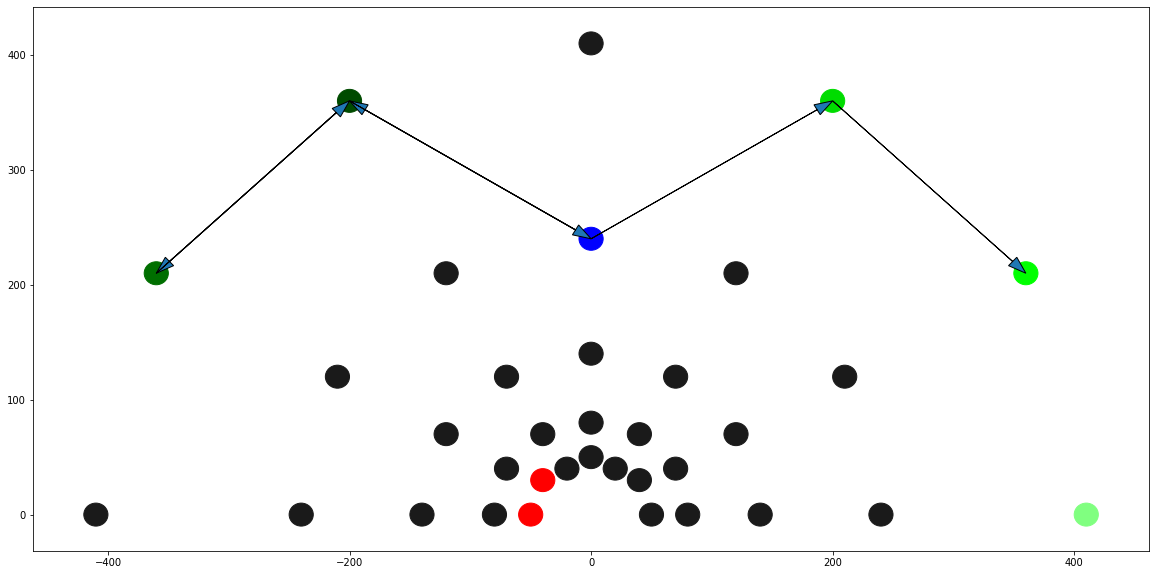

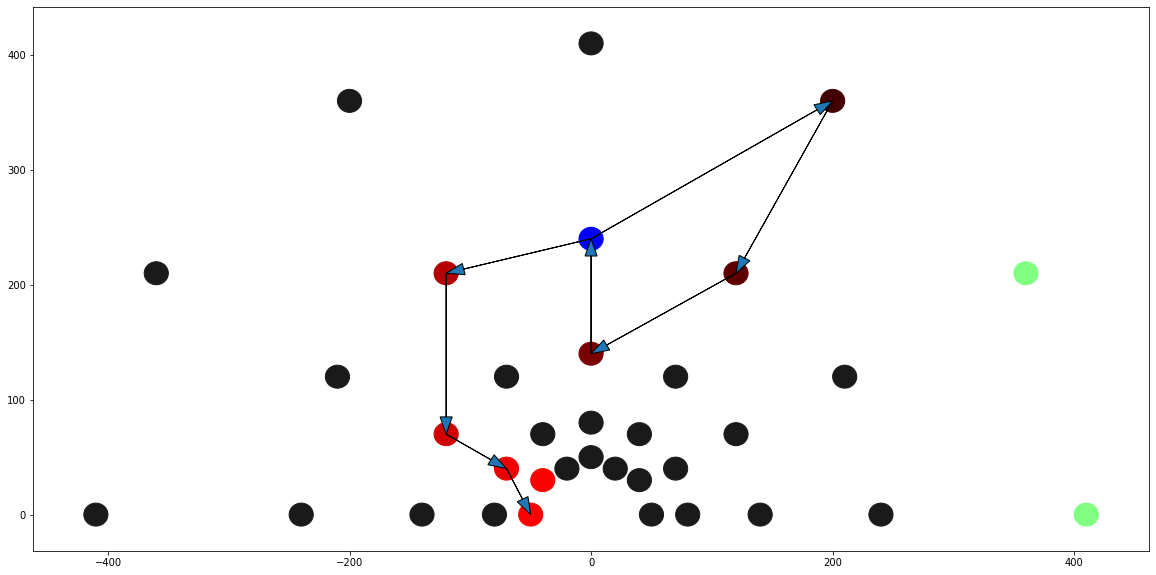

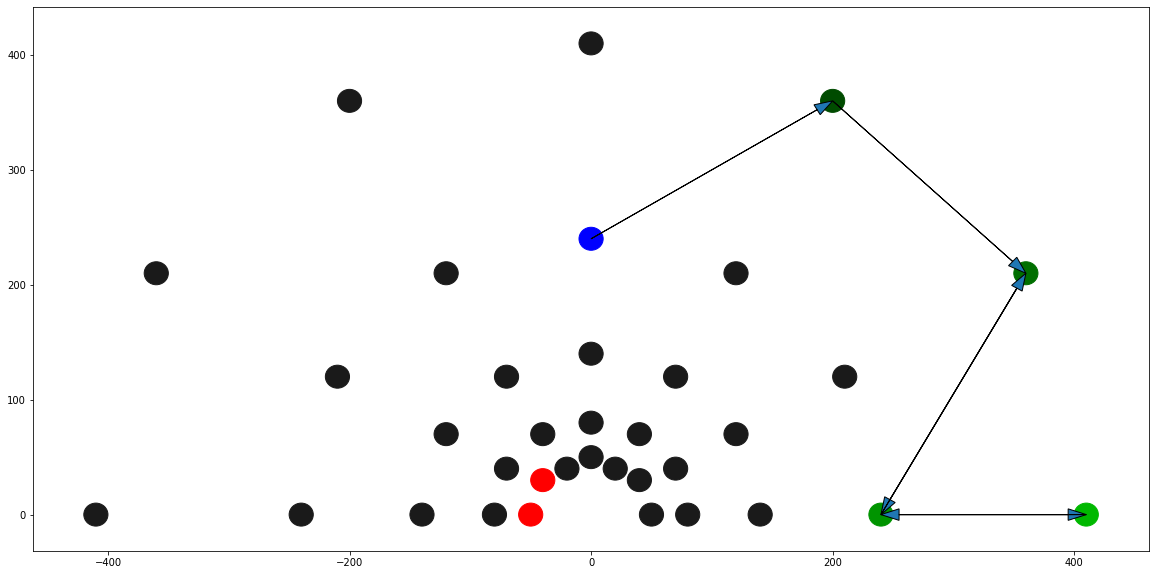

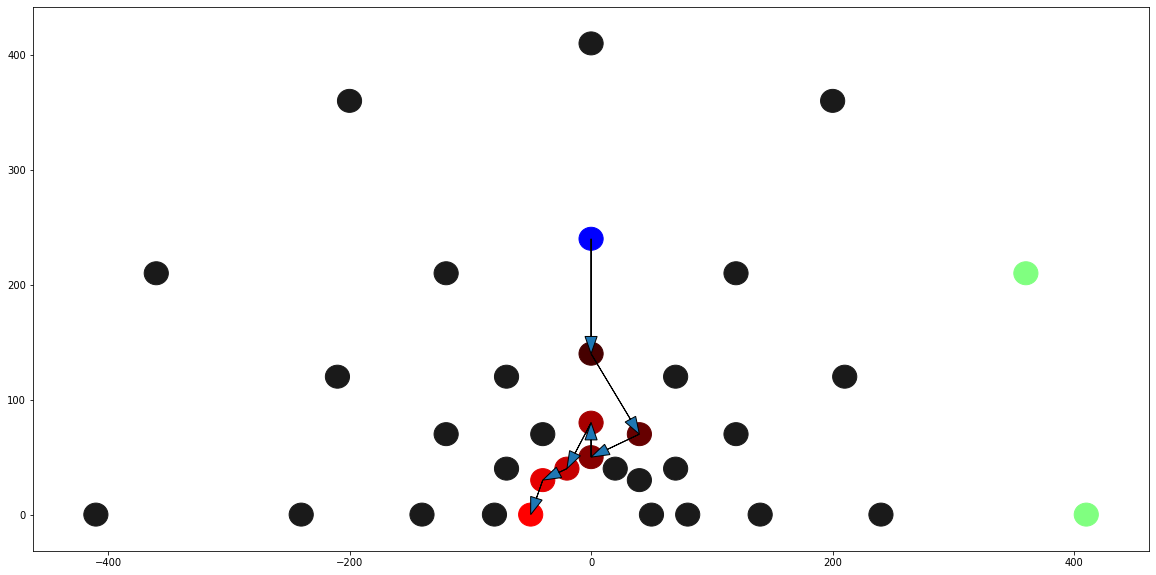

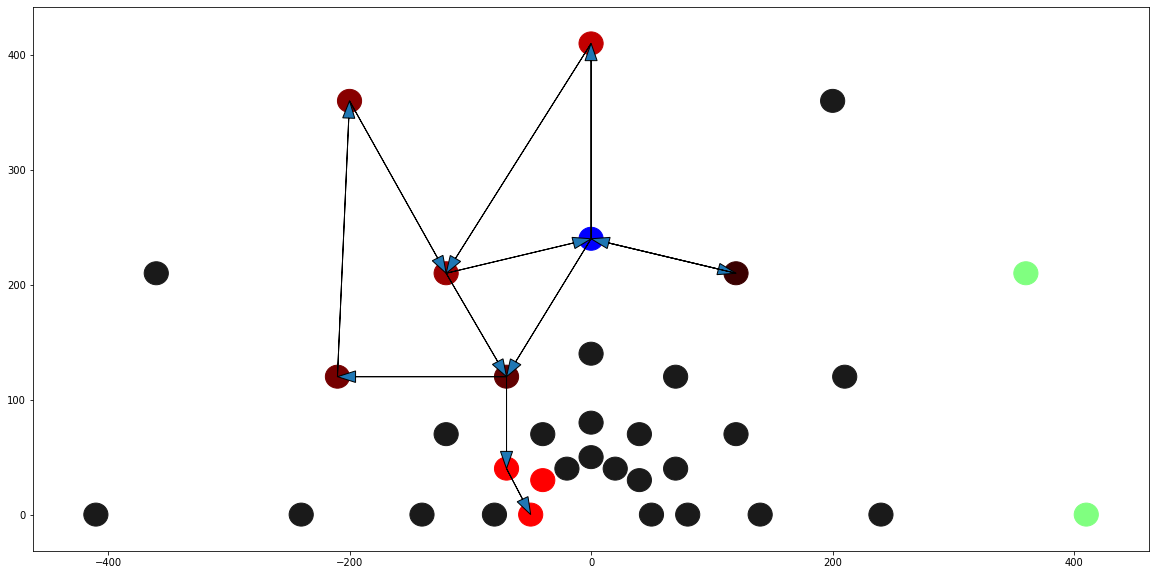

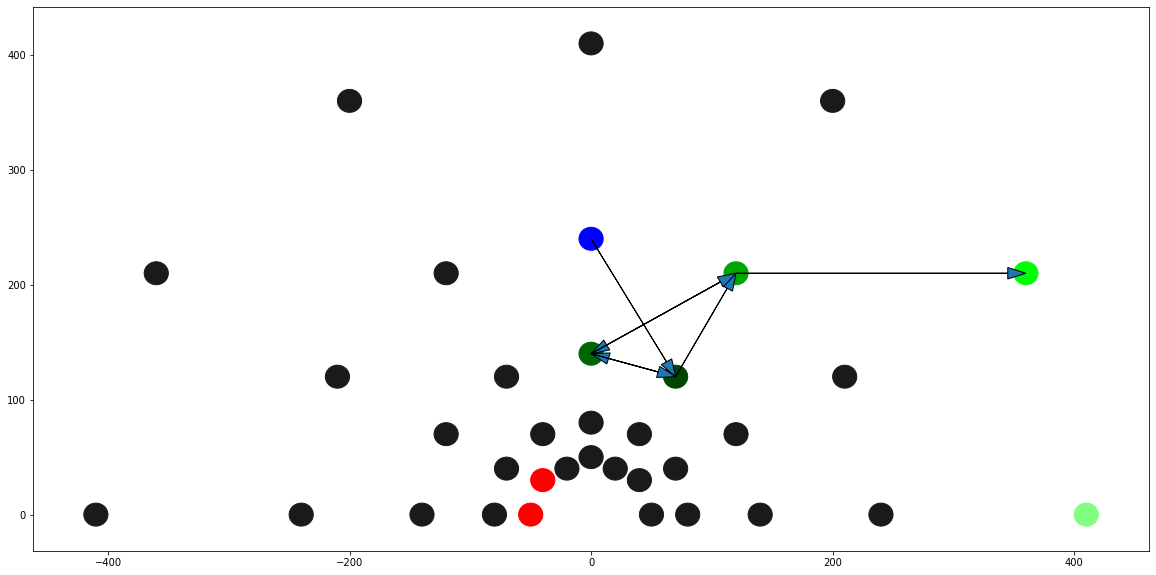

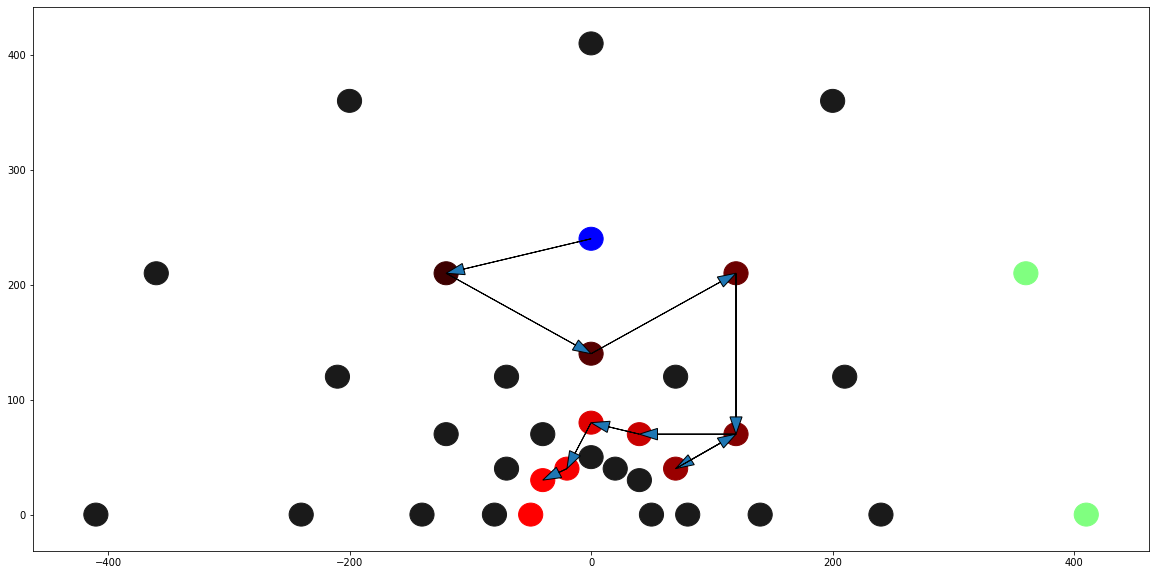

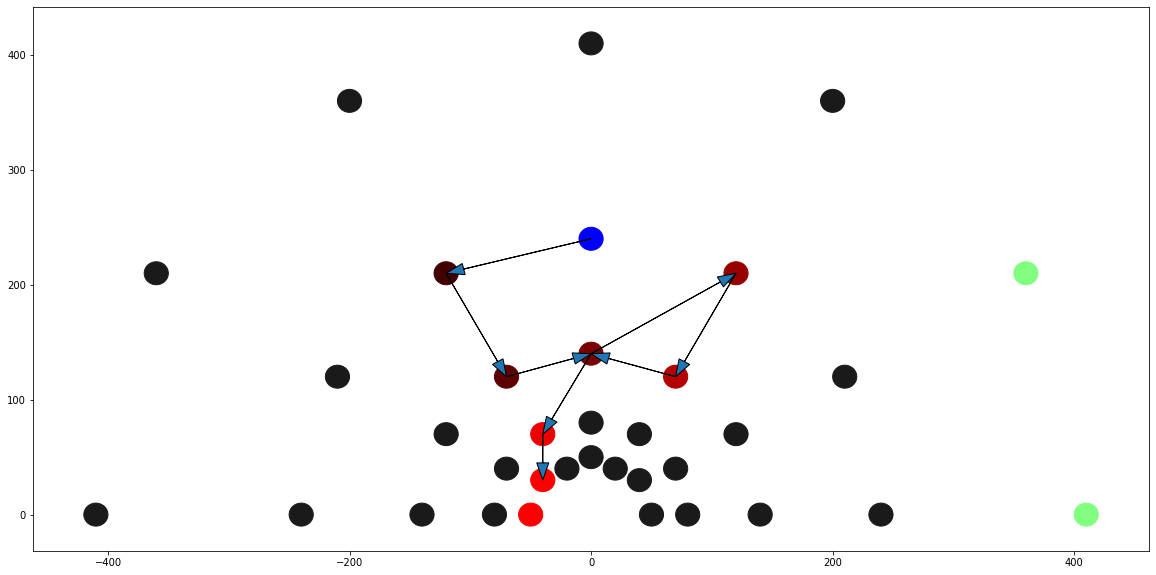

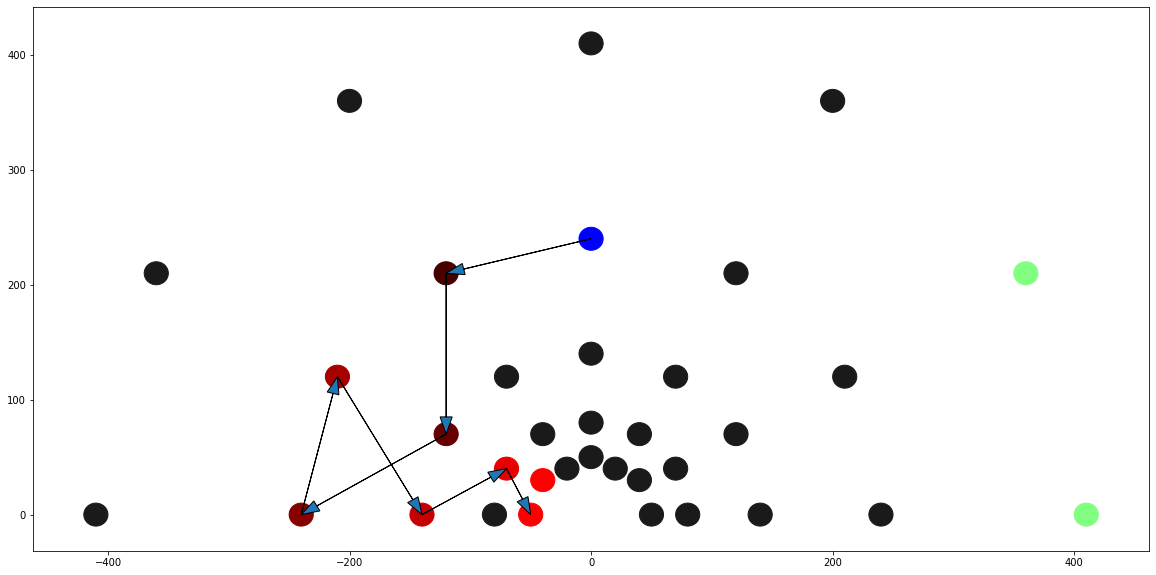

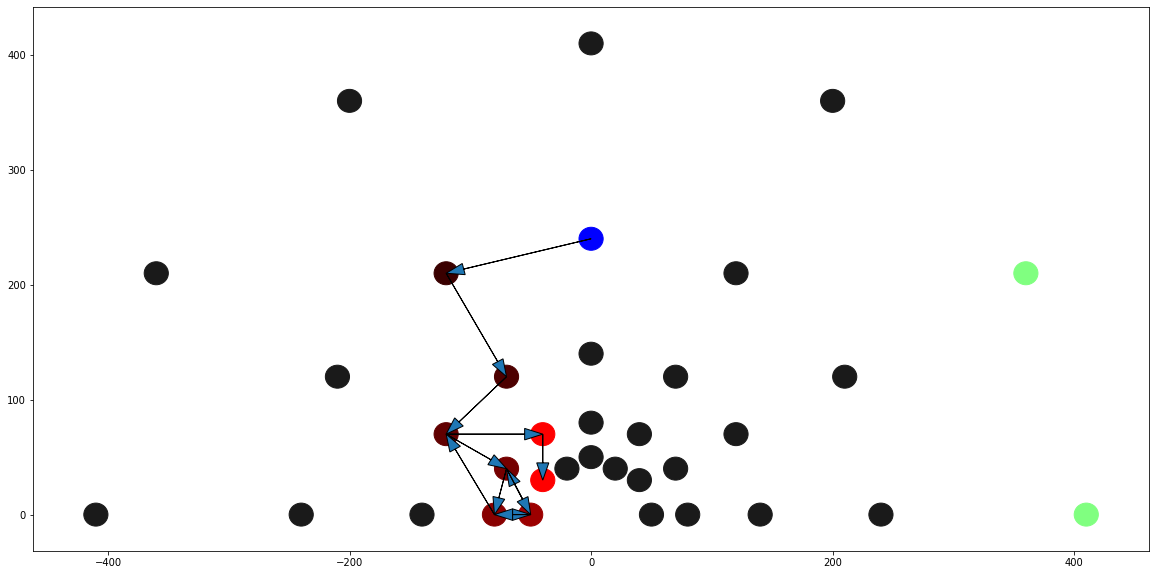

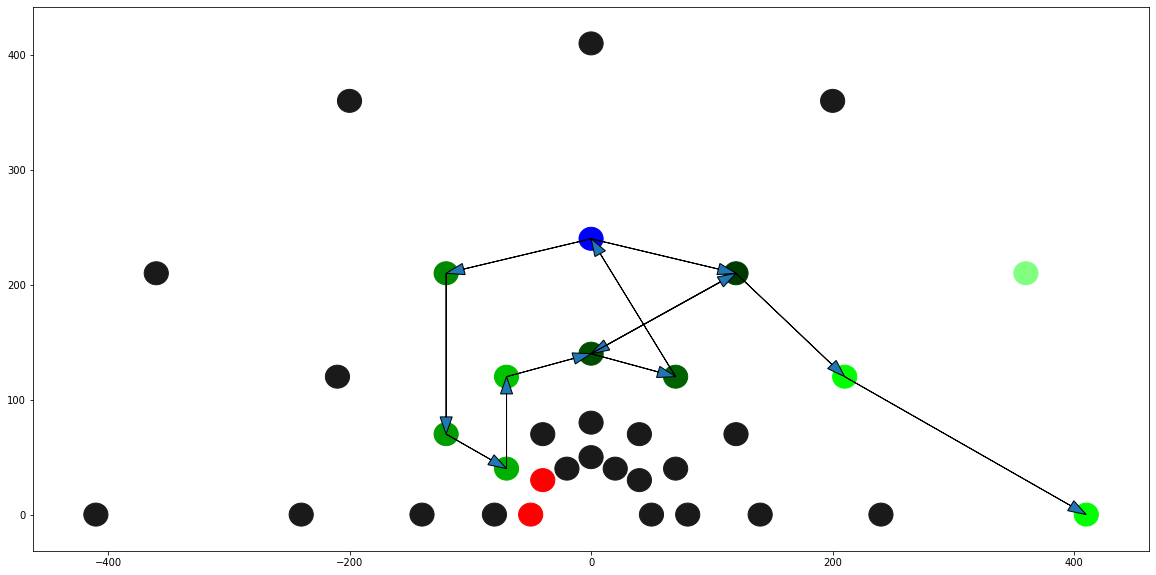

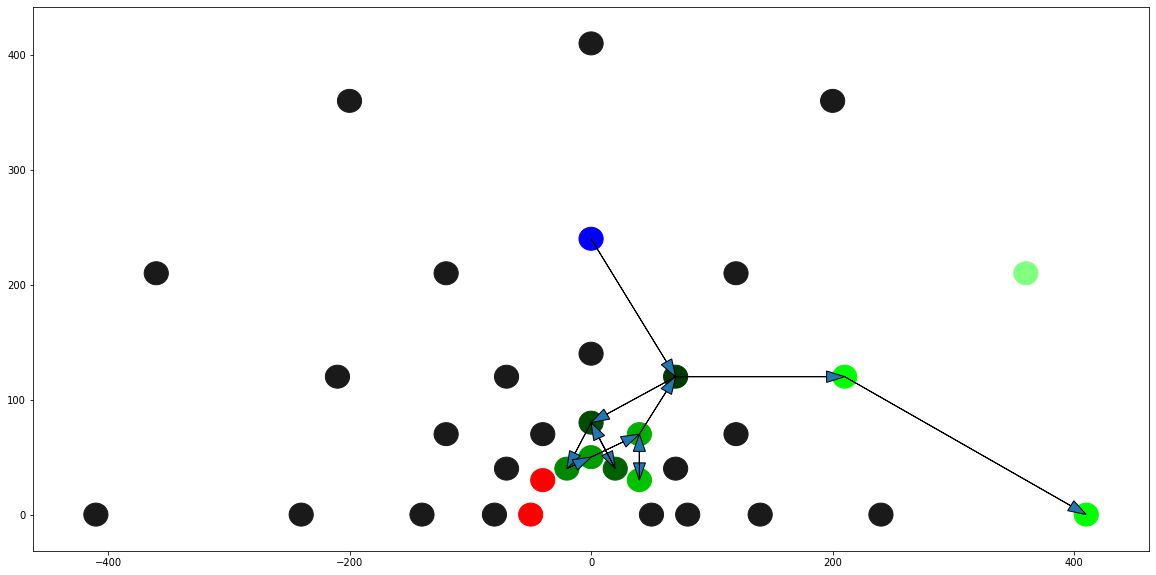

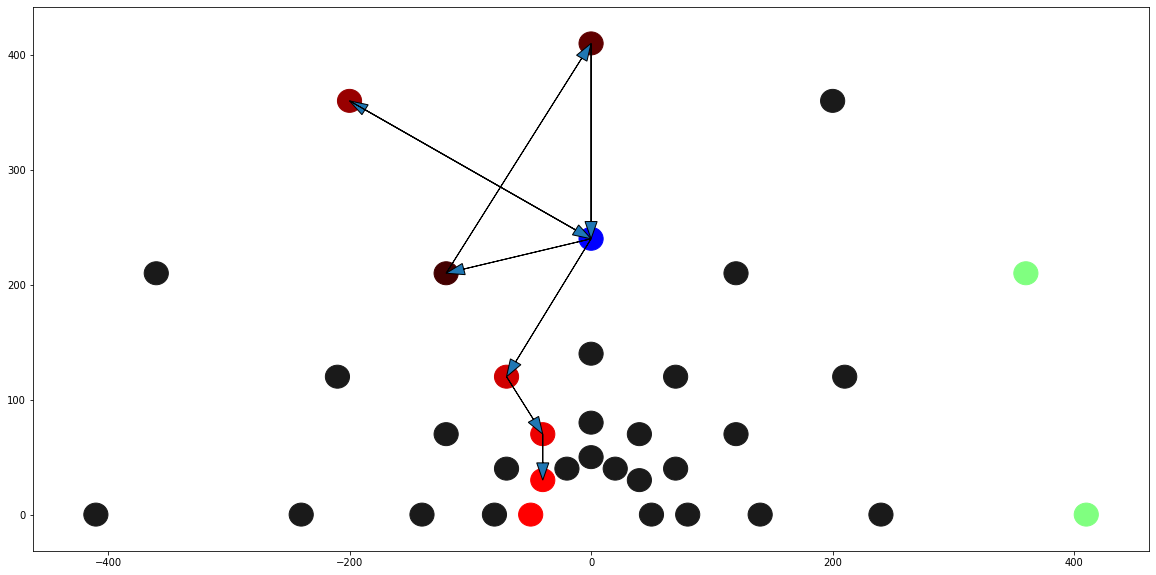

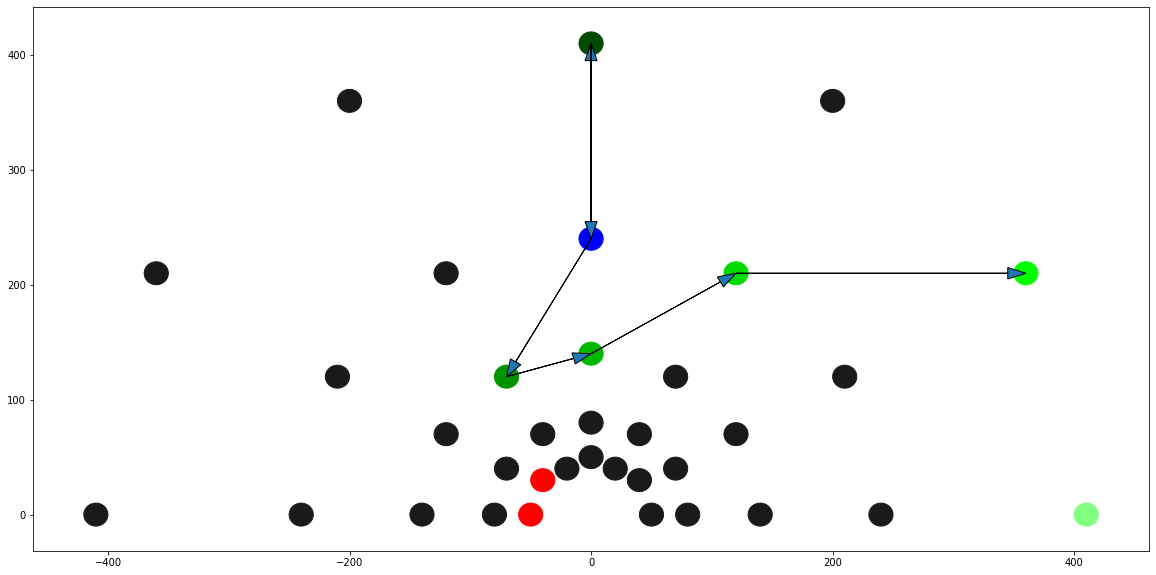

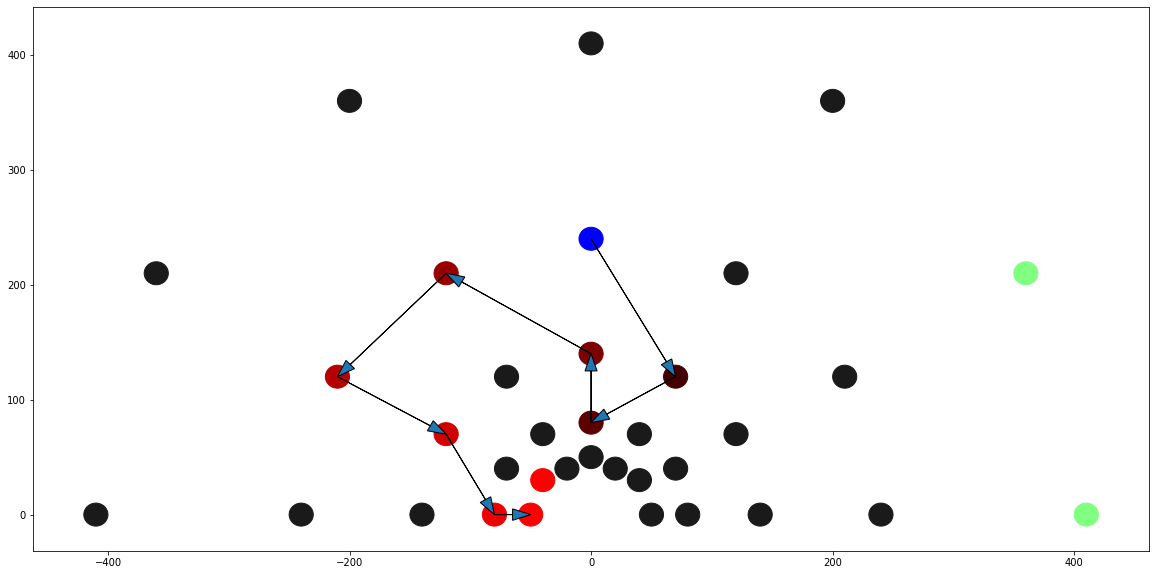

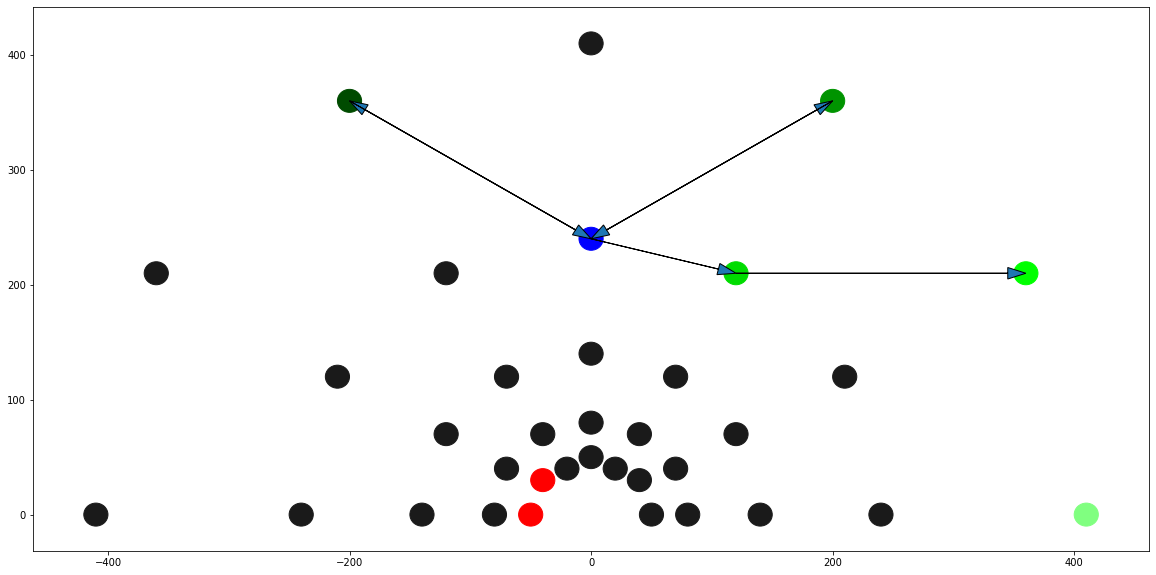

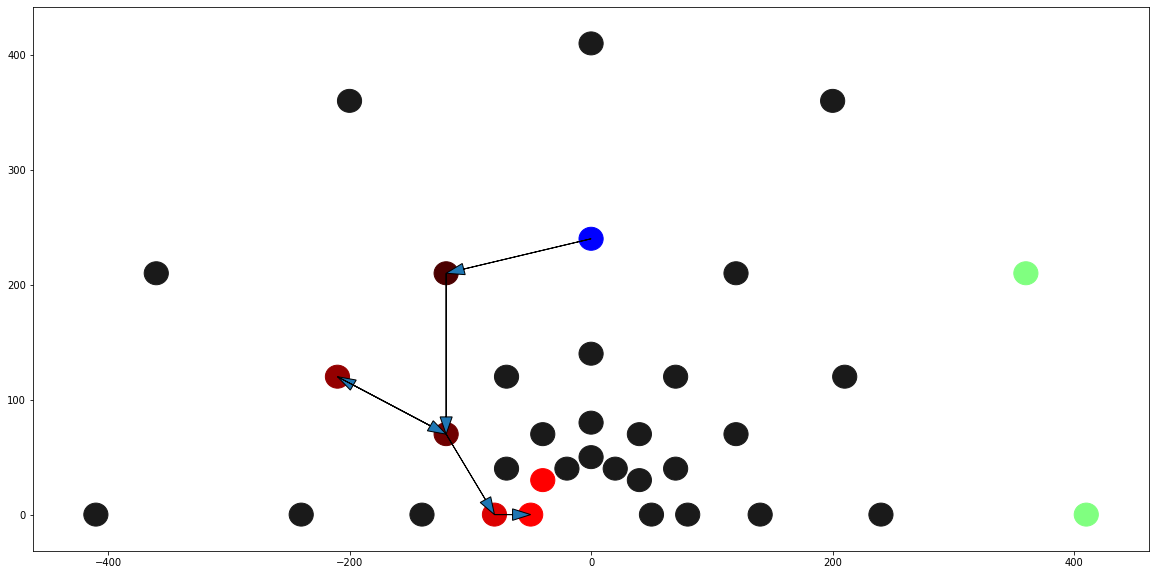

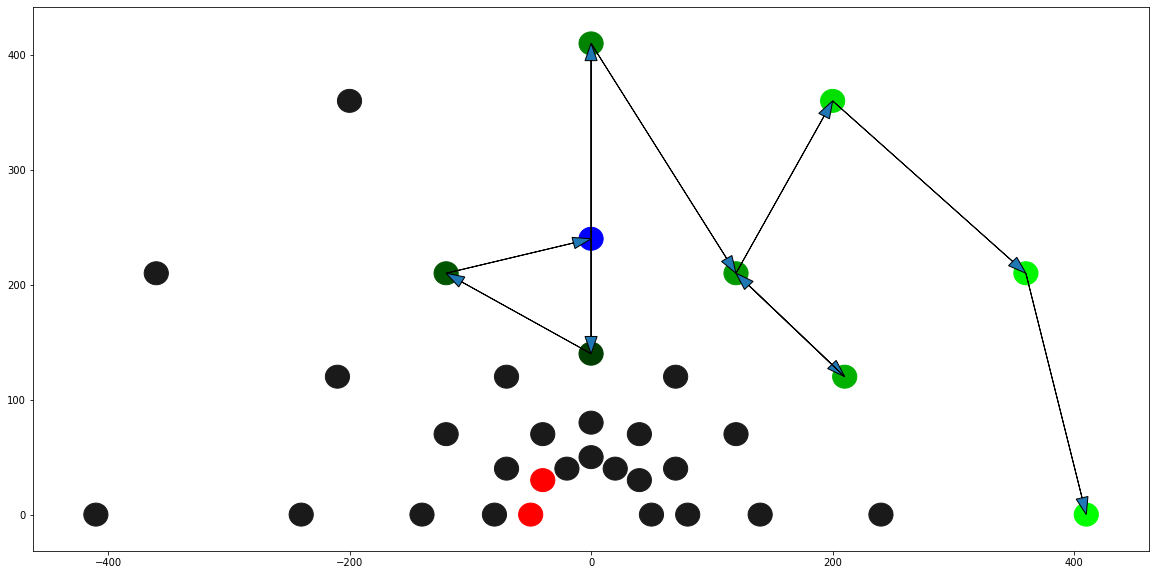

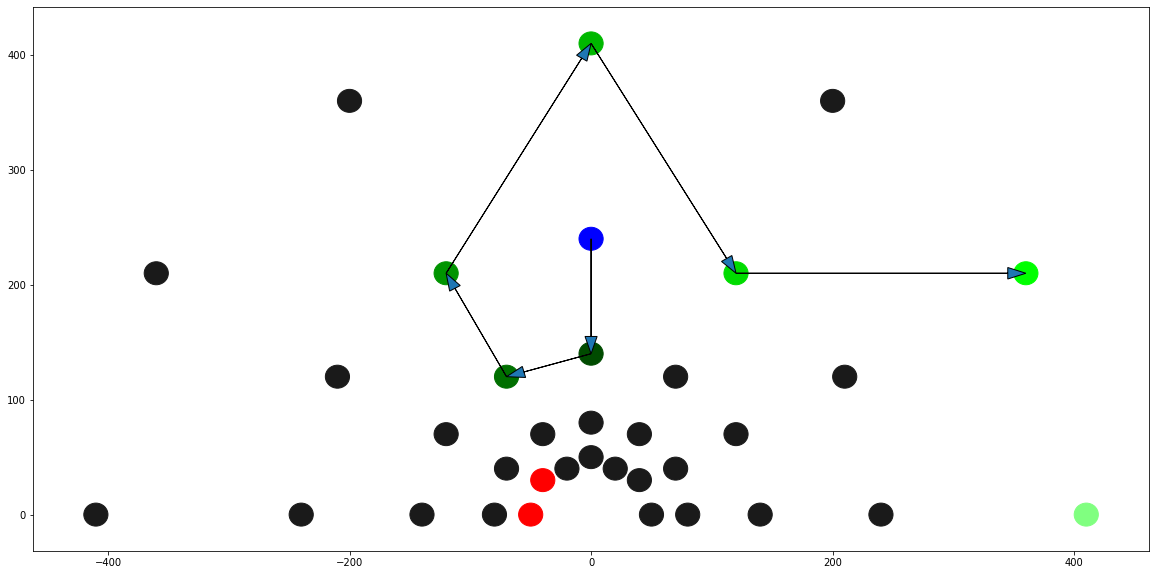

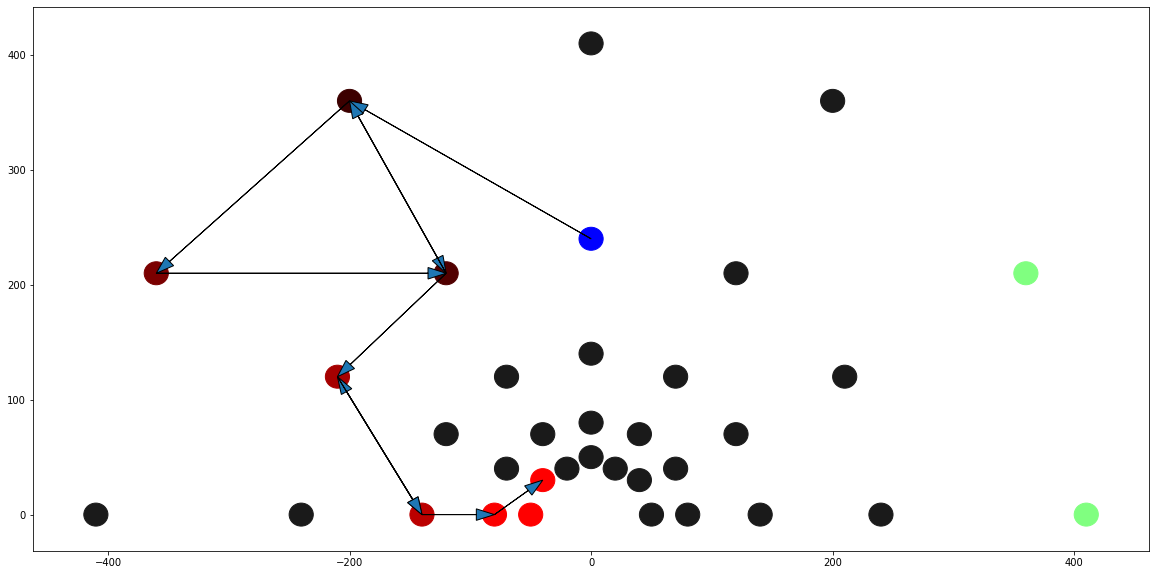

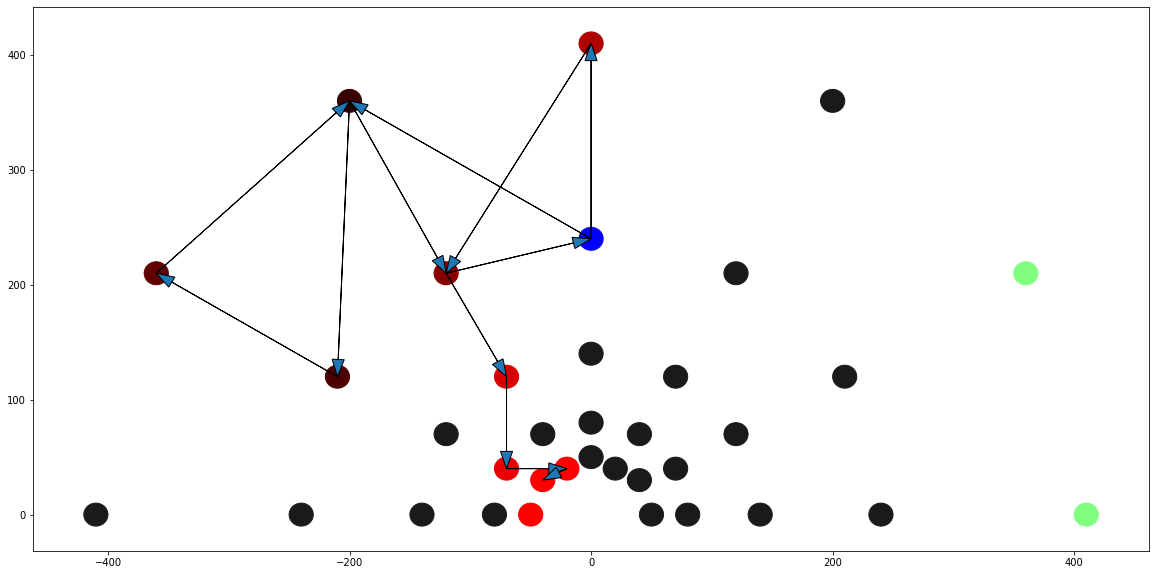

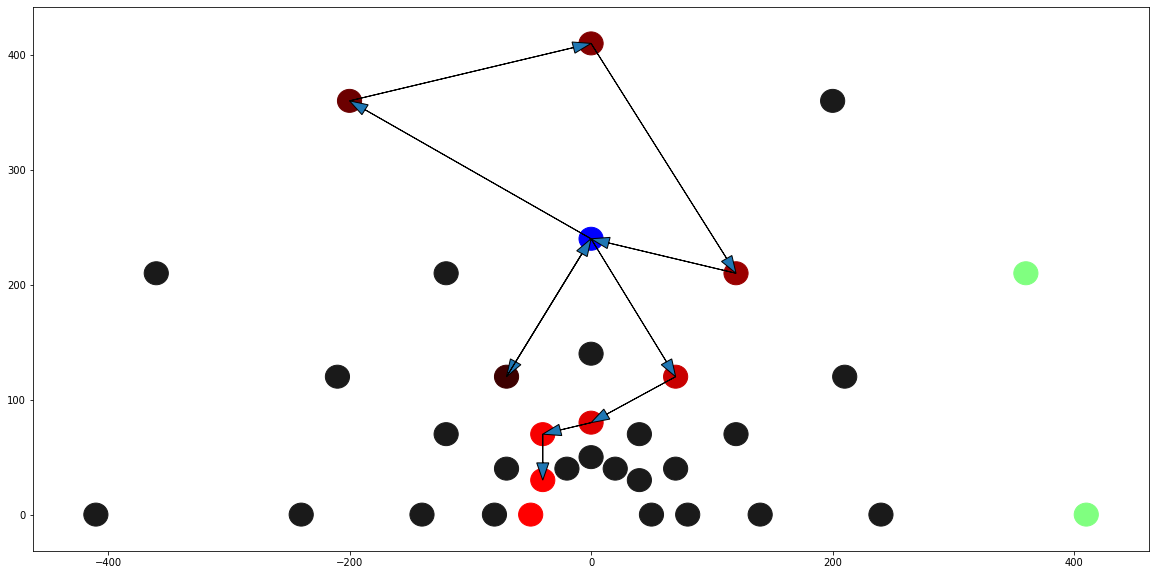

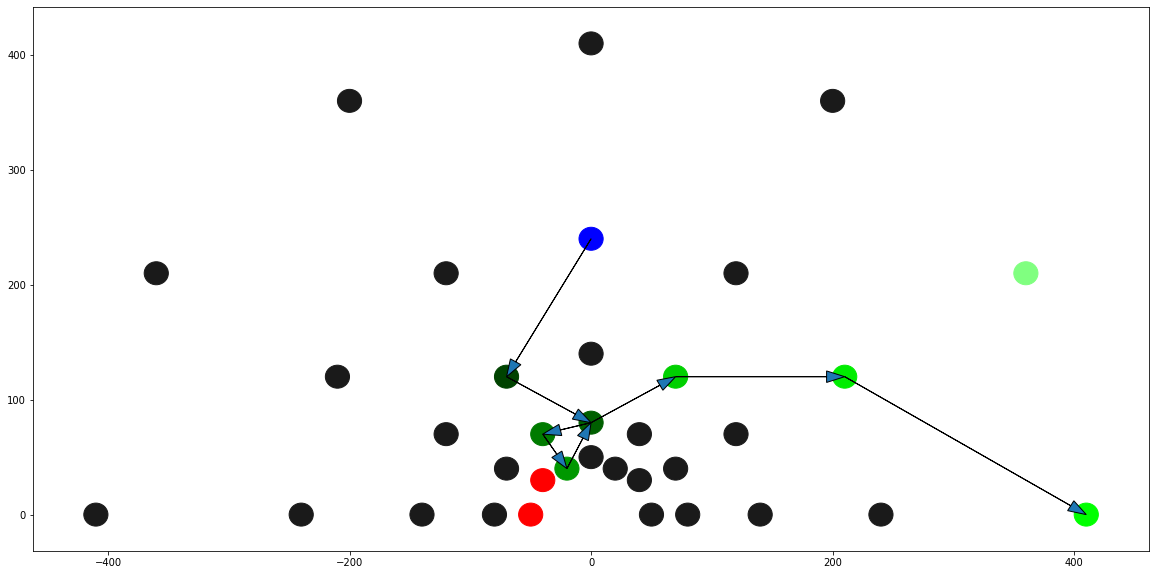

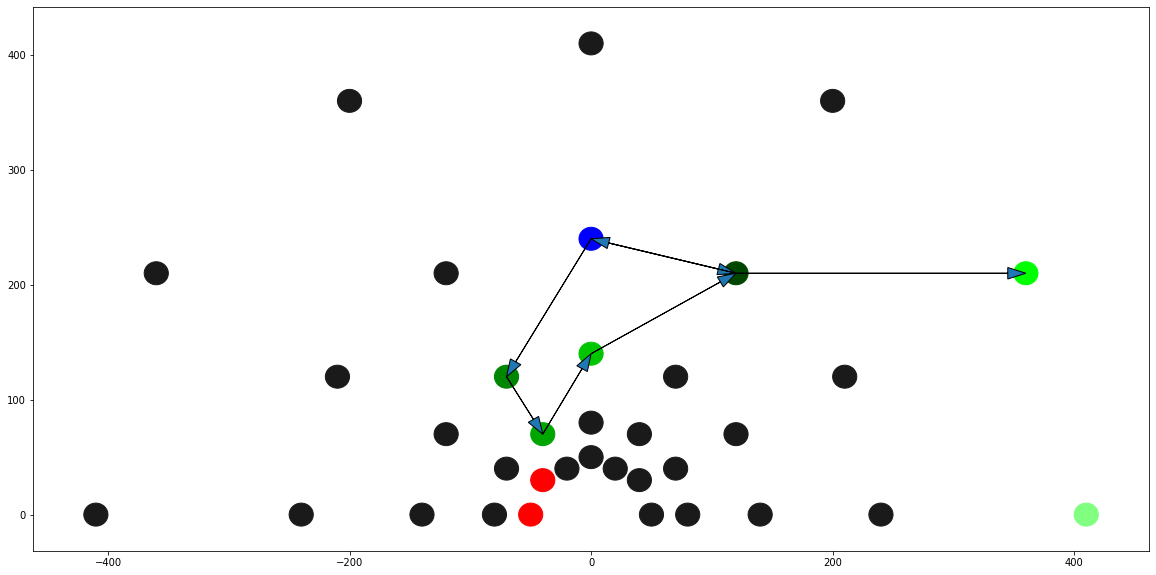

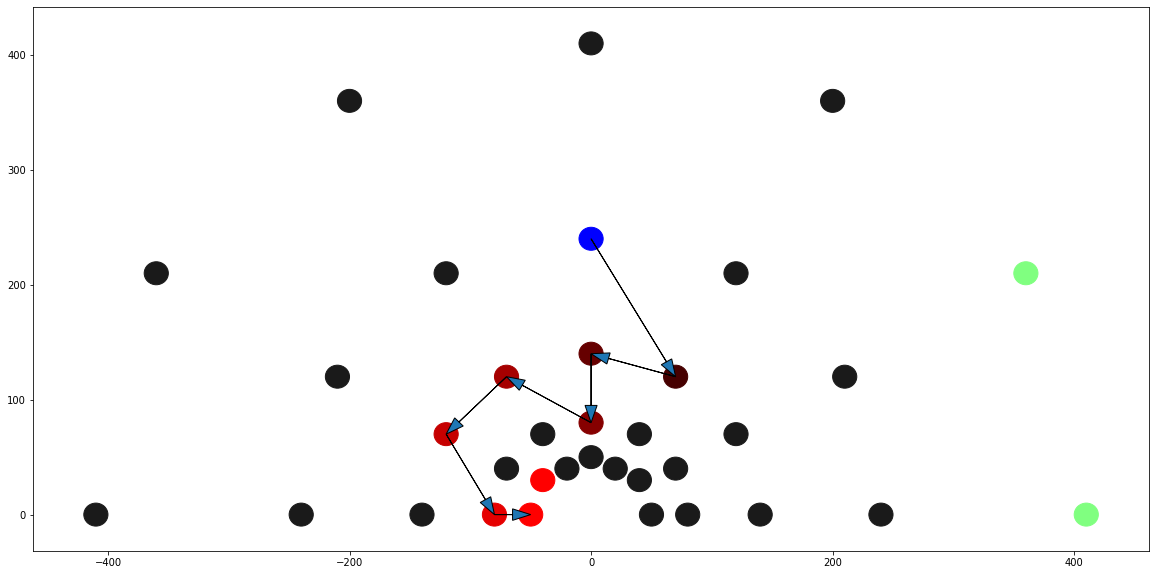

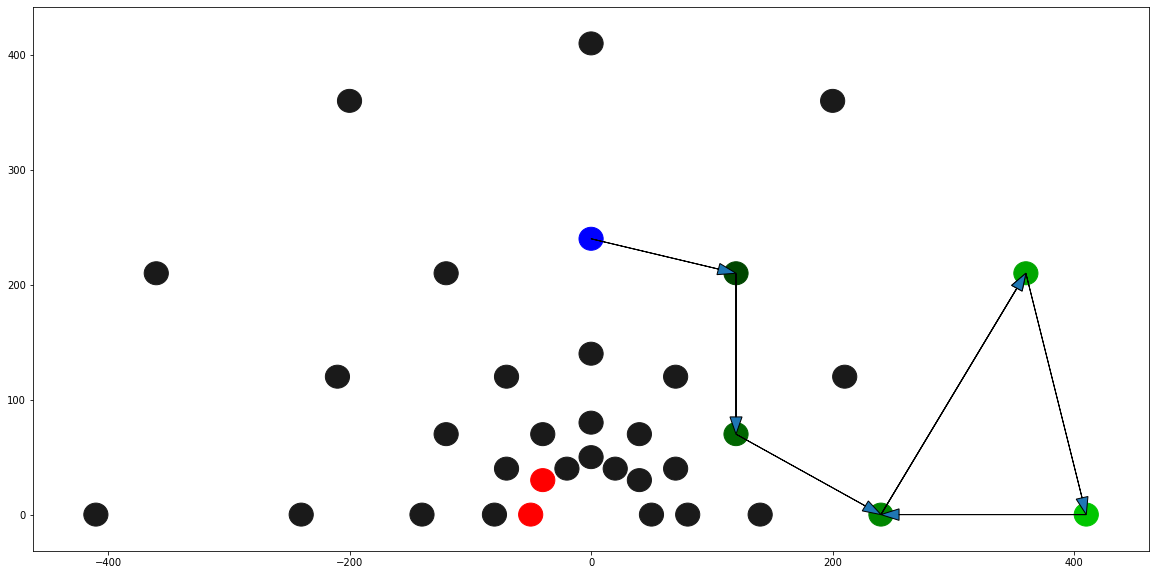

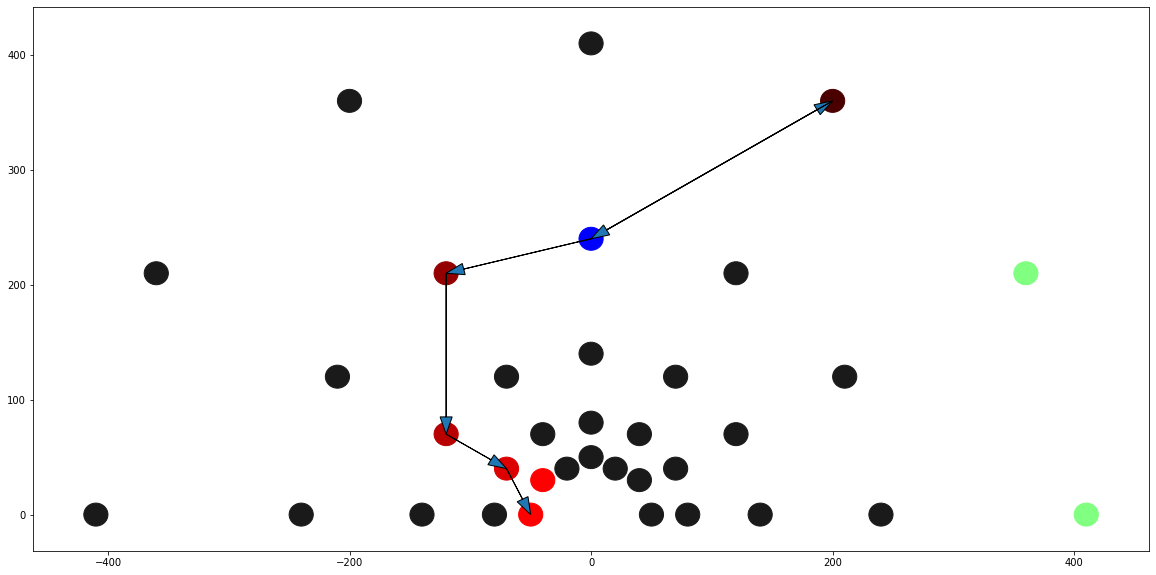

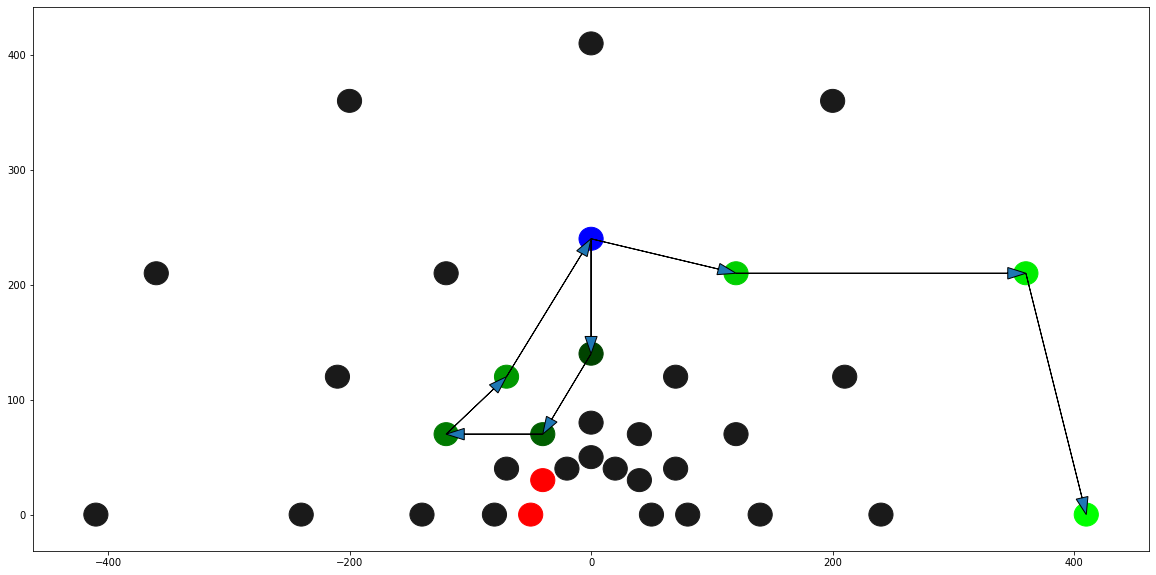

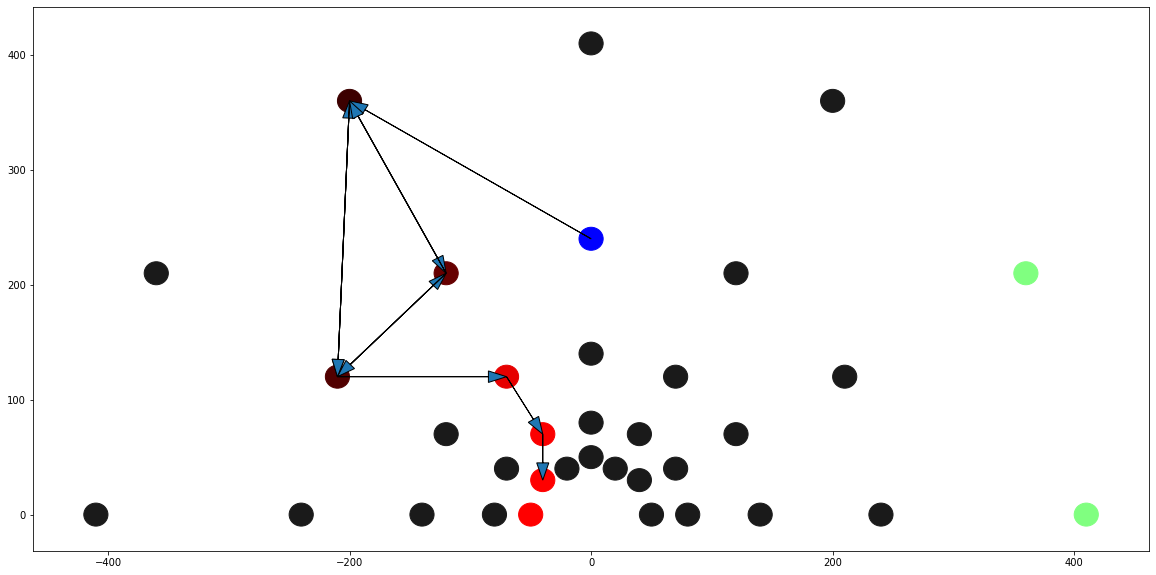

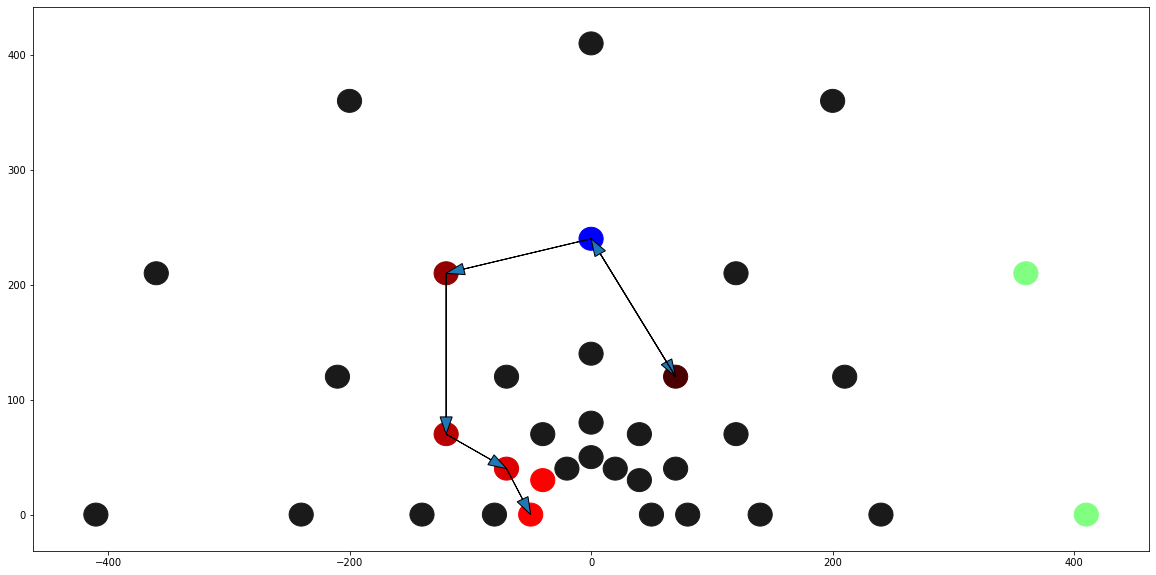

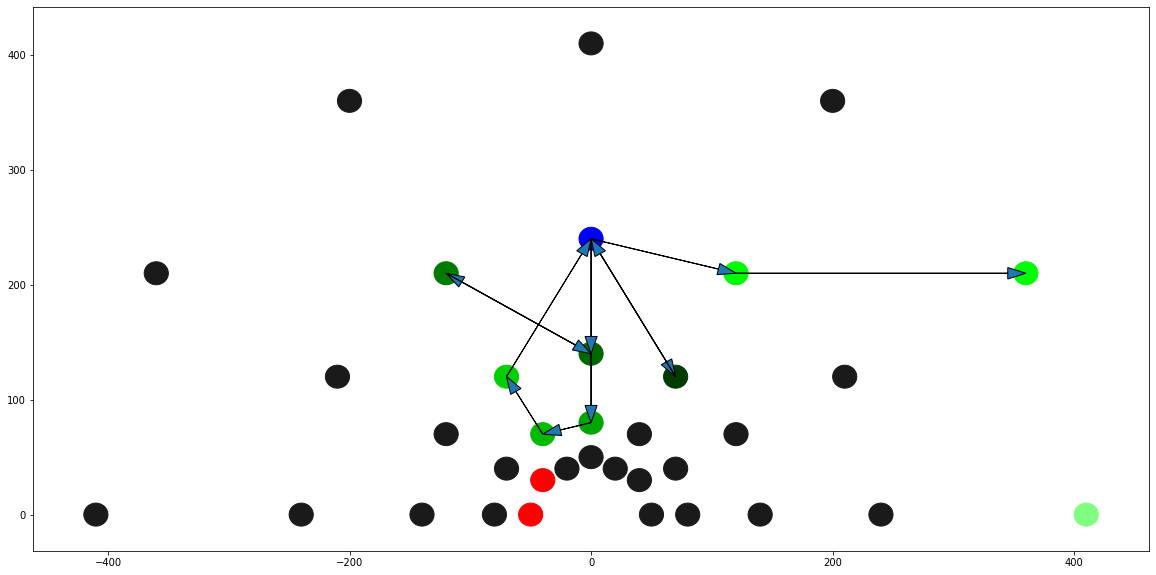

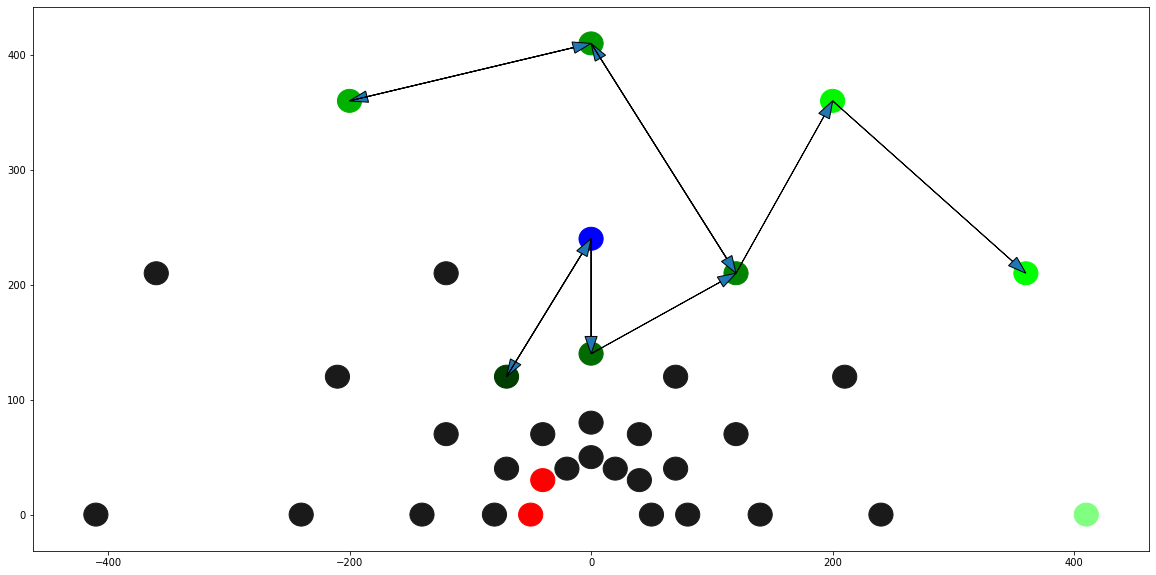

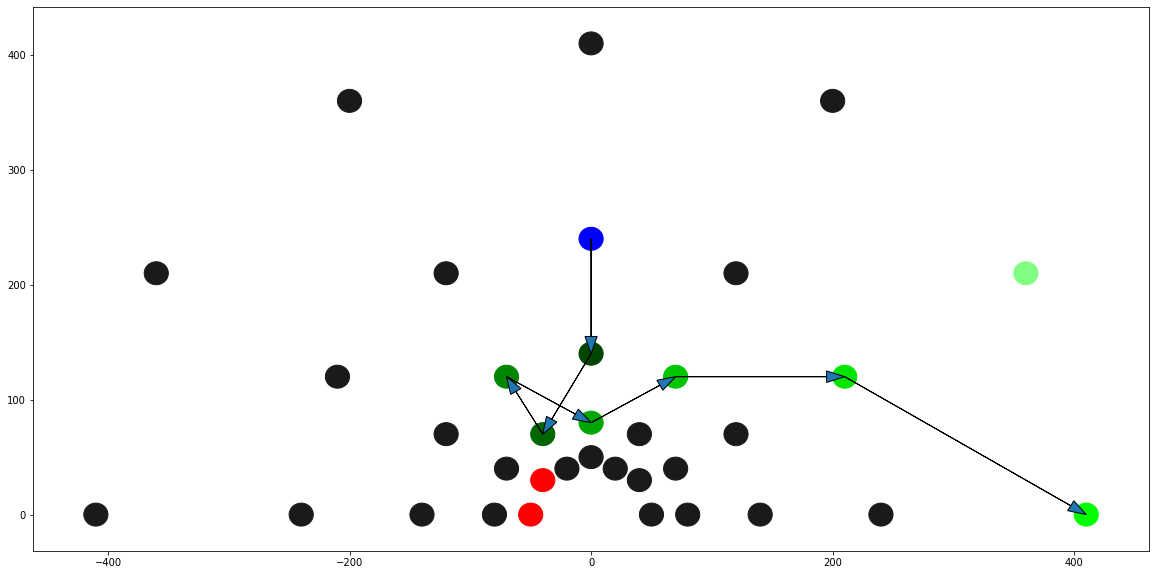

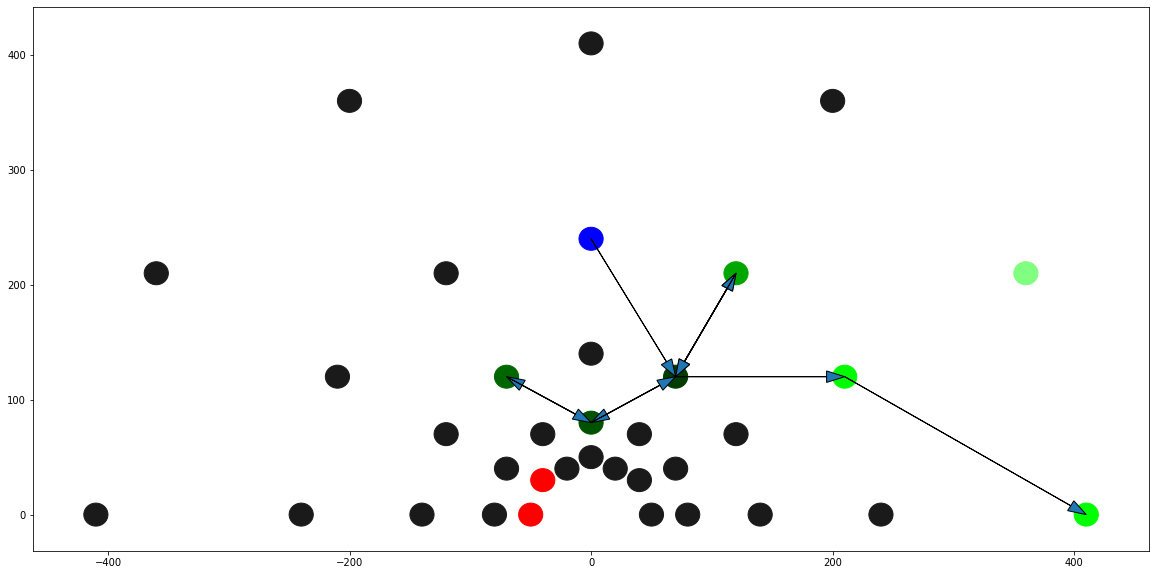

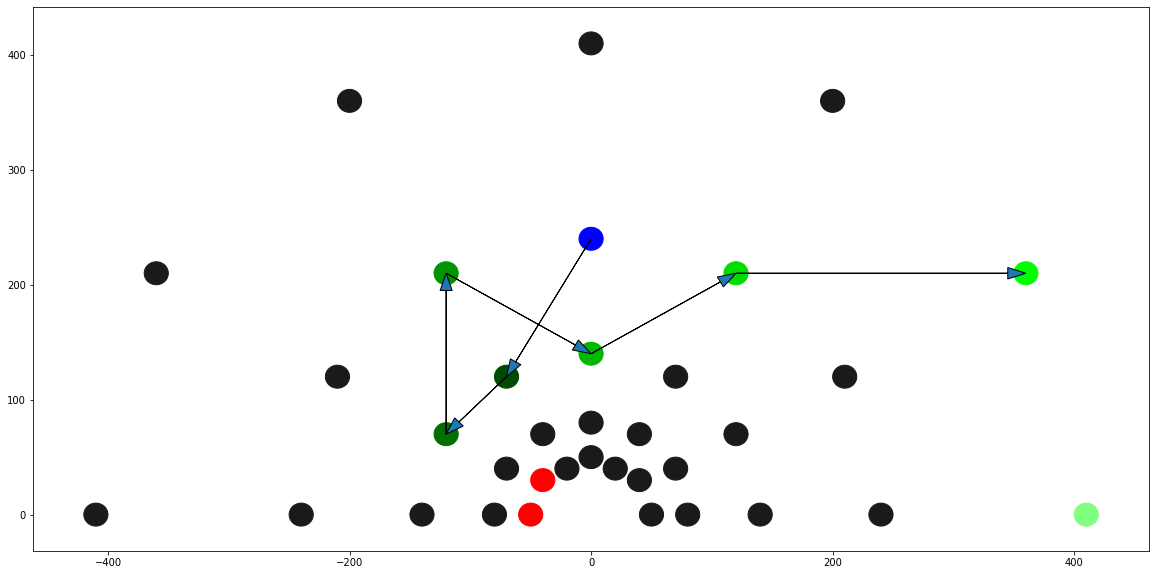

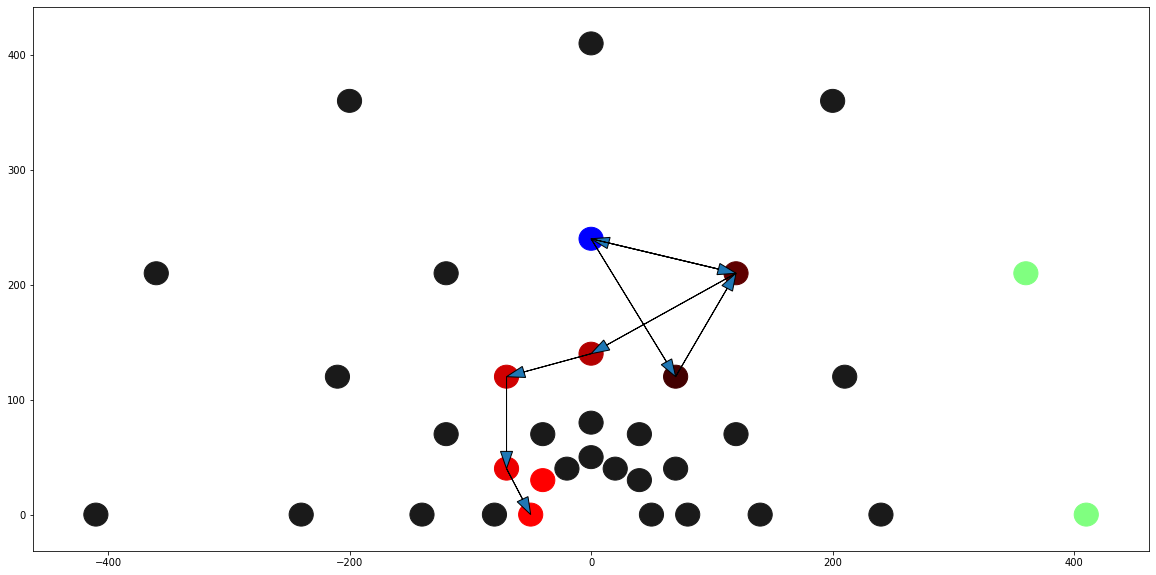

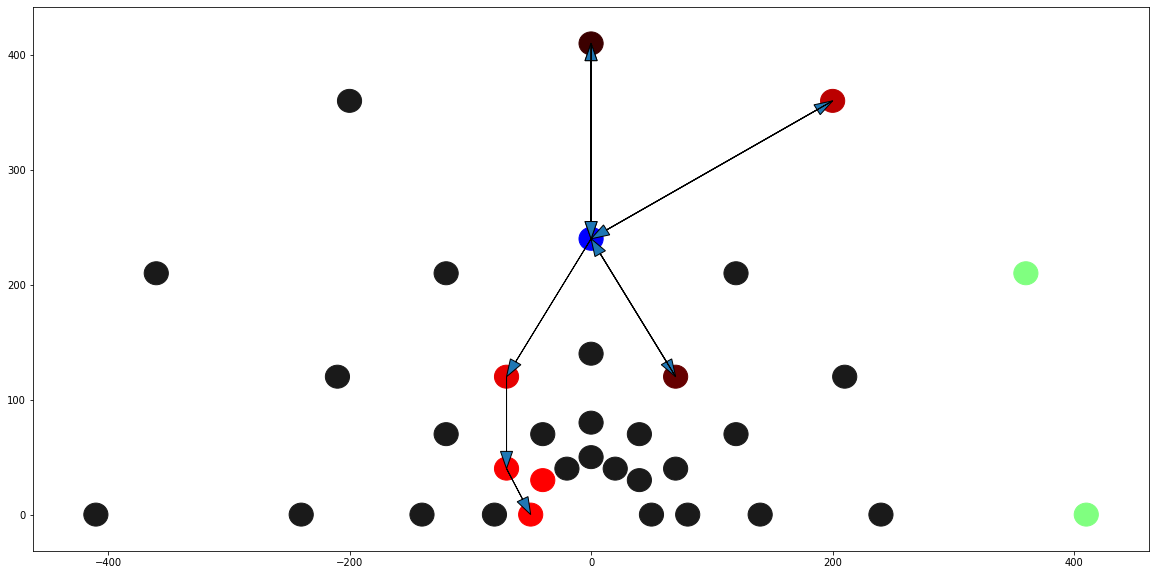

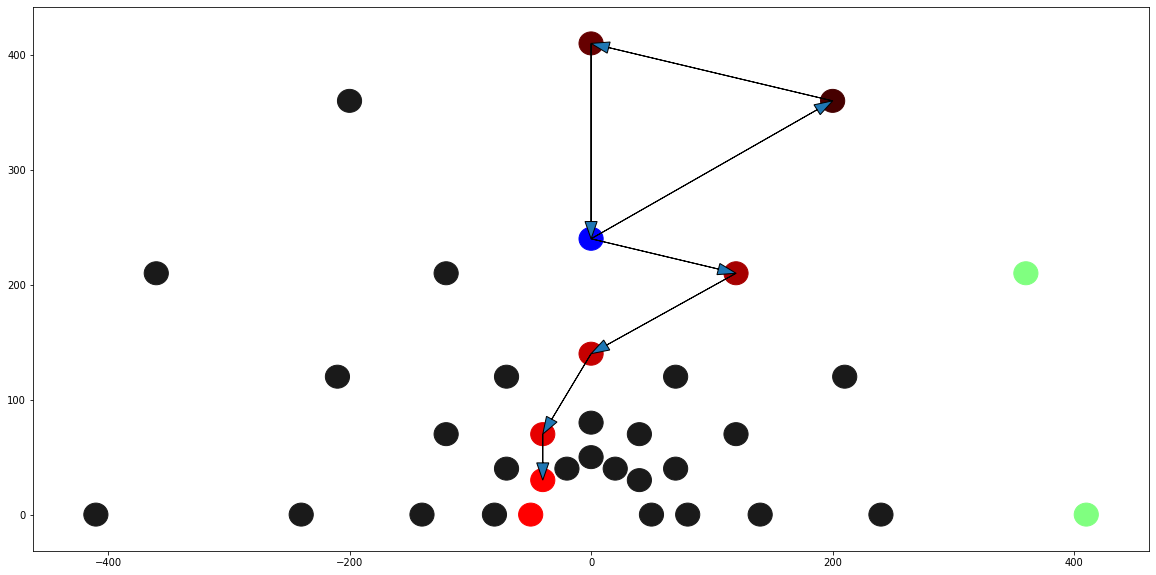

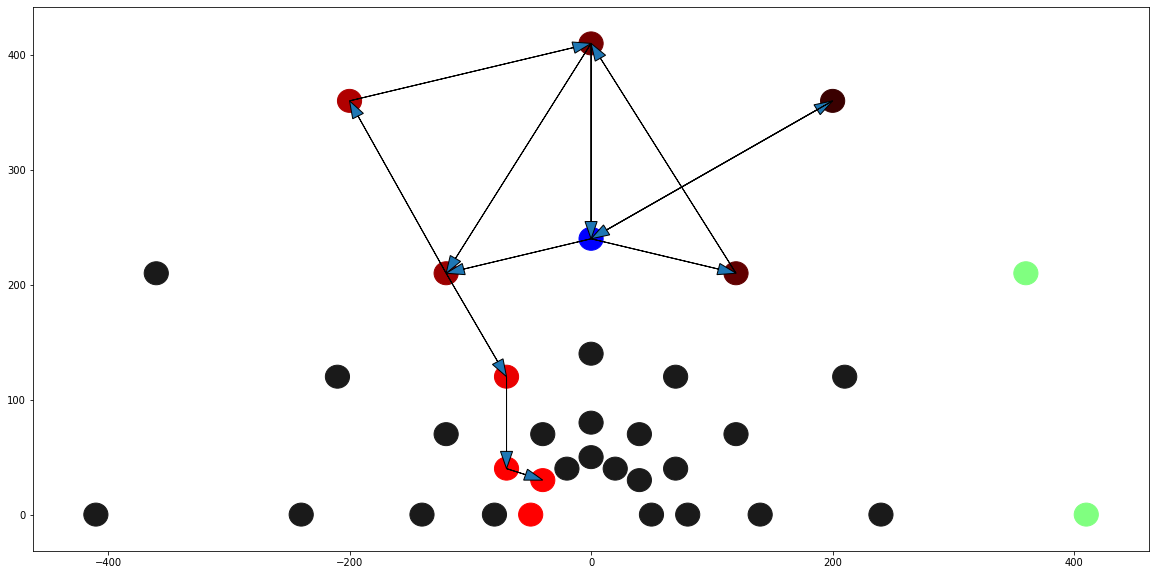

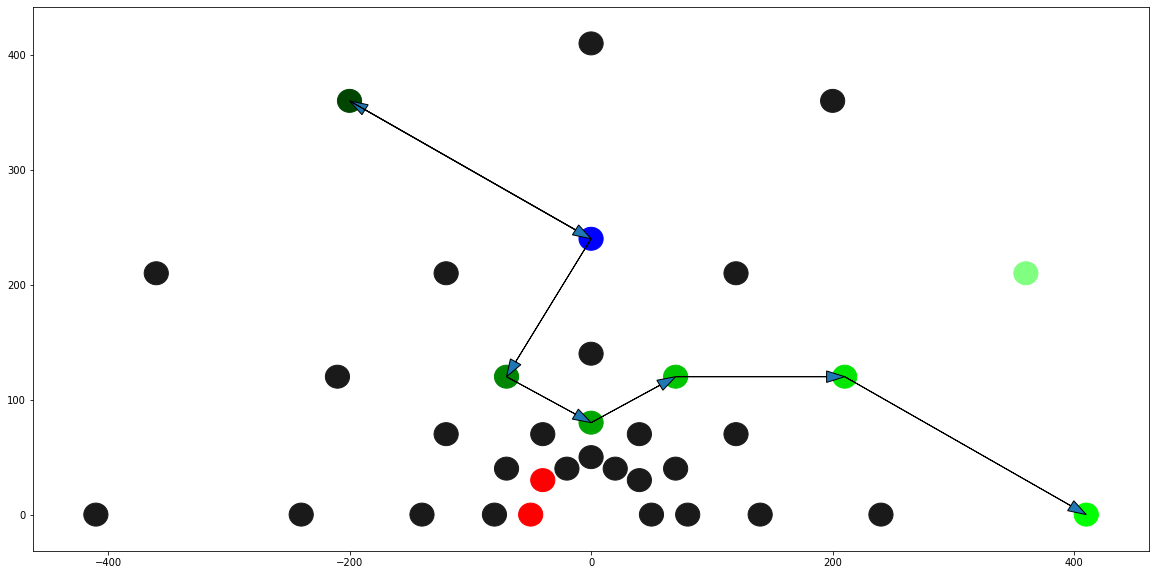

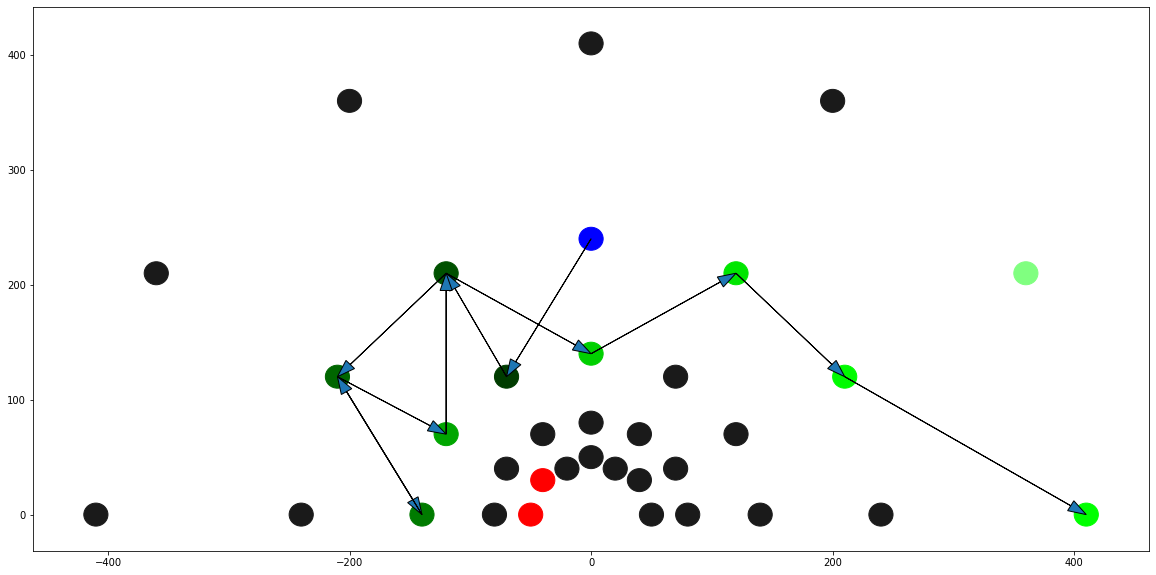

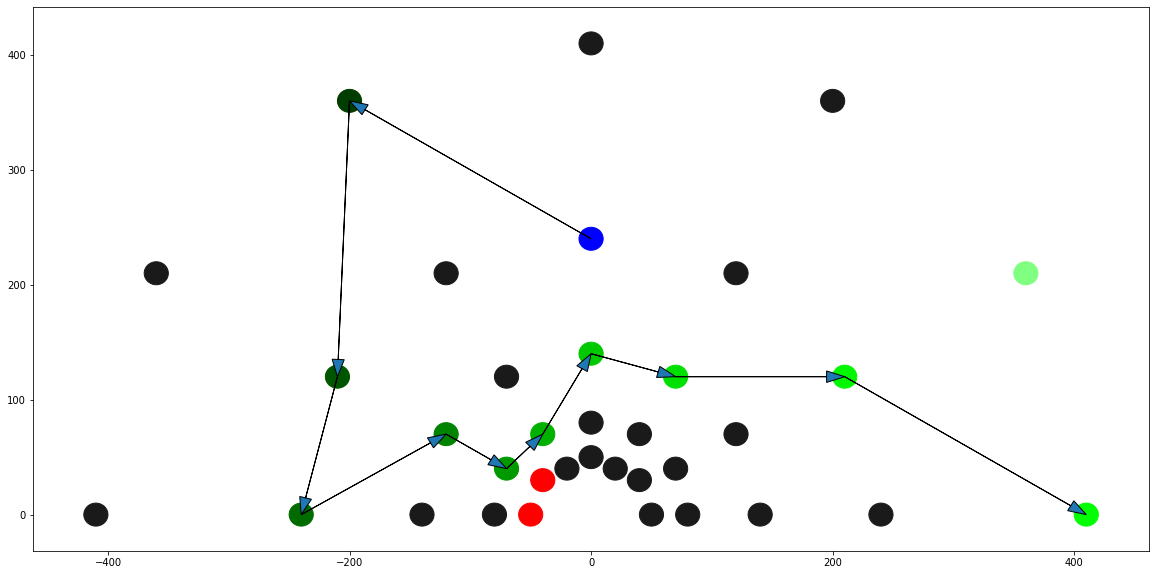

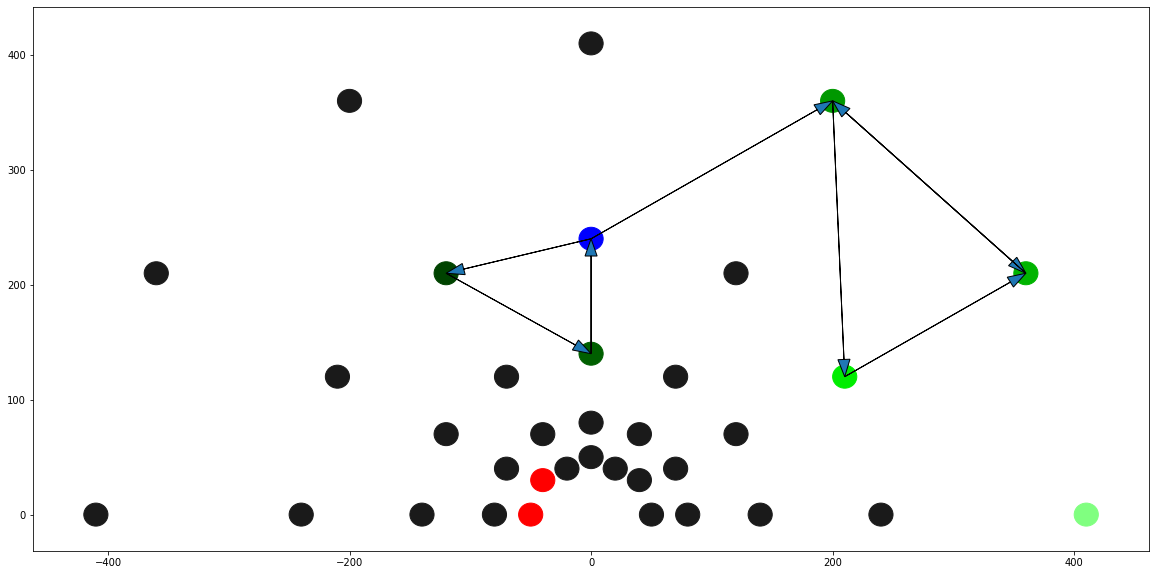

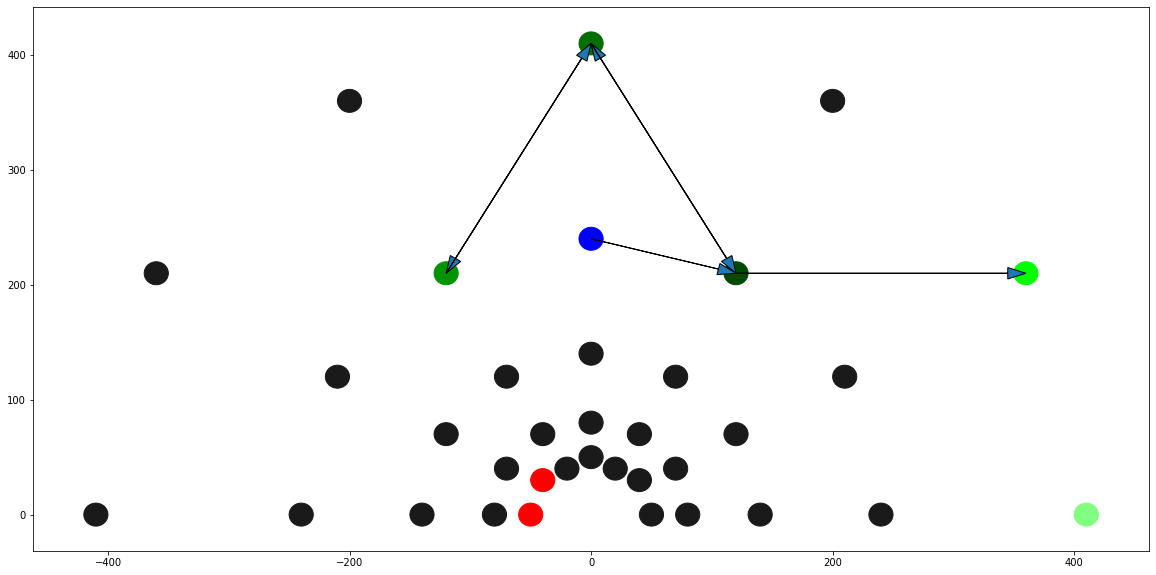

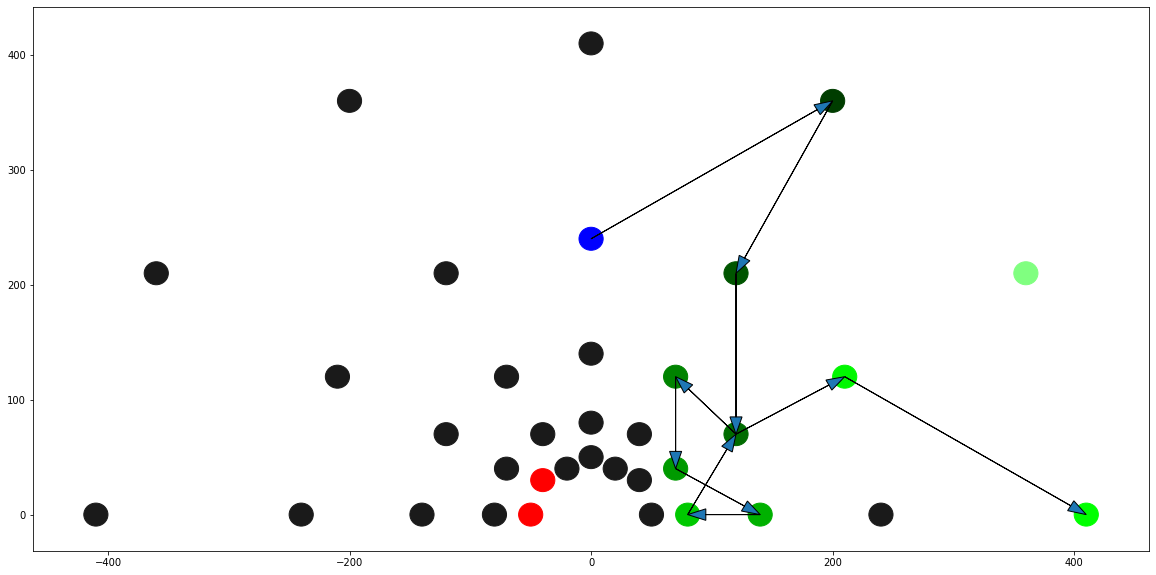

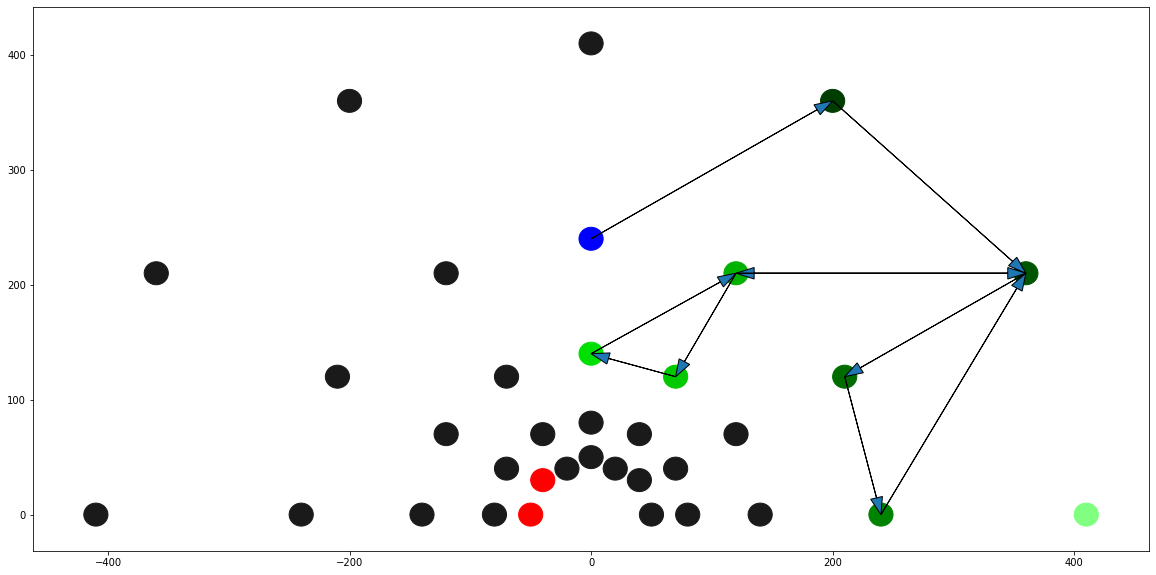

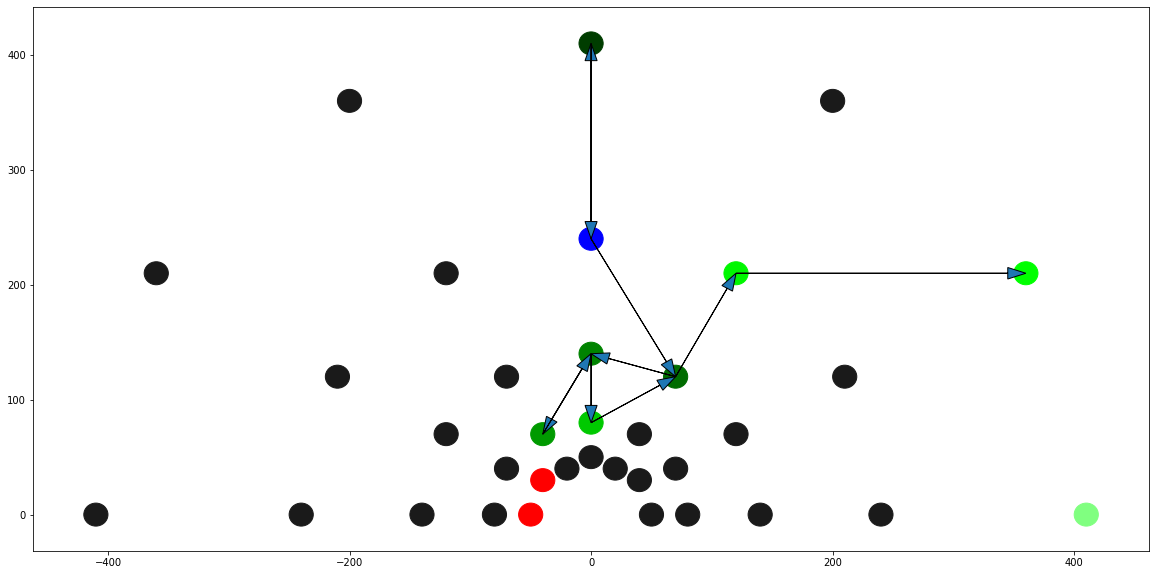

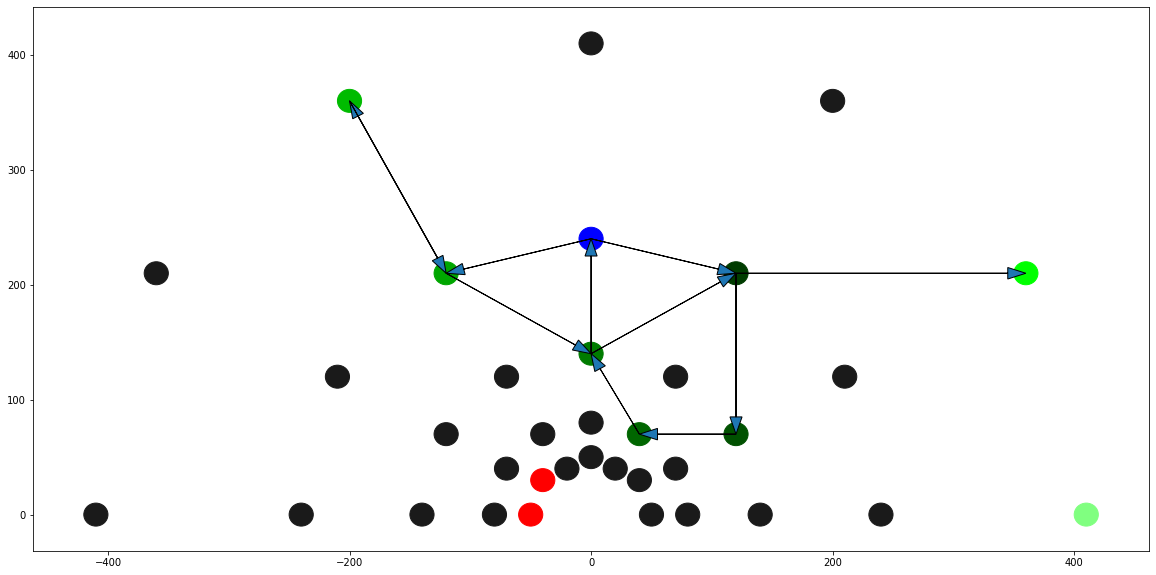

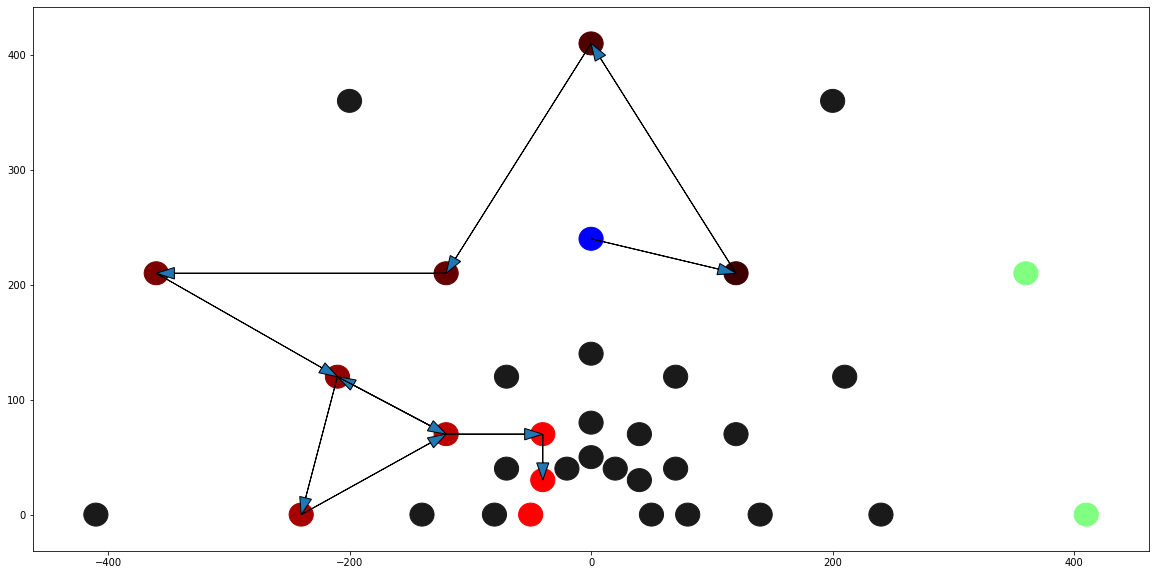

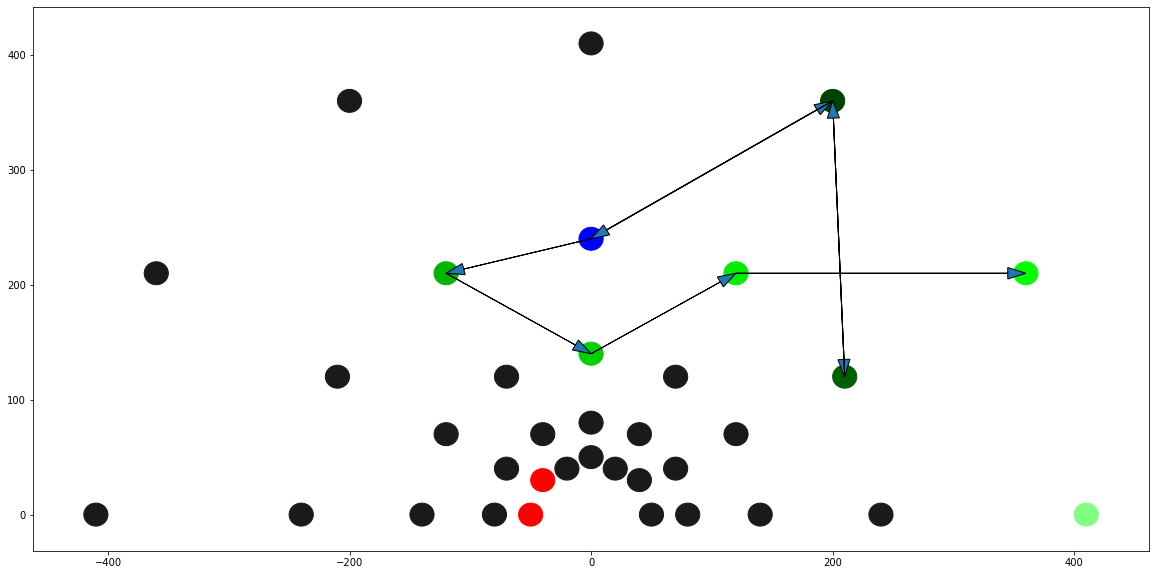

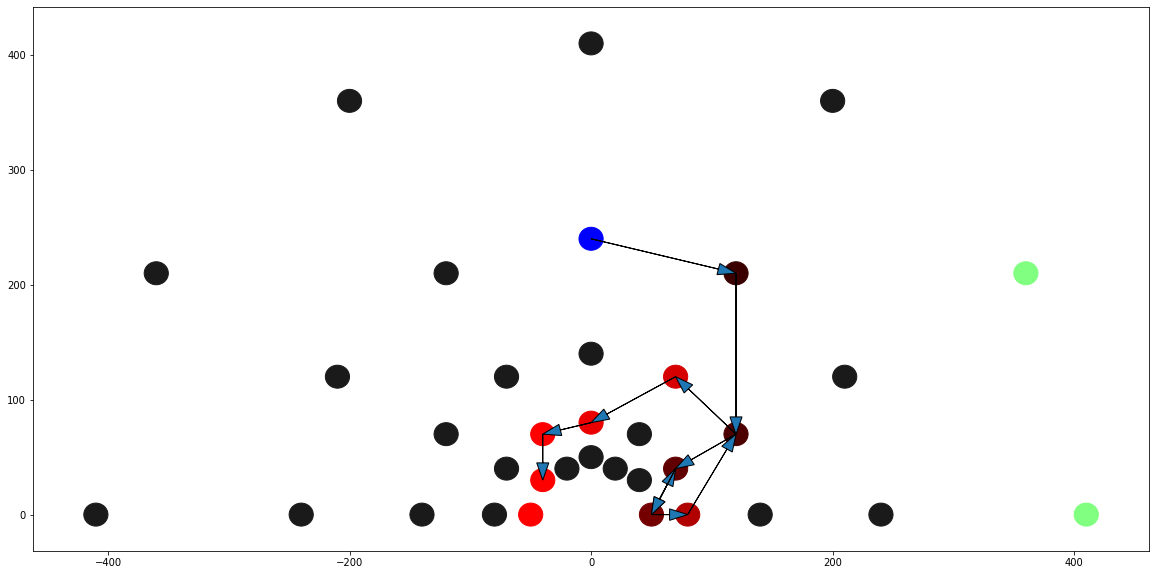

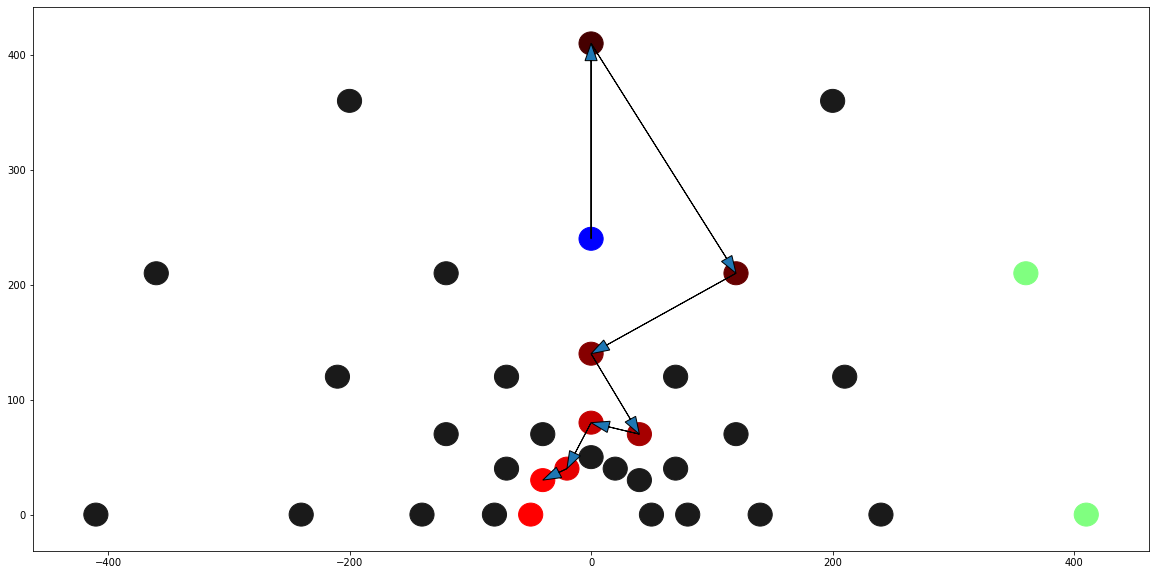

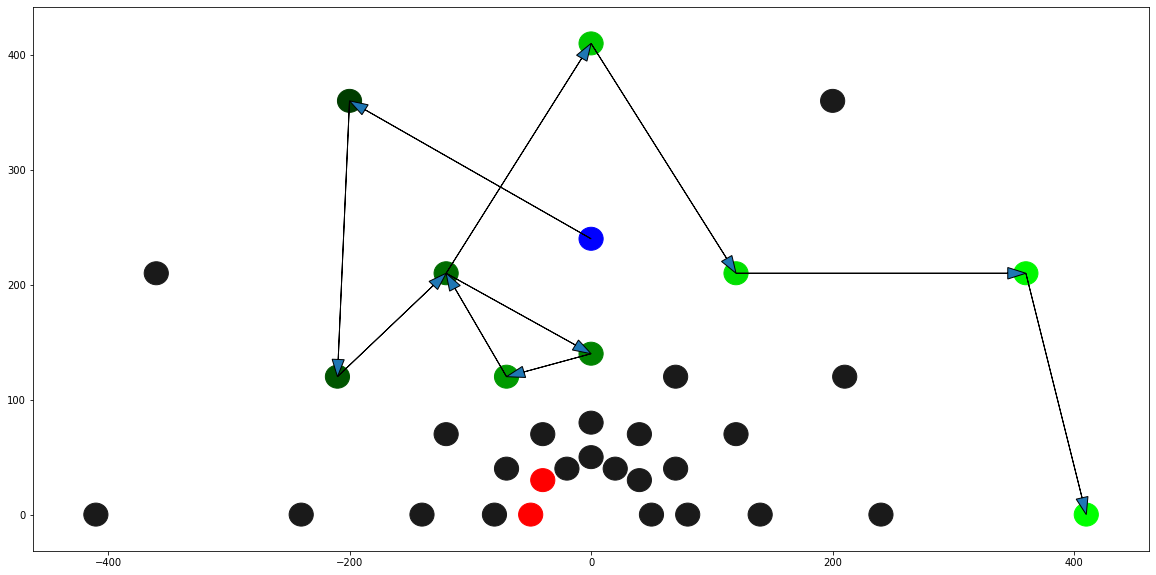

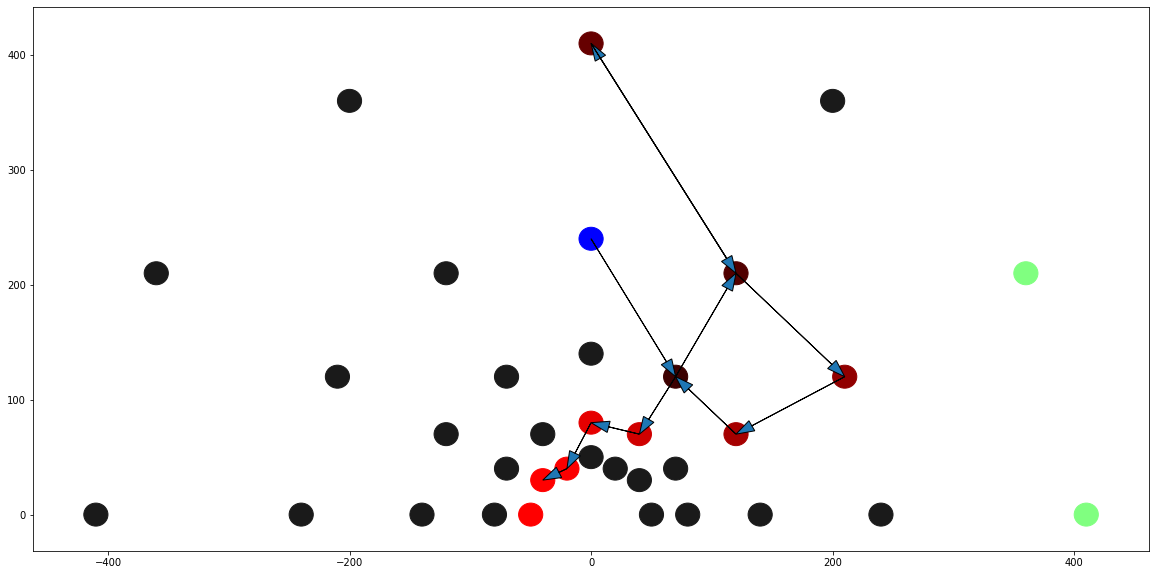

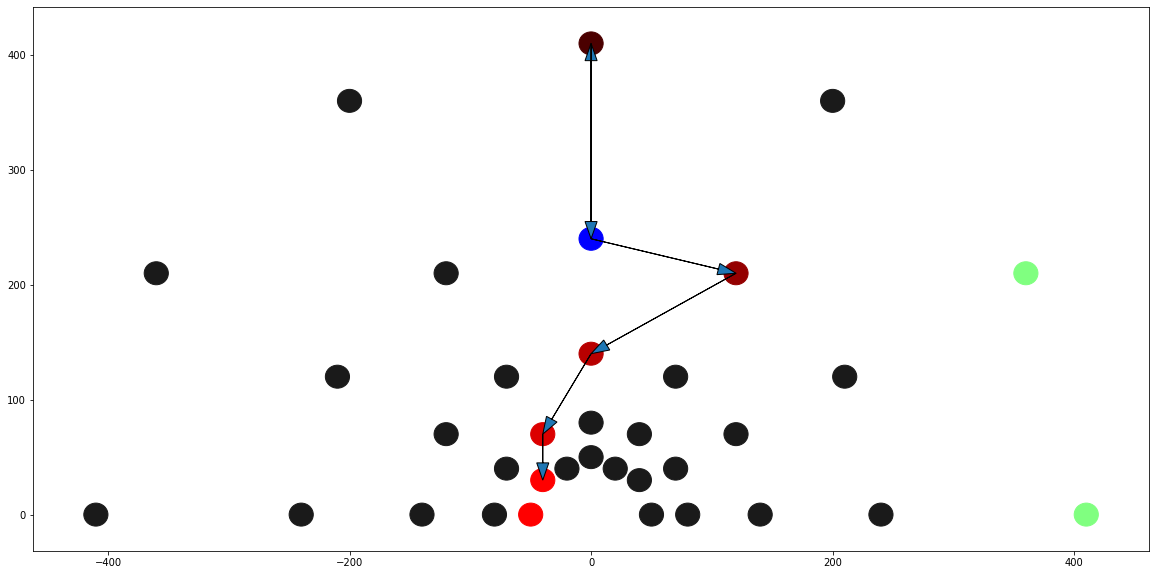

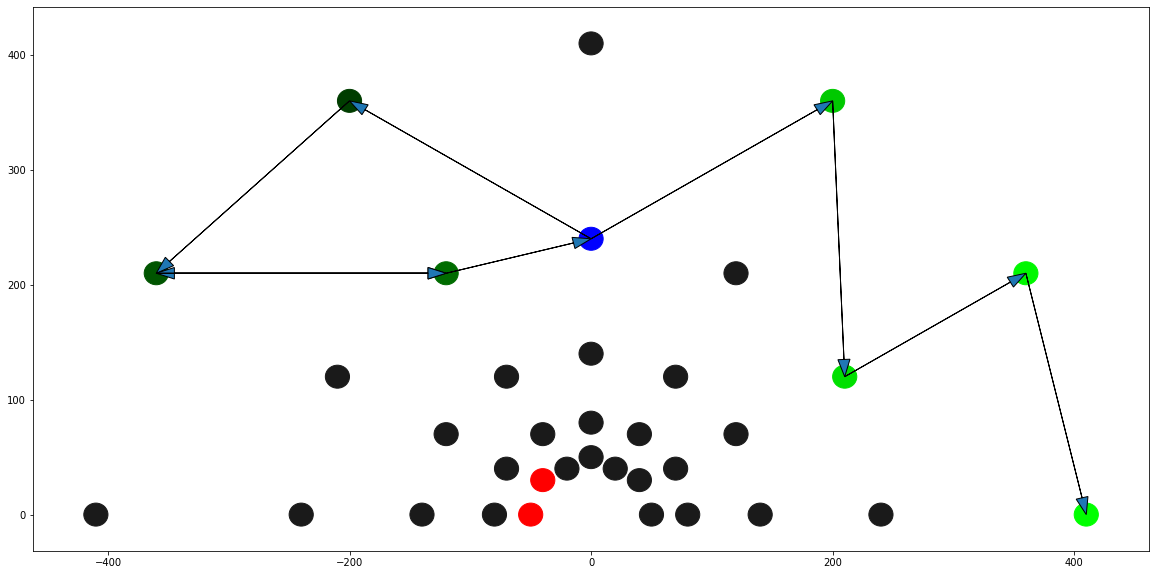

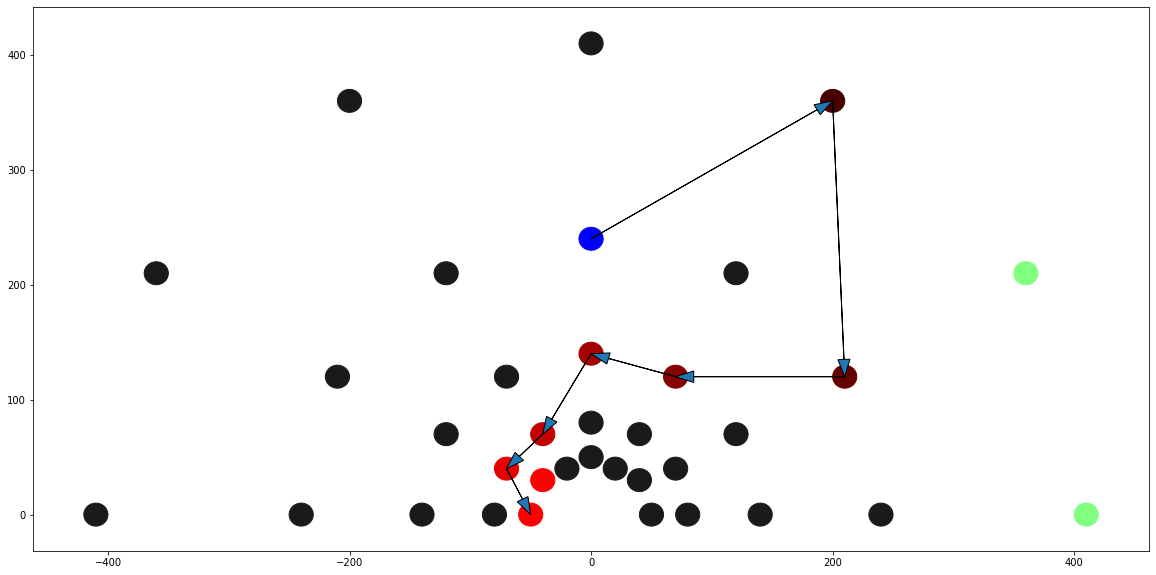

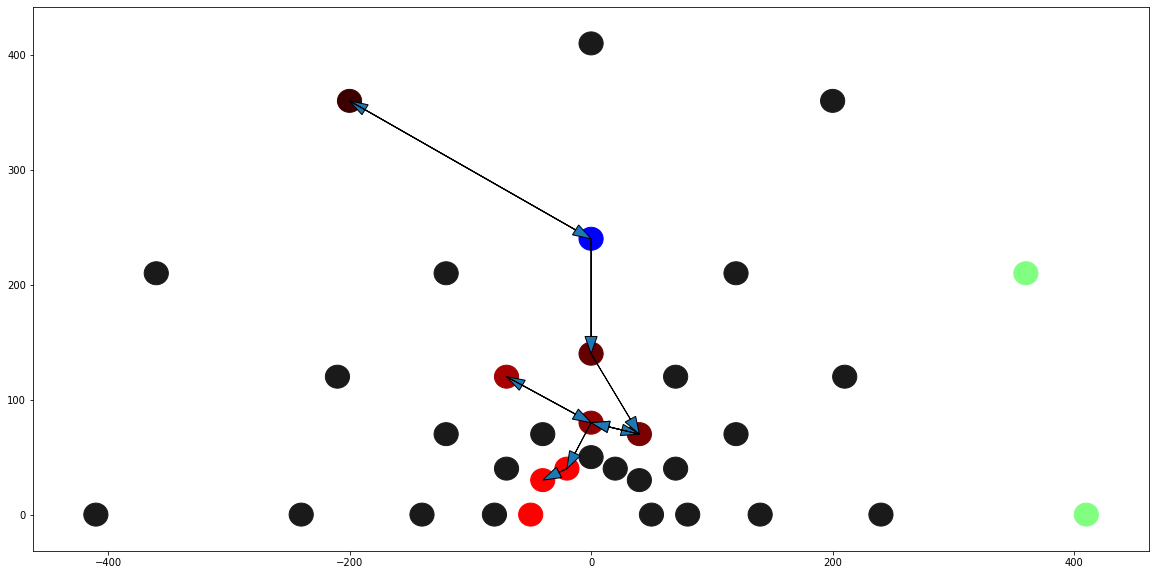

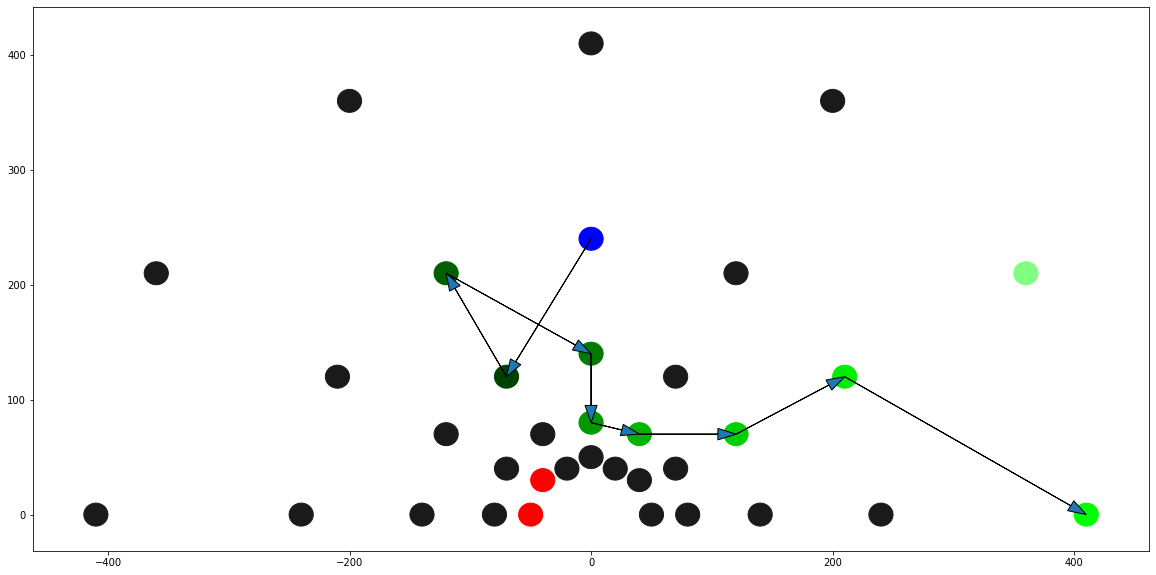

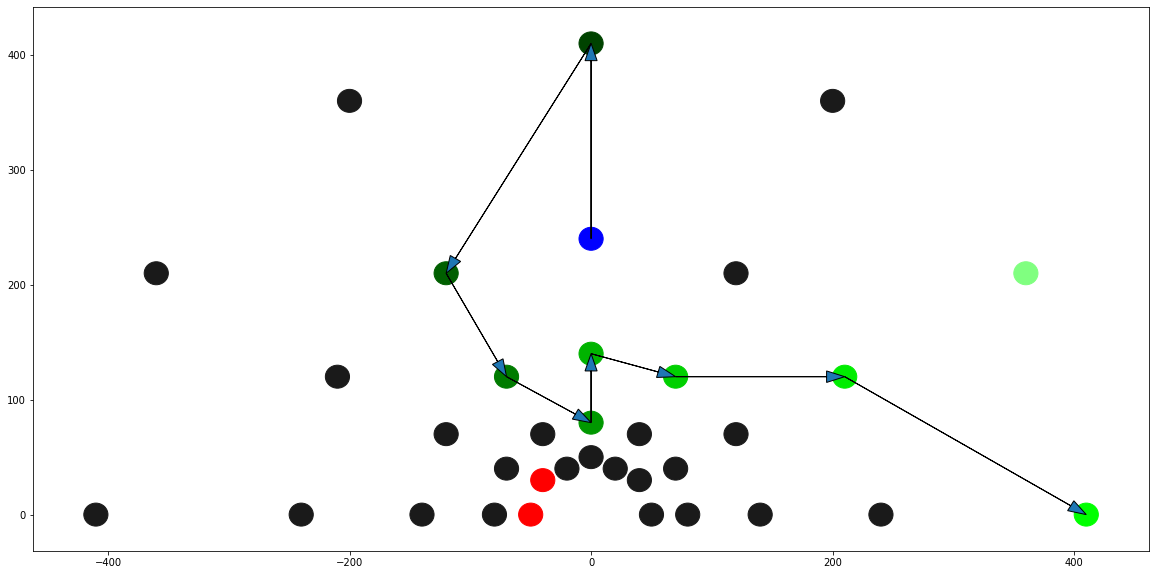

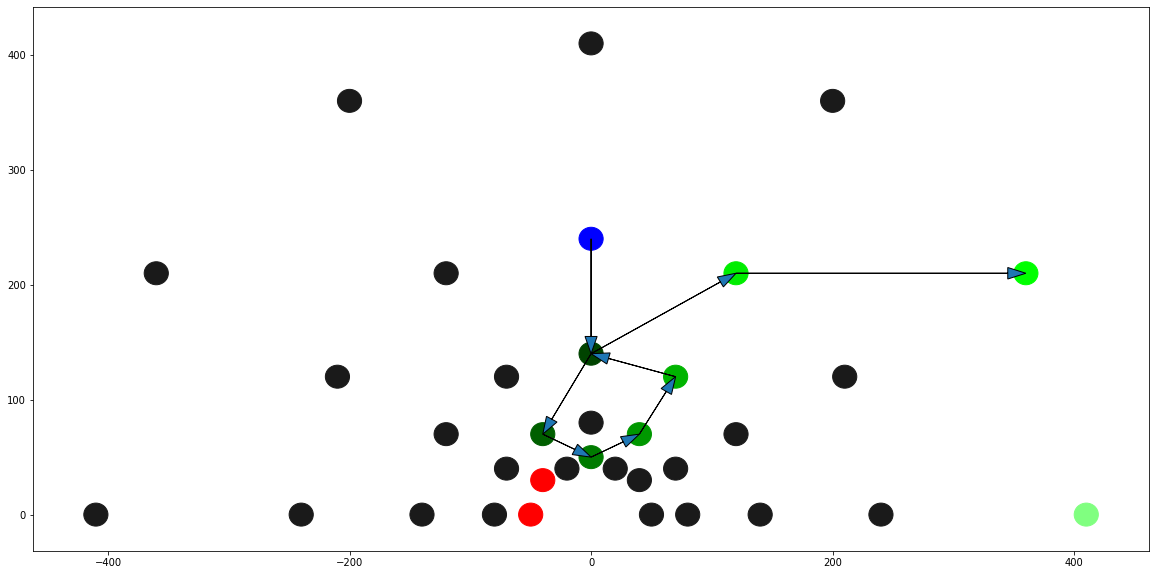

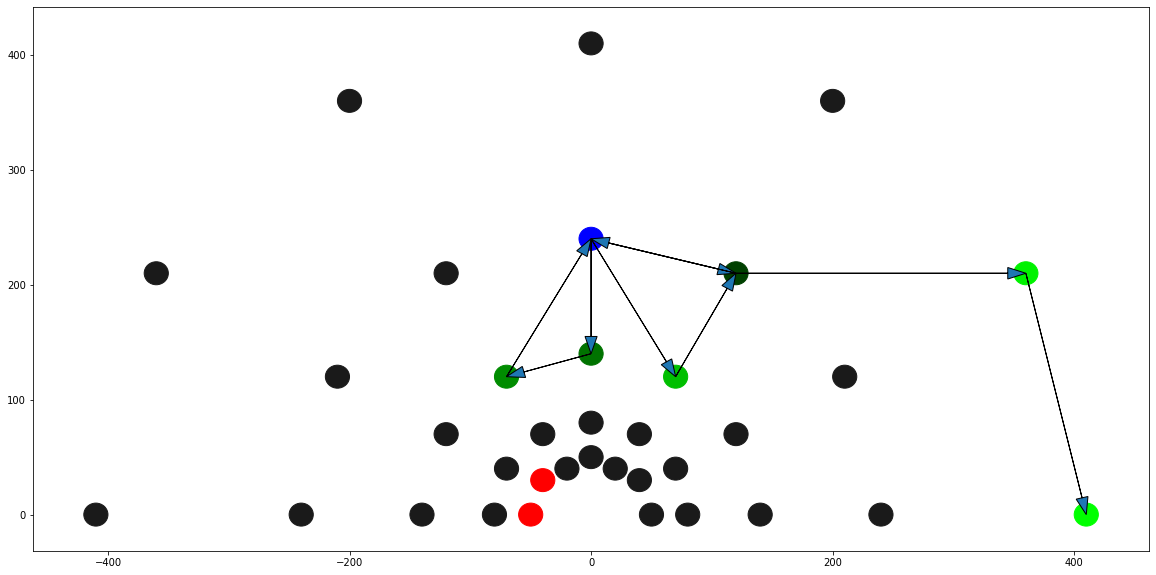

In [48]:
for i in arT:
    plotTrajectoire(i)

D:\Dev\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


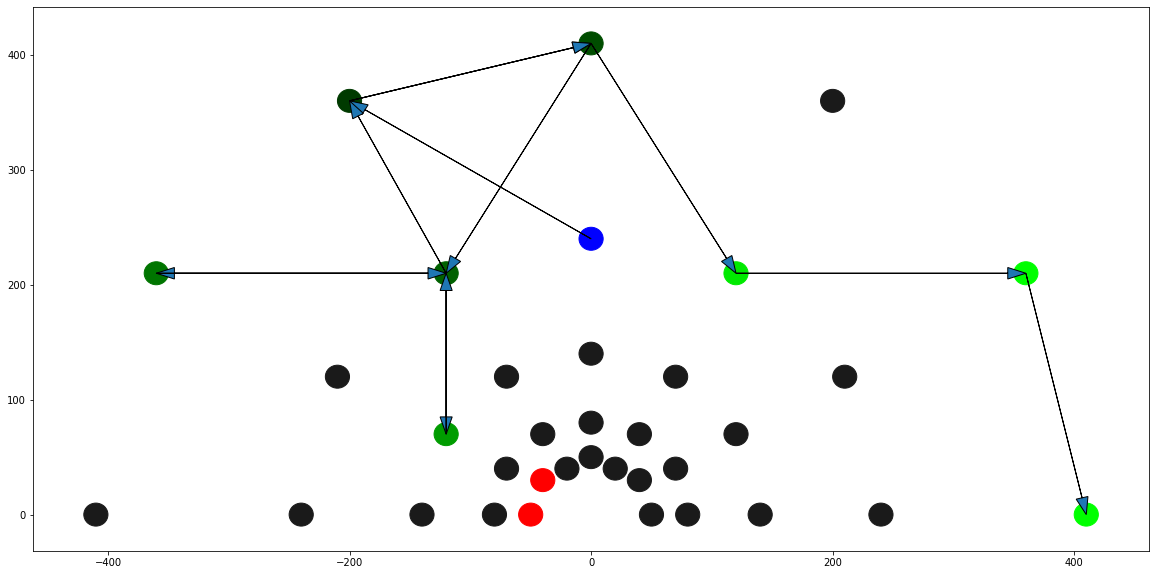

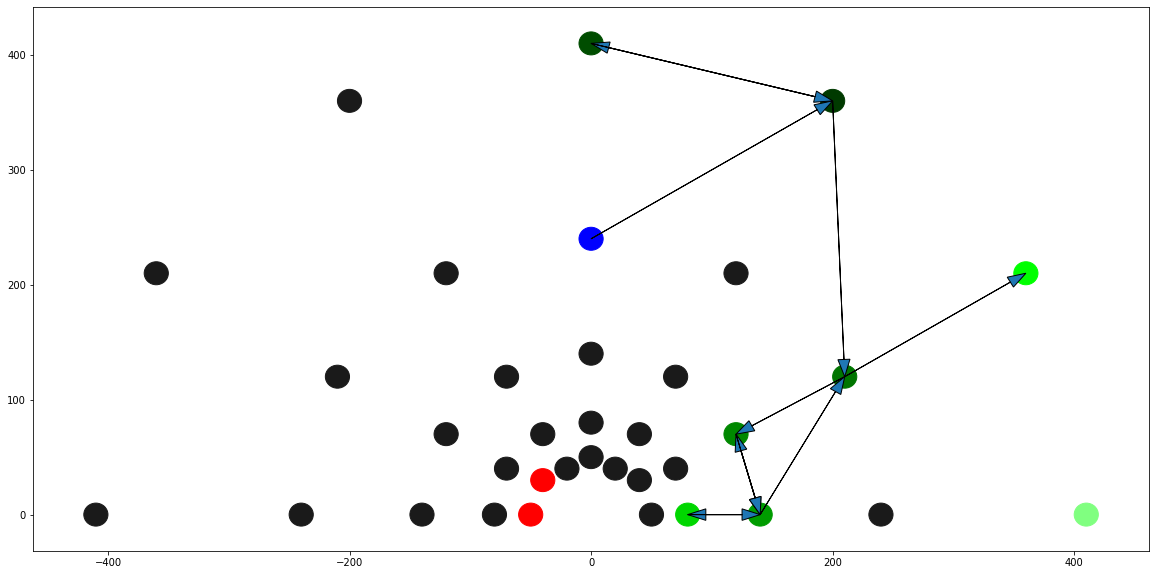

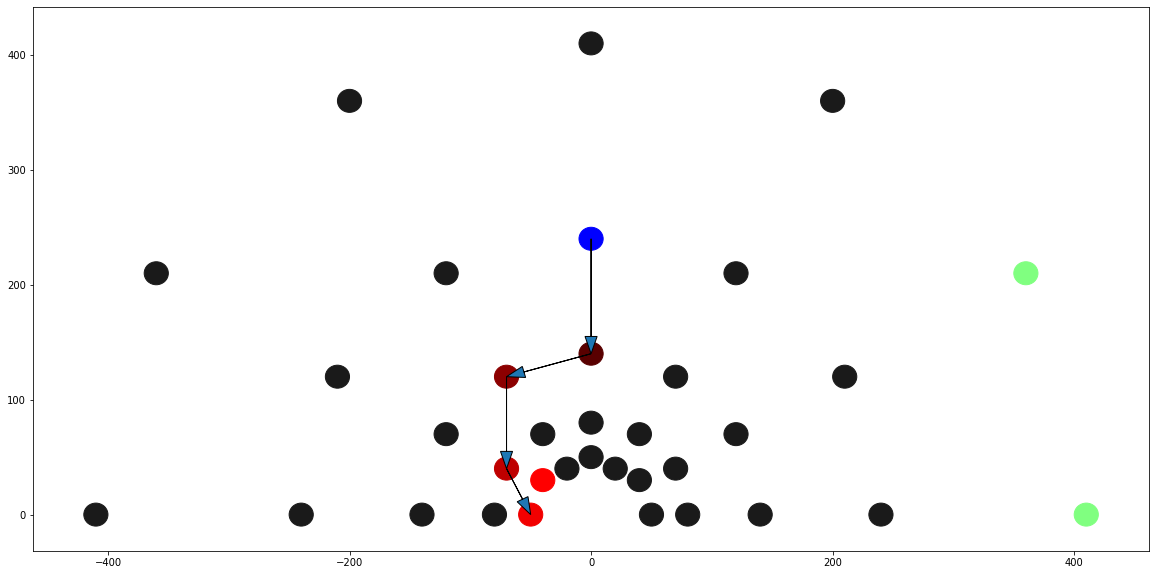

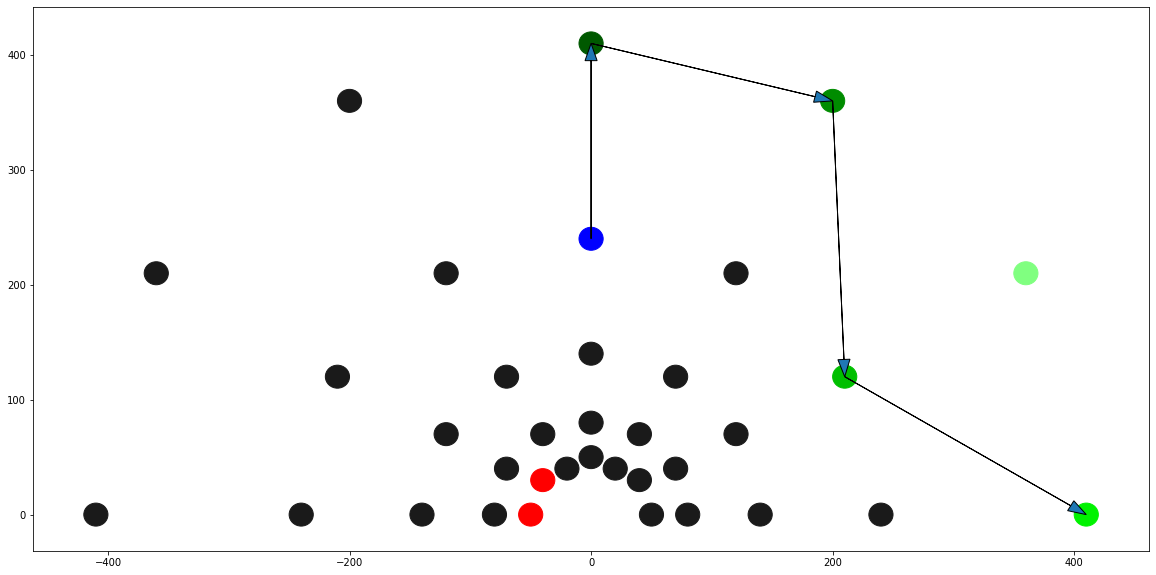

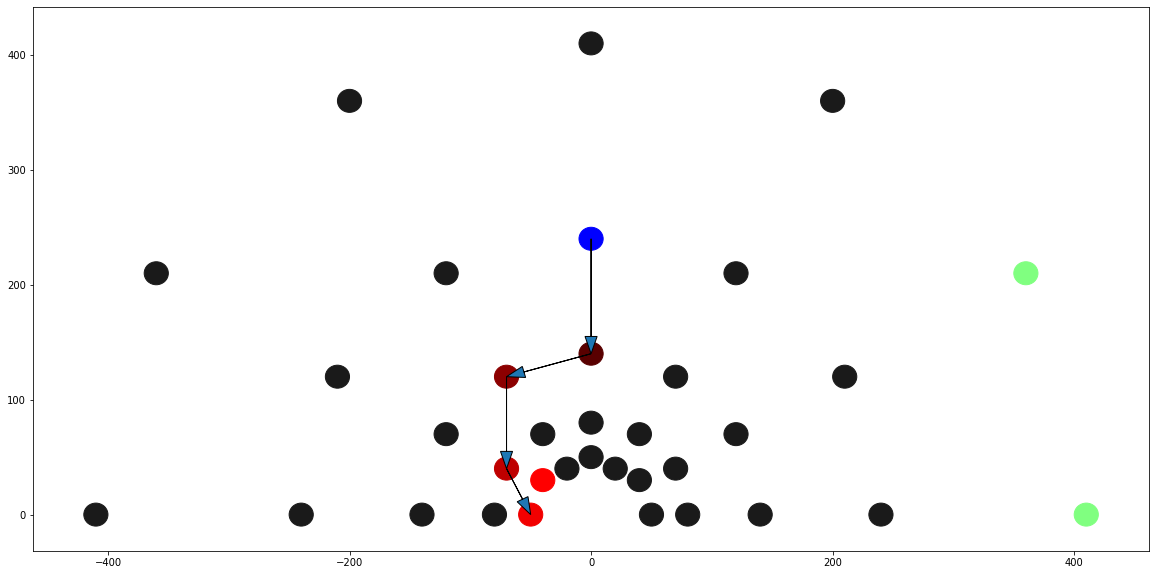

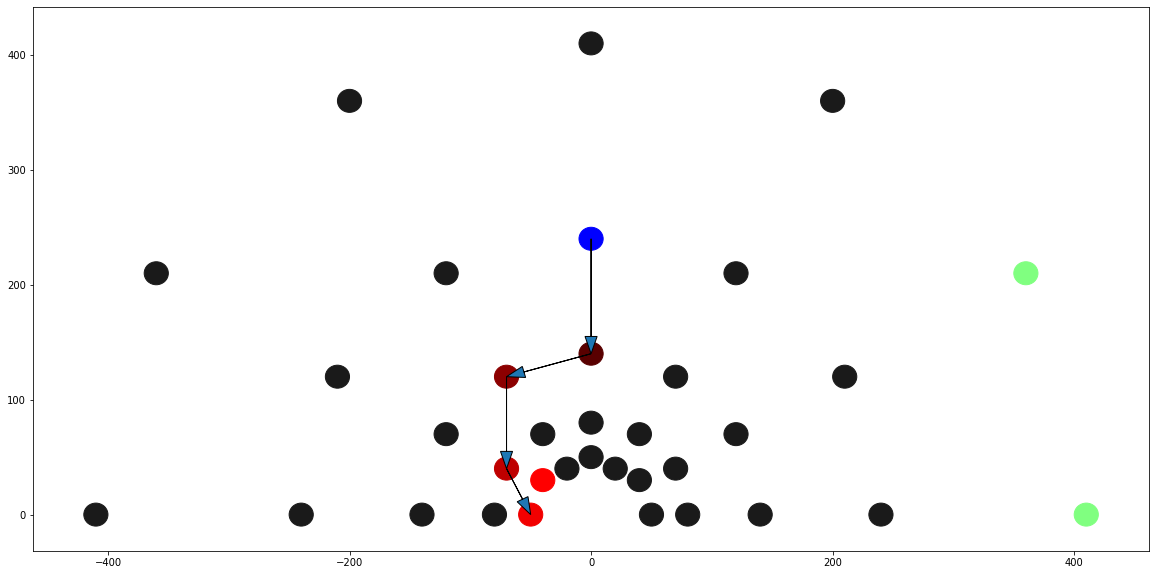

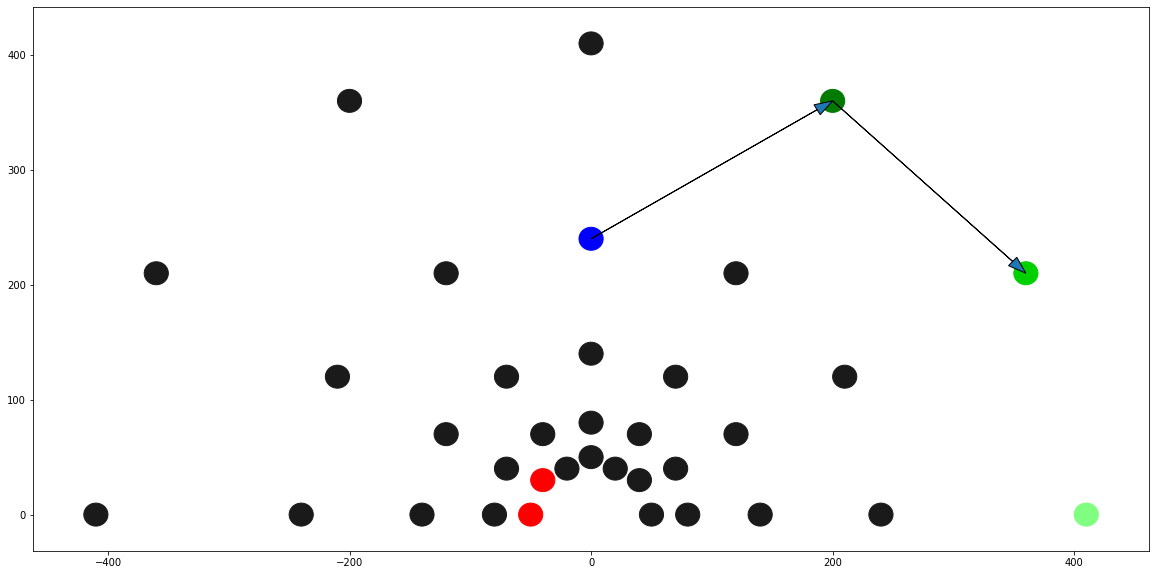

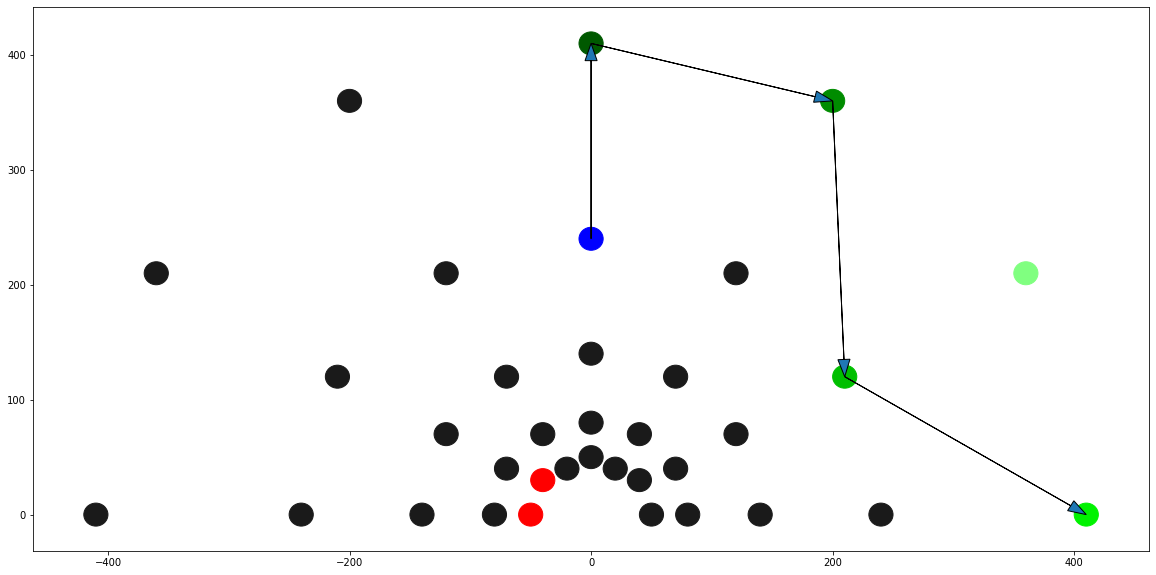

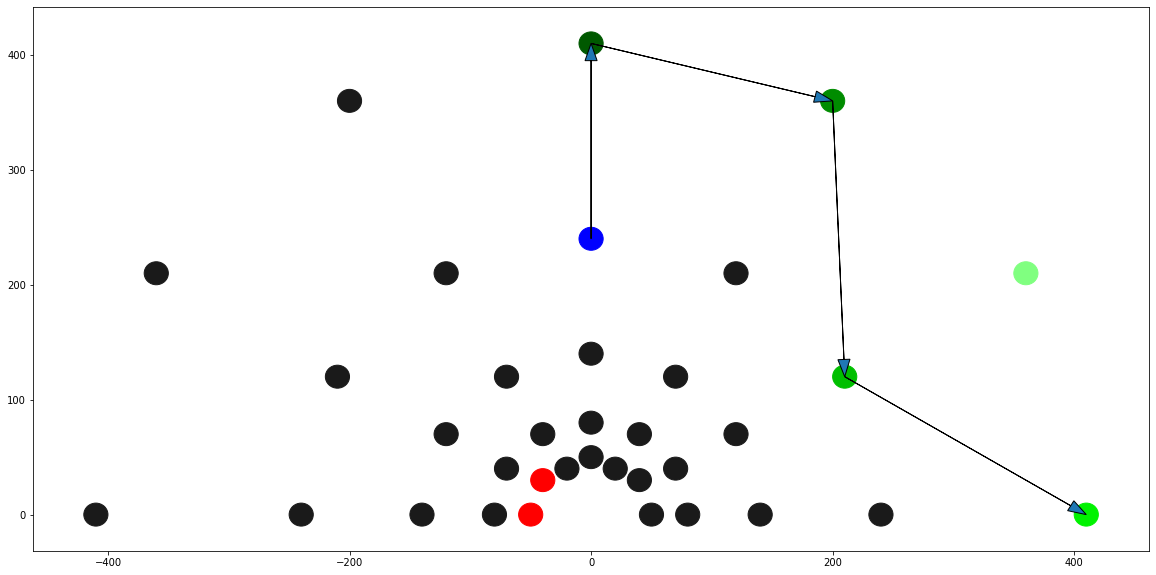

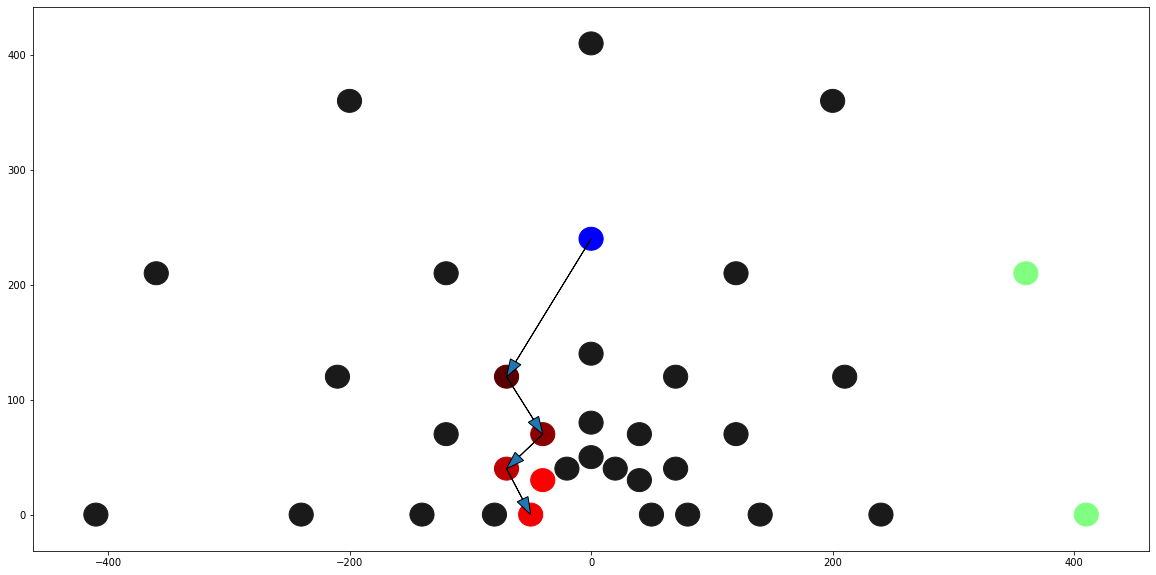

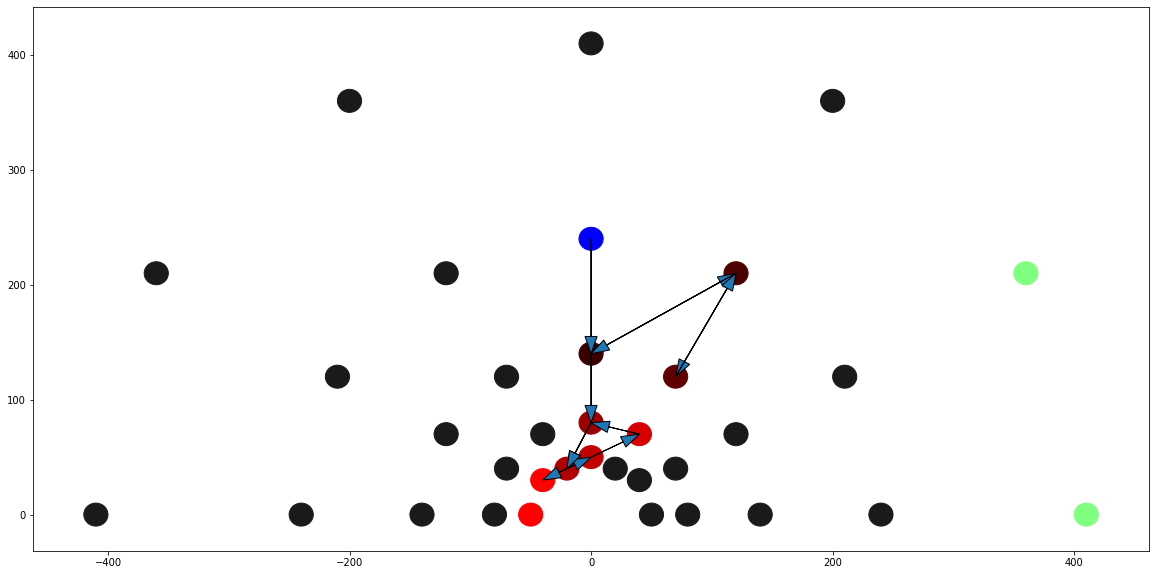

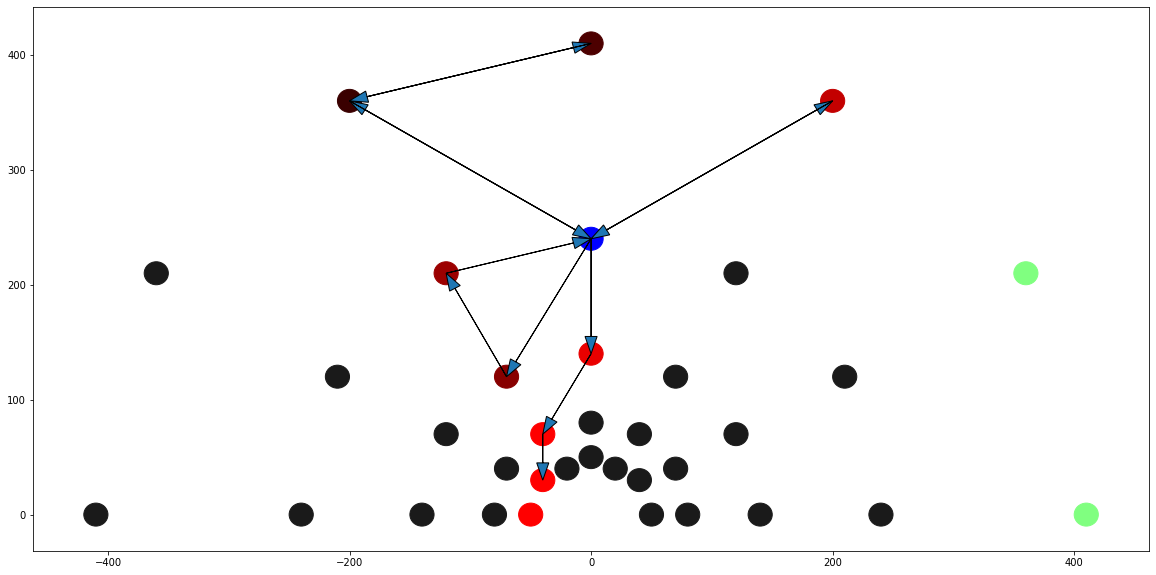

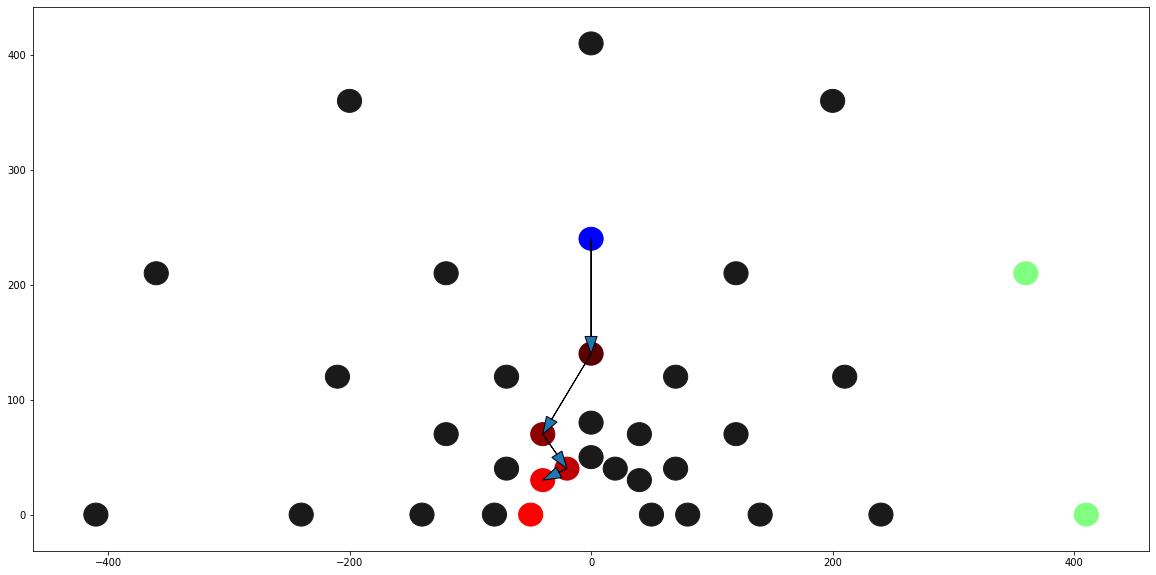

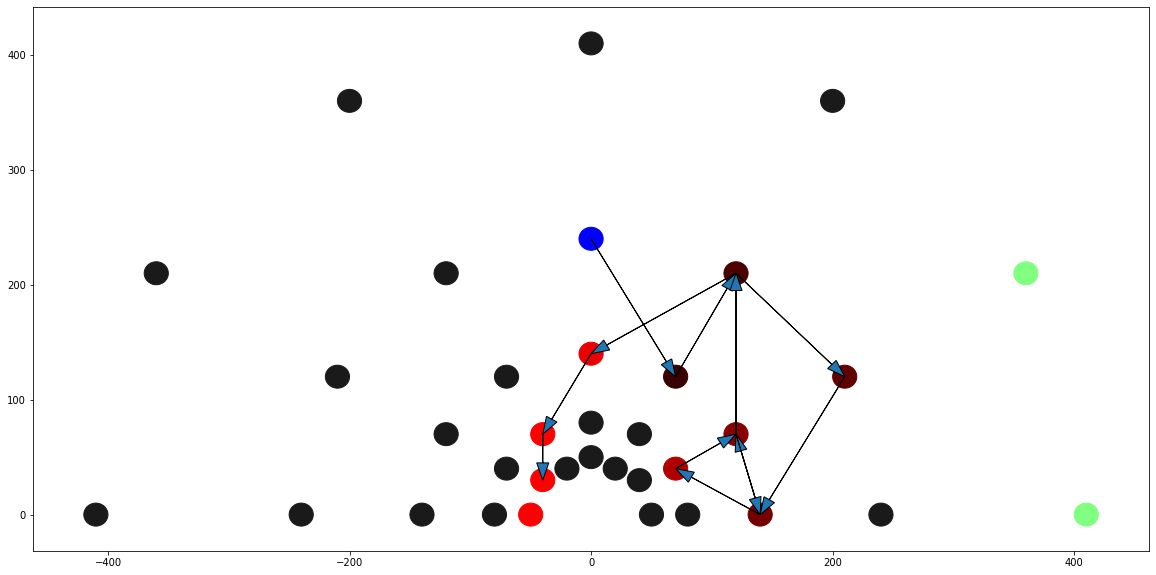

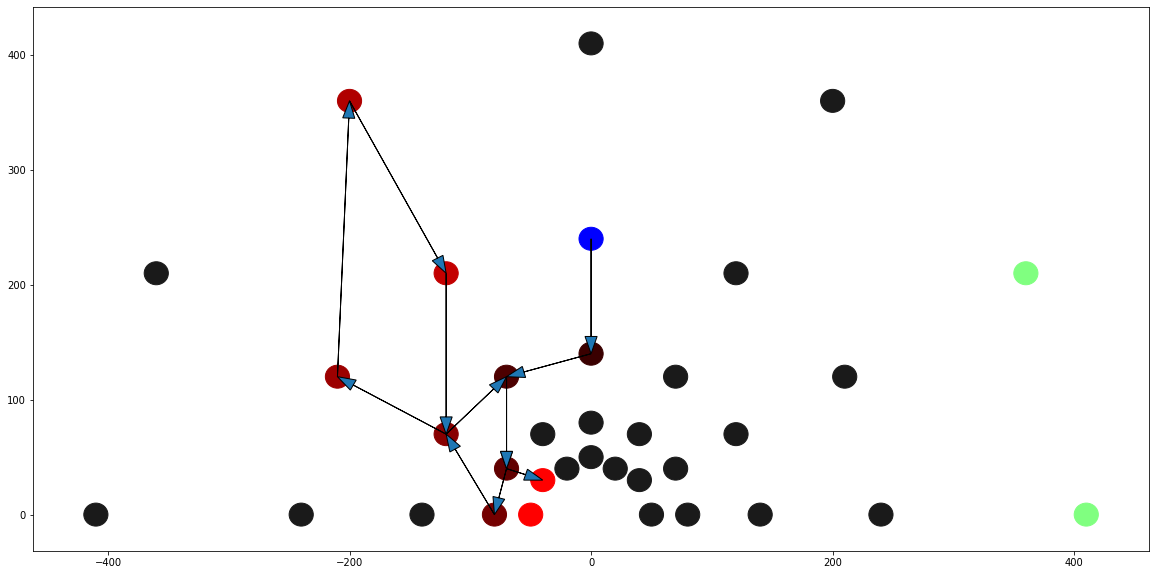

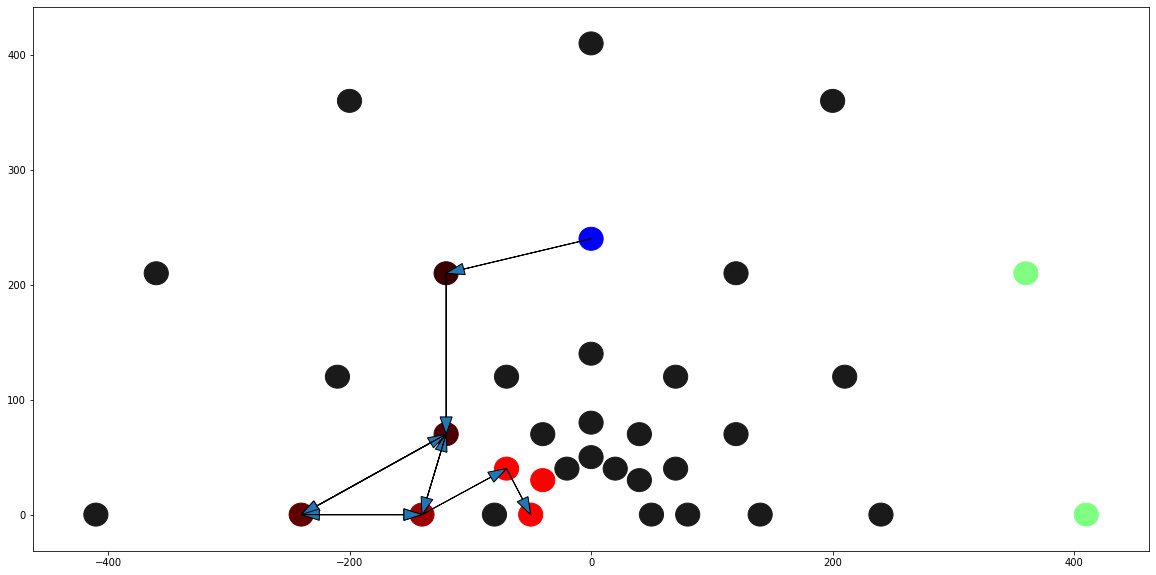

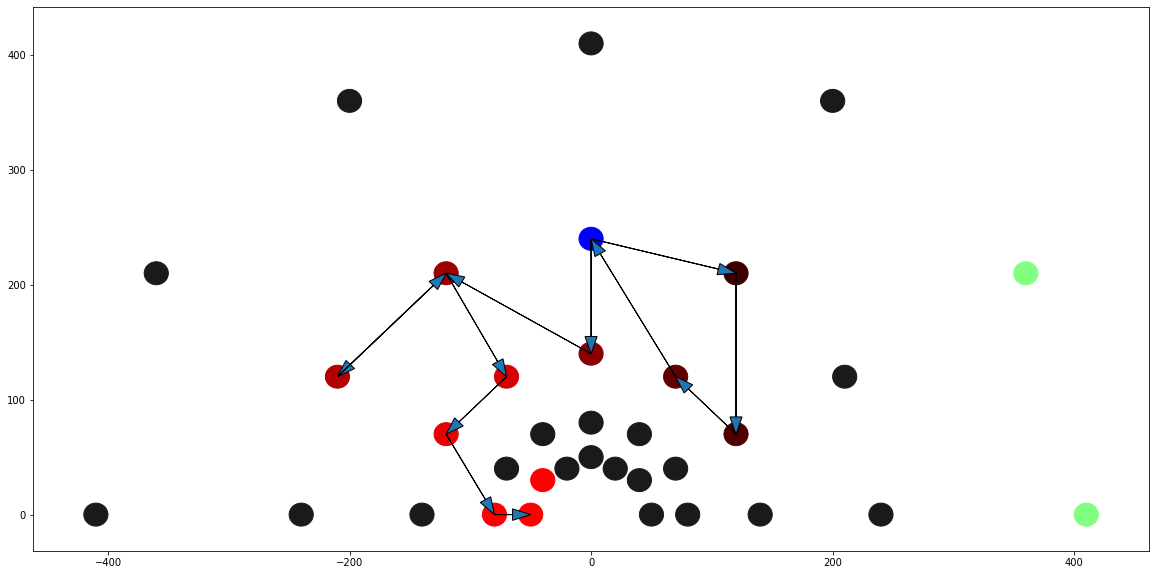

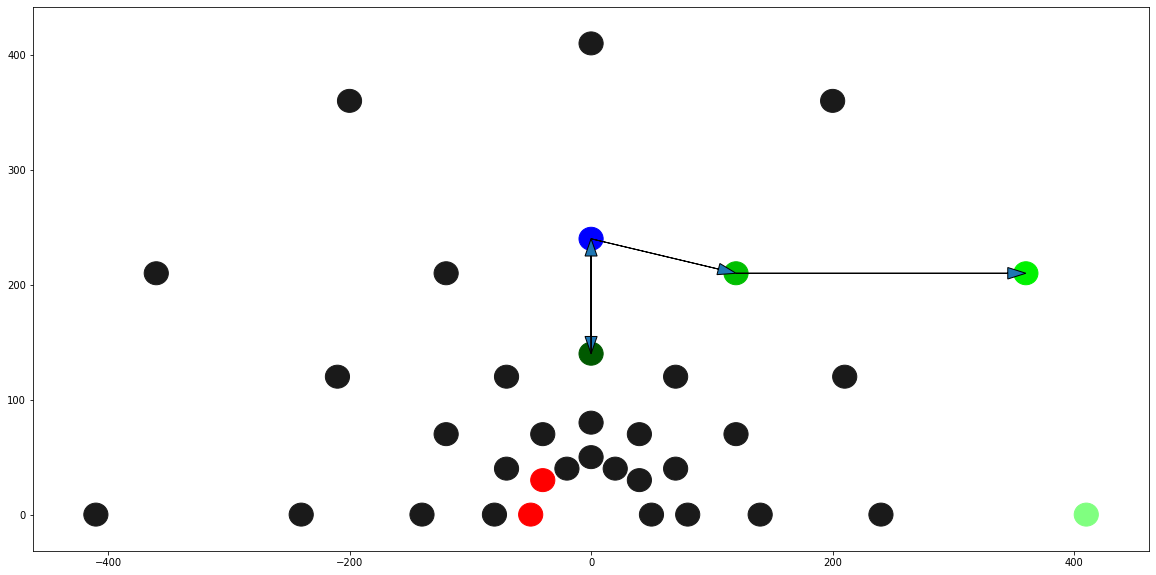

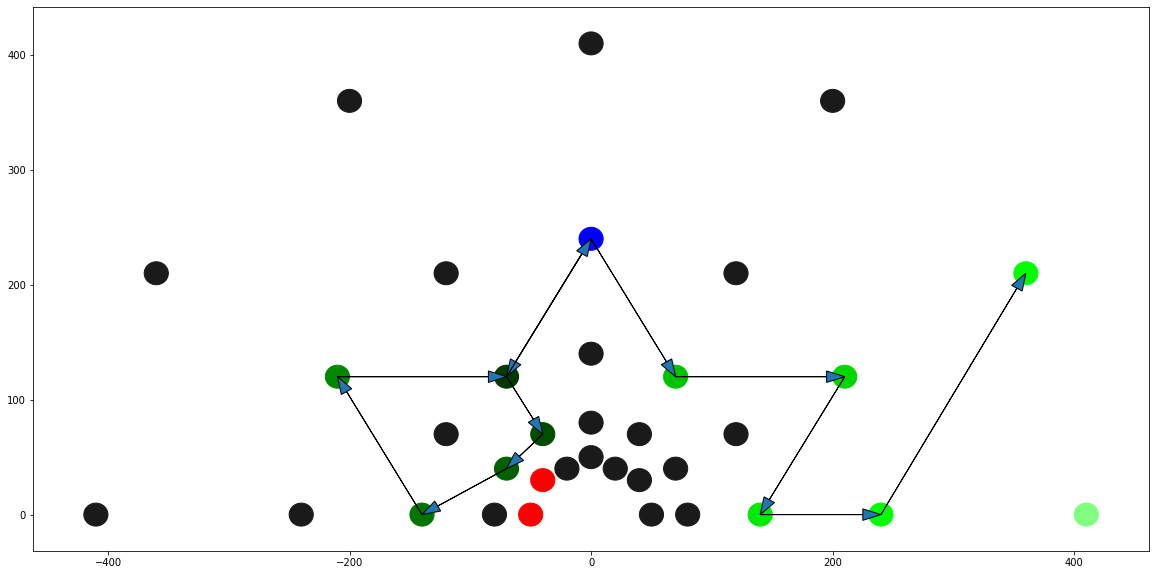

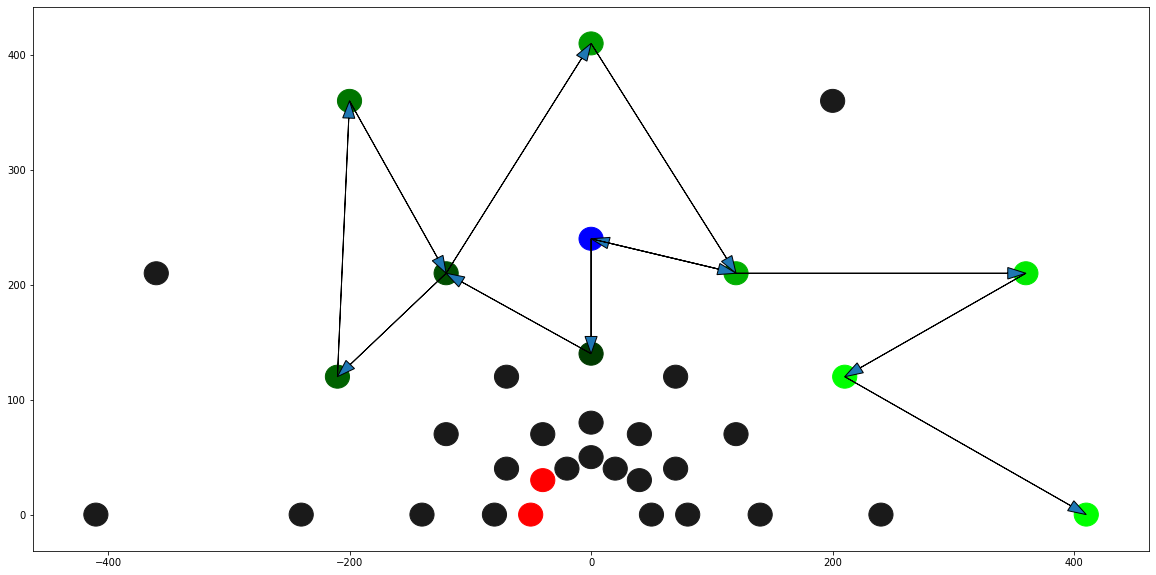

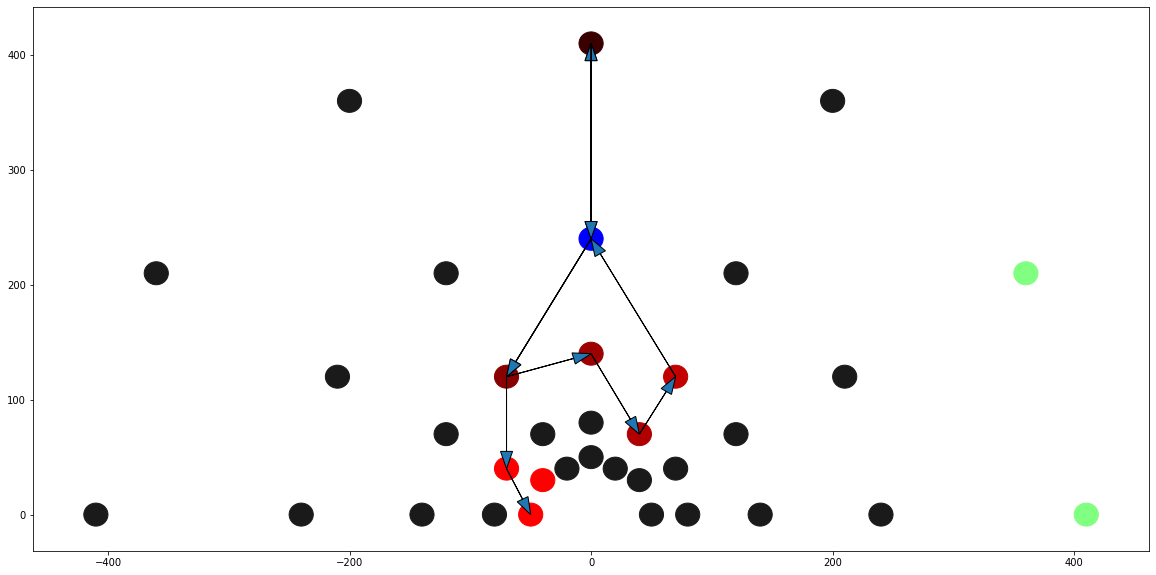

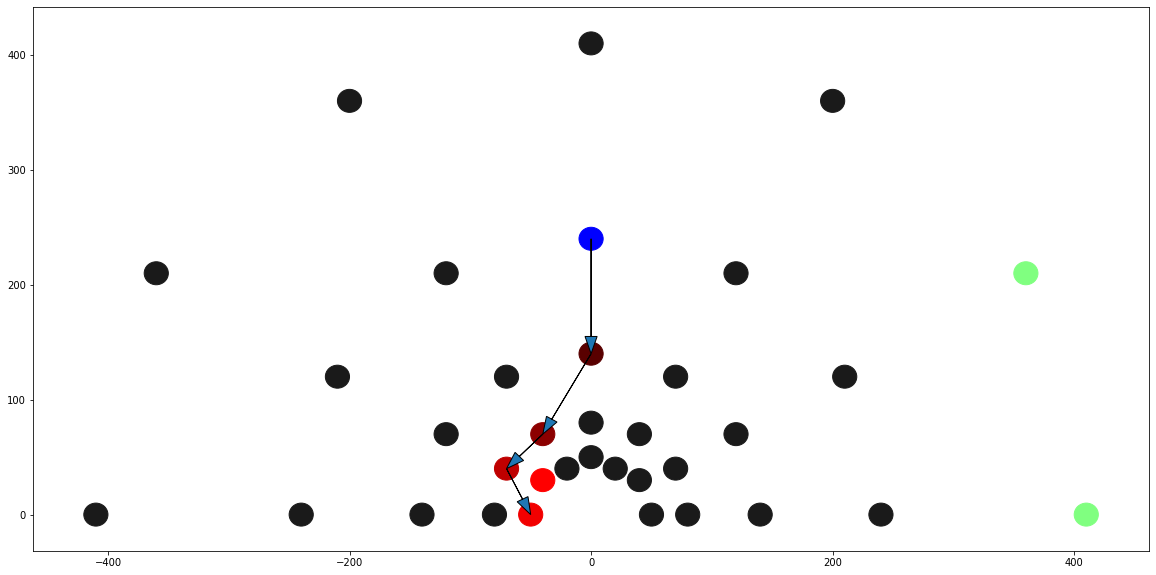

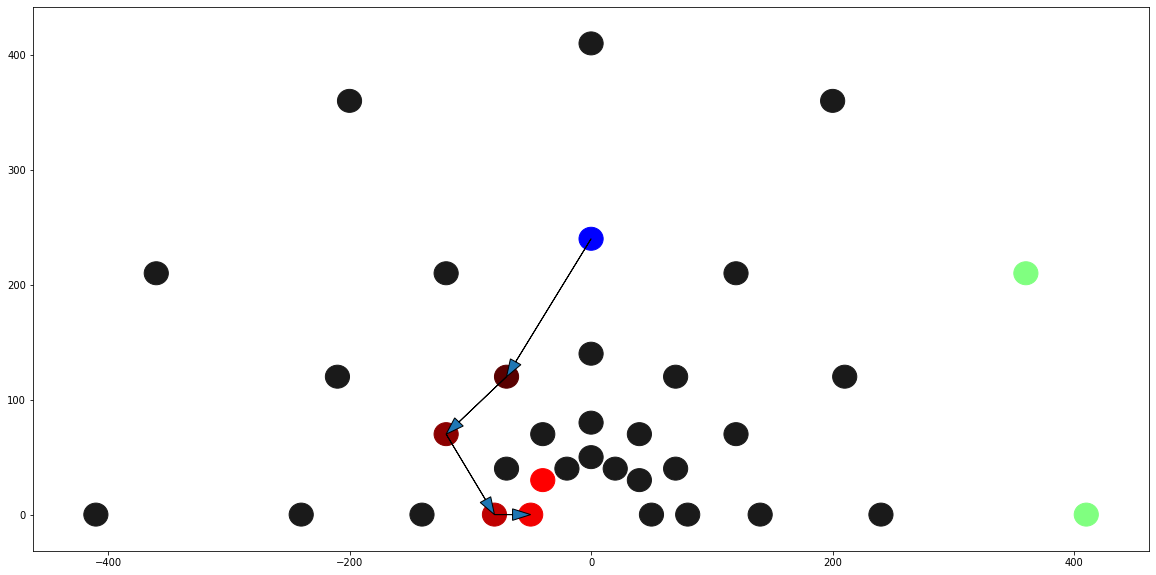

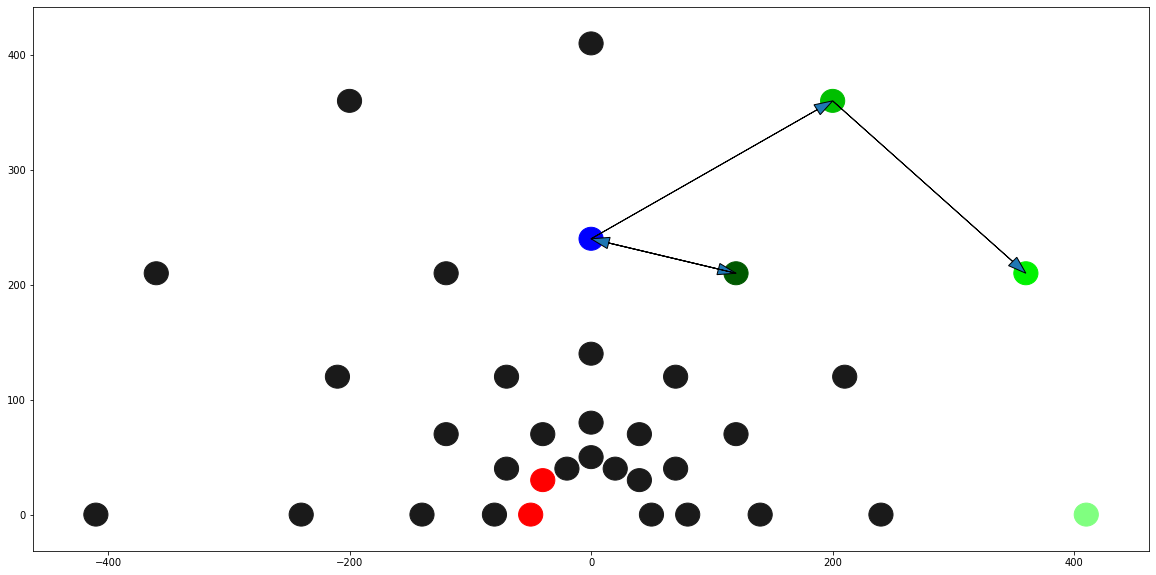

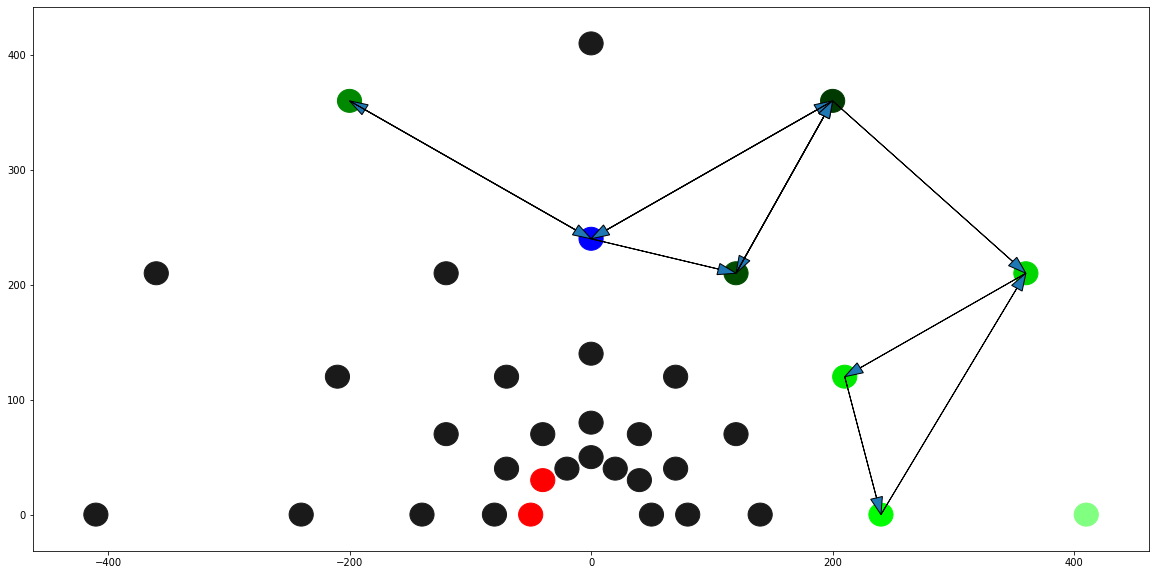

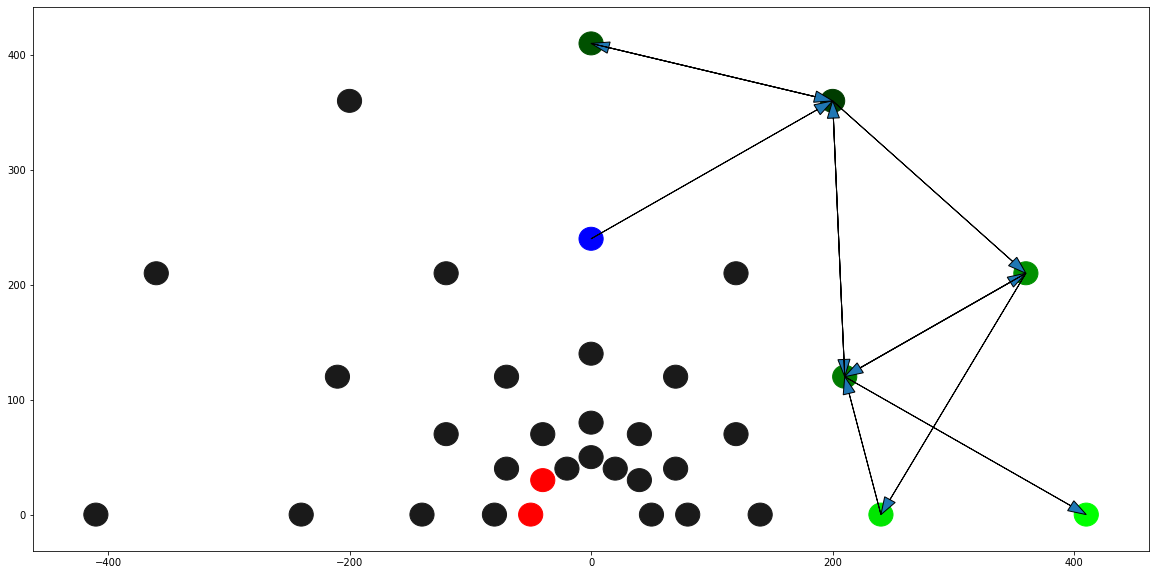

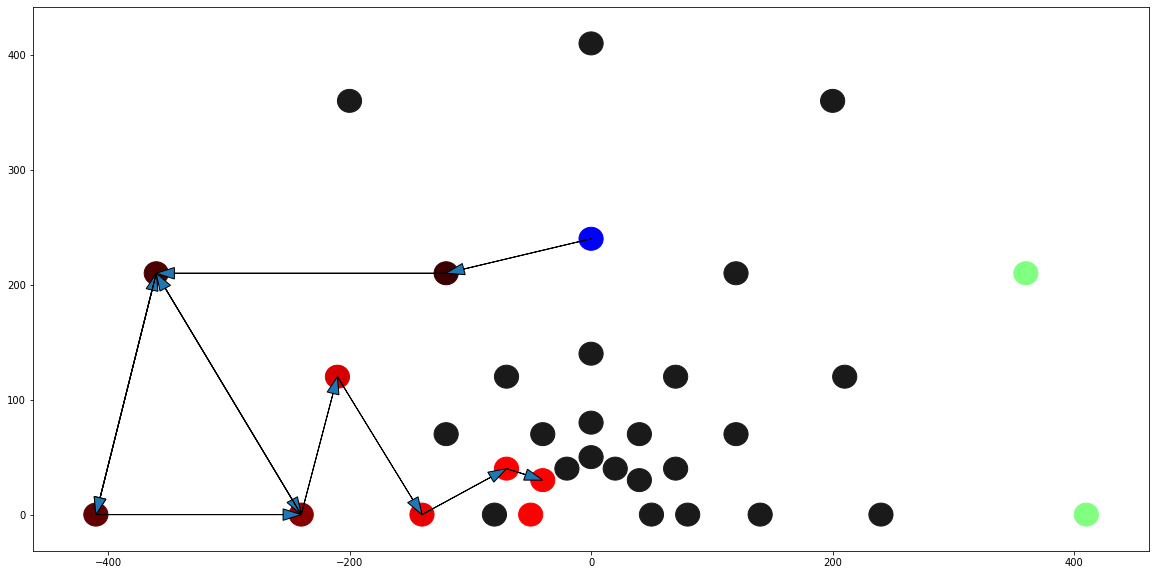

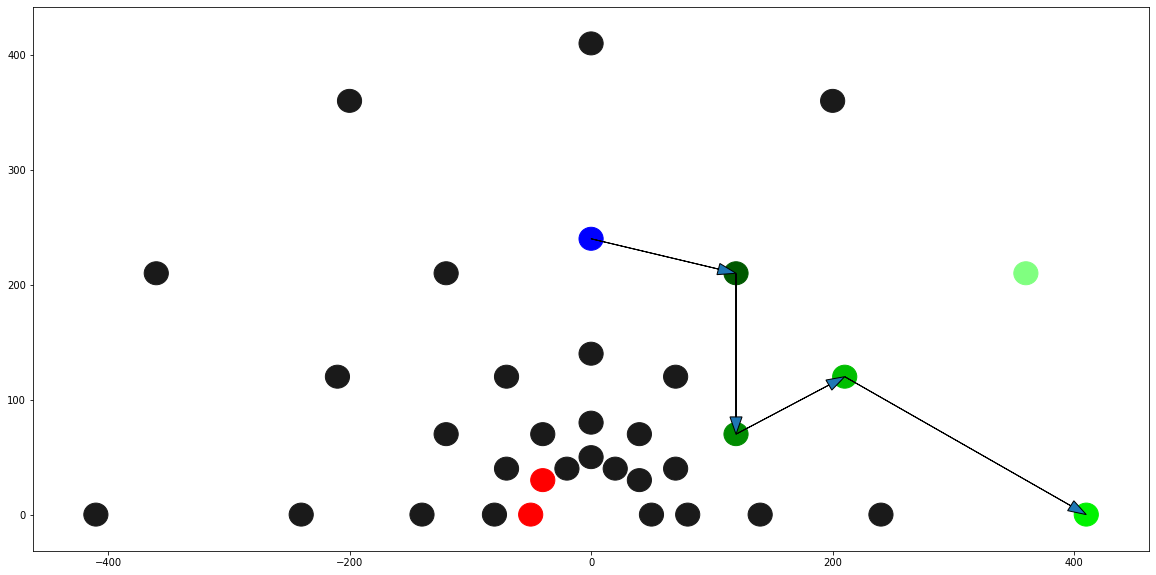

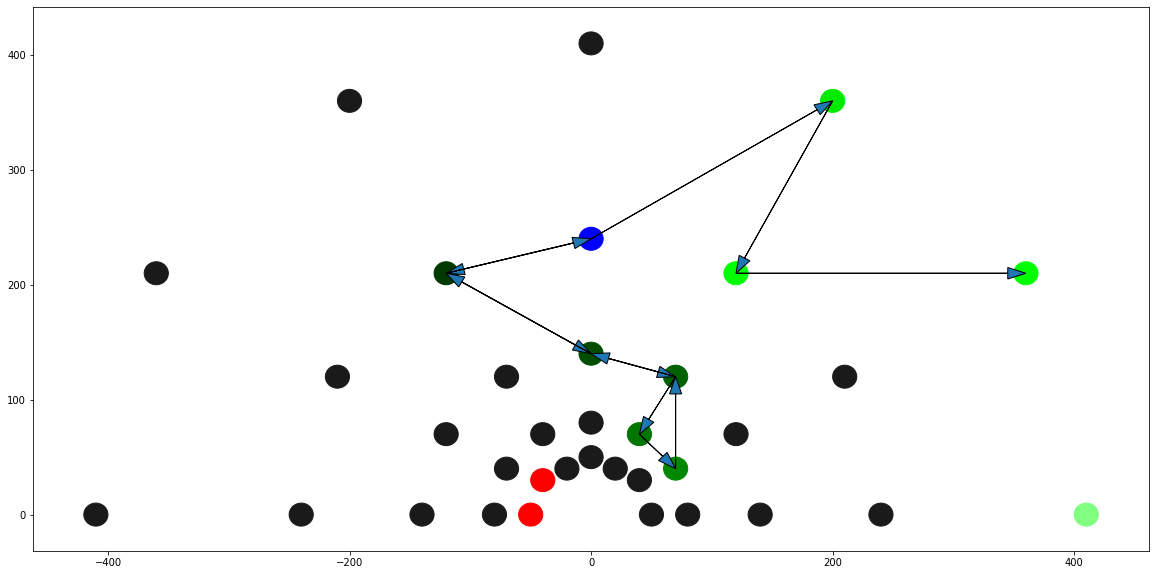

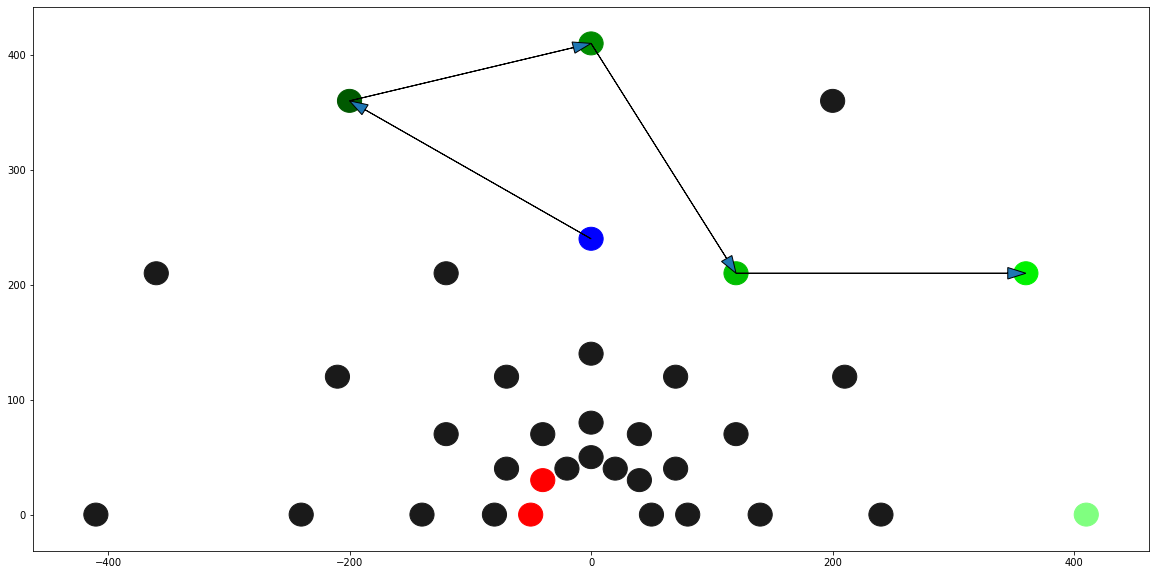

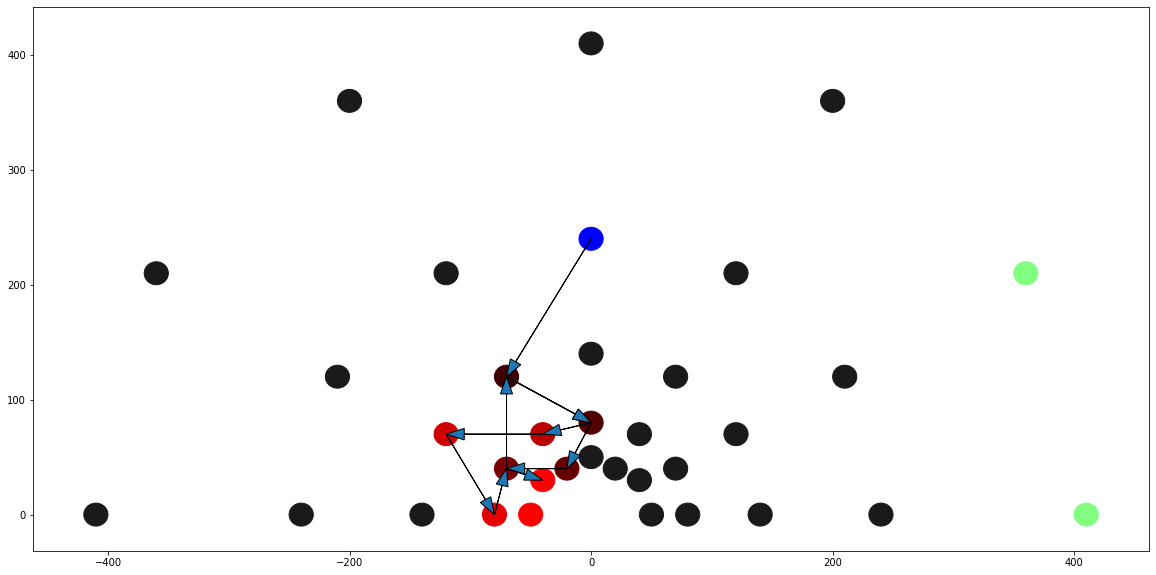

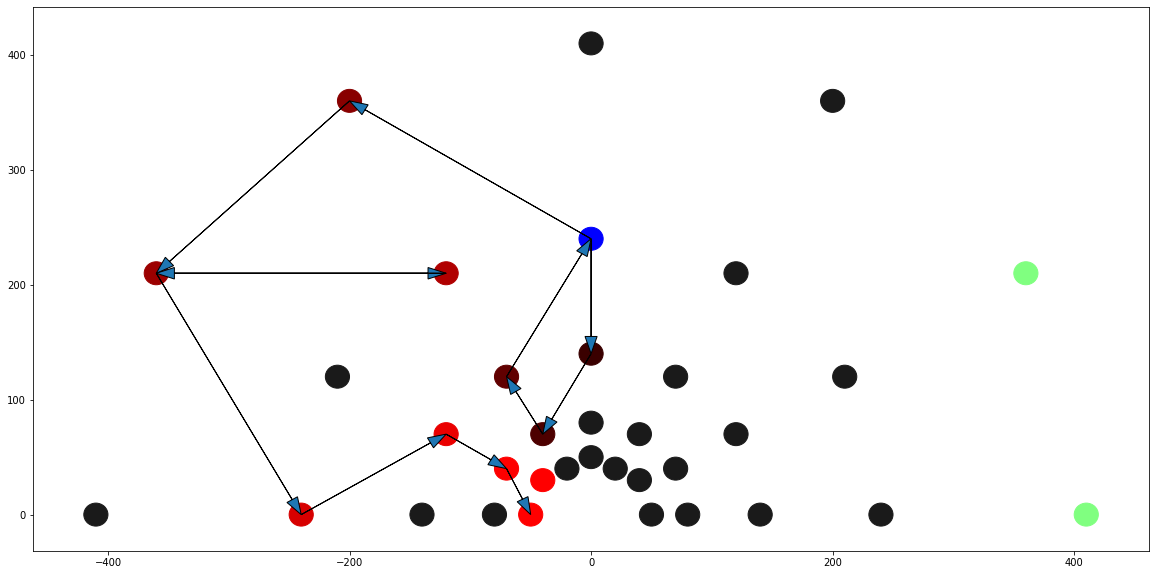

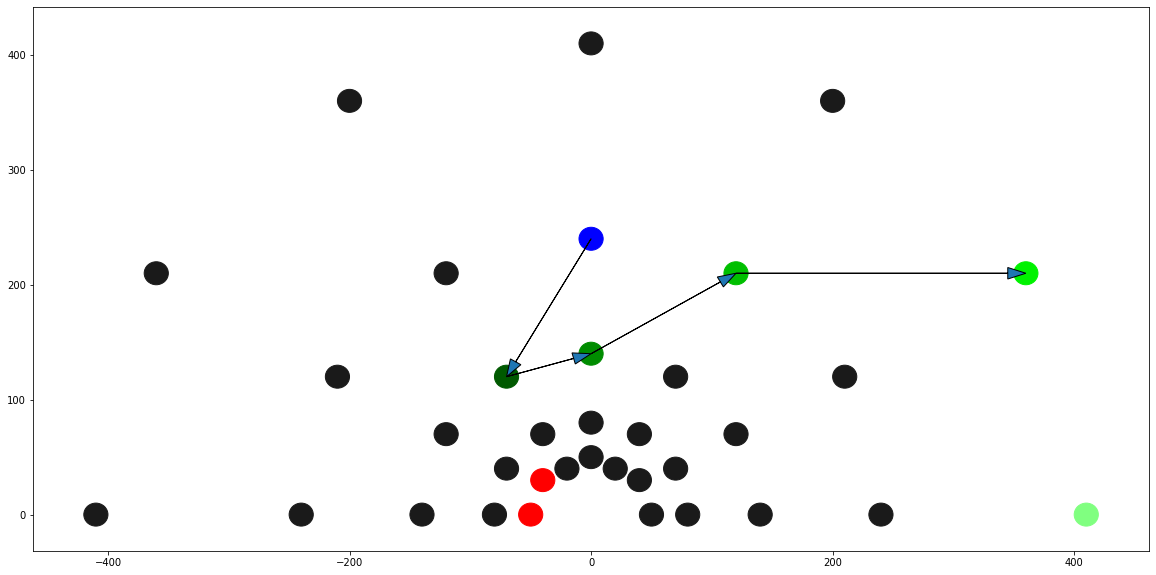

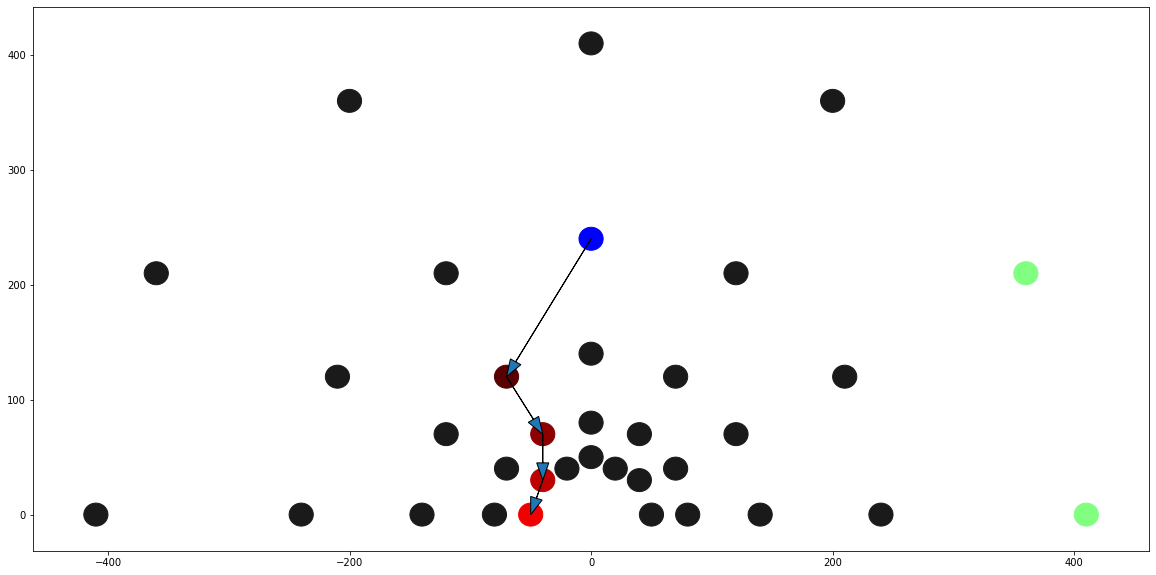

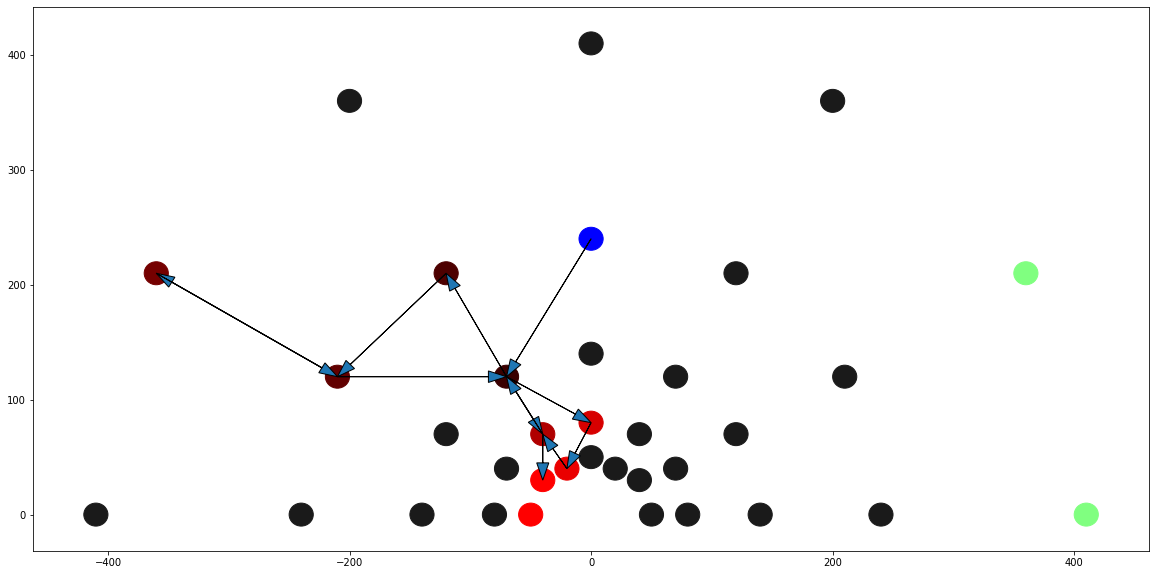

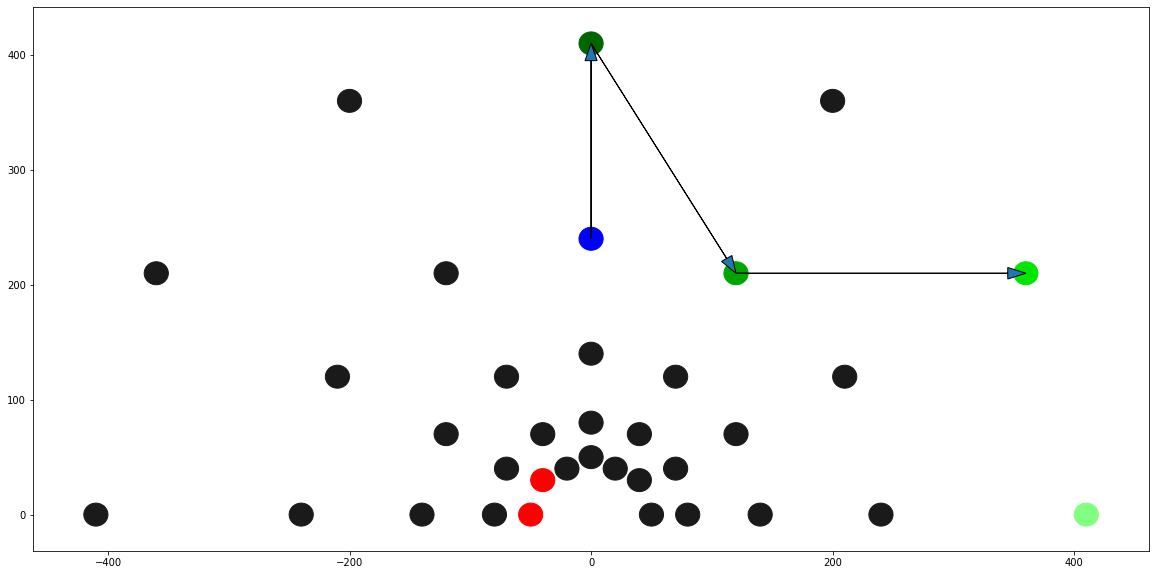

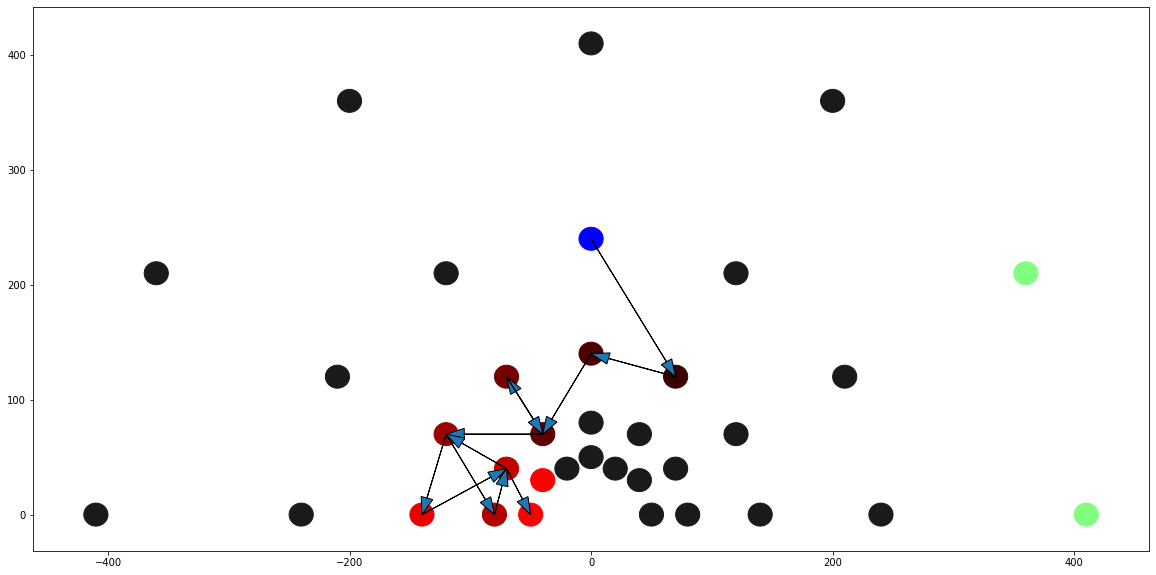

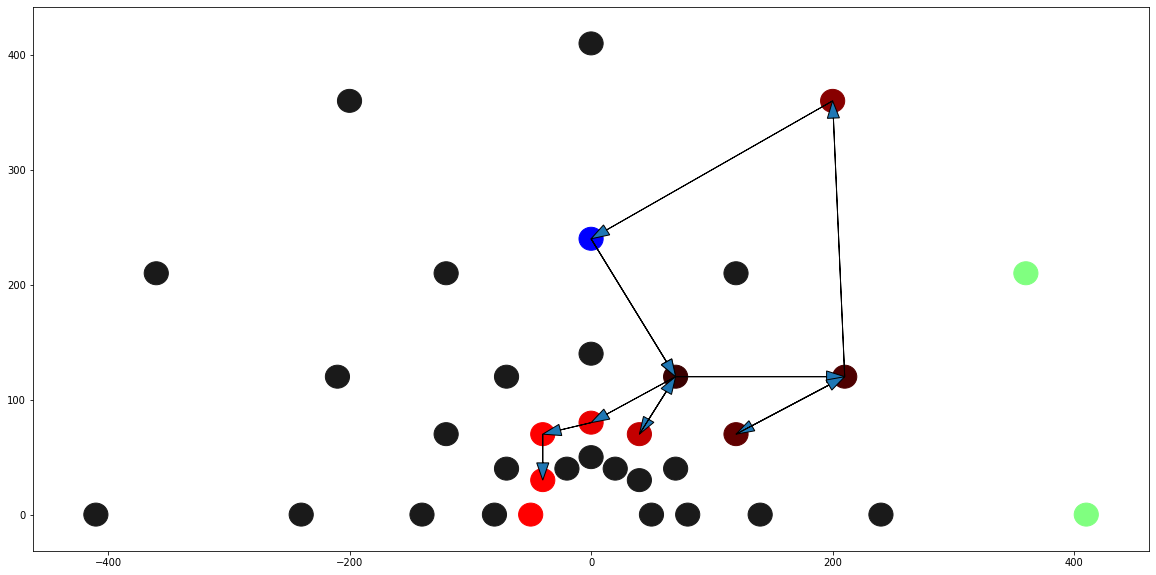

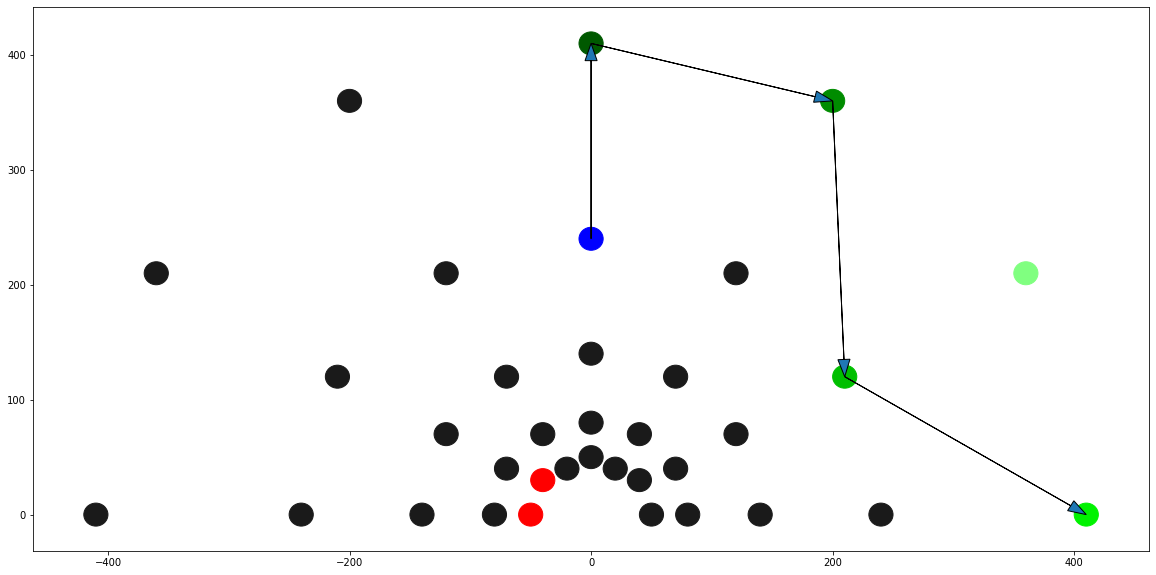

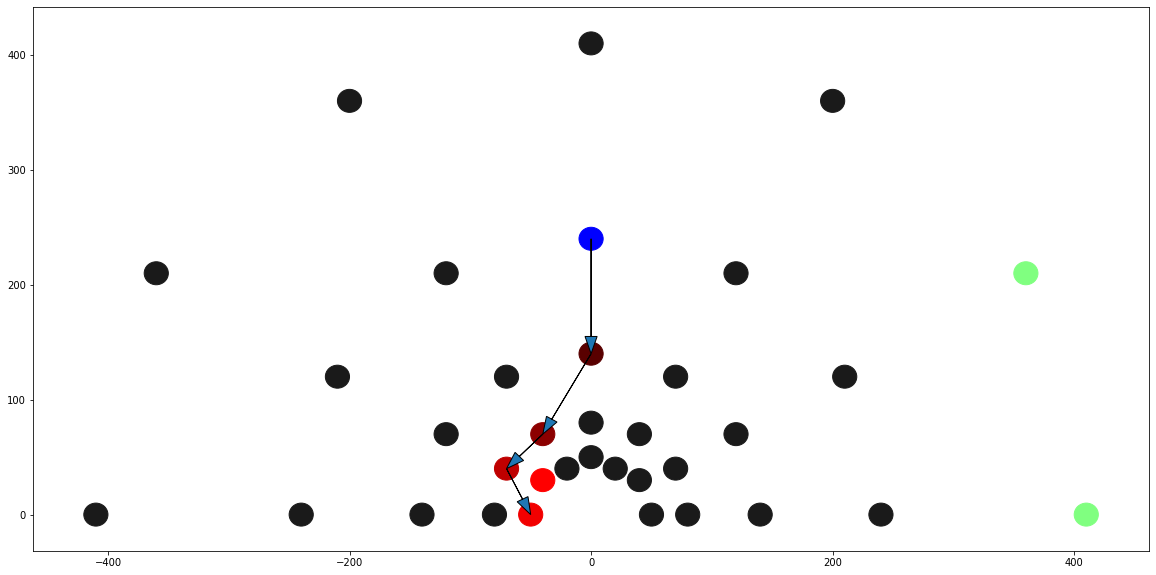

In [49]:
arT3,mvms,pourc,ind = productionTrajectoires(40,verbose=False,dists=[3,11])
for i in arT3:
    plotTrajectoire(i)